# ※ 필요한 패키지 및 데이터 불러오기

###### < 빠른 이동 >  
###### [Preprocessing 1 로 이동](#preprocessing-1)  
###### [EDA & Preprocessing 2 로 이동](#eda--preprocessing-2)  
###### [Preprocessing 3 으로 이동](#preprocessing-3)  
###### [EDA 2 로 이동](#eda-2)  

In [1]:
# 모듈 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [74]:
df = pd.read_csv('./output/daegu.csv', encoding = 'cp949')

### 아래의 전처리부분을 전부 실행하면 daegu_final.csv 파일이 생성됨
### 파일이 있으면 여기를 데이터 프레임을 불러온 뒤 EDA2로 넘어가는 것이 빠름

In [3]:
df_final = pd.read_csv('./output/daegu_final.csv')

# <hr>

# Preprocessing 1
> ###### made by ssj

#### Period
- 2022-05-06

<h4><details><summary>Index</summary><h6>

0. [전처리 전](#0-전처리-전)

1. [Column : hour](#1-column--hour)

2. [Column : lightning](#2-column--lightning)

3. [Column : condtion](#3-column--condition)

4. [Column : month](#4-column--month)

5. [전처리 후](#5-전처리-후)
</h6></details></h4>

####

###### [다음 파트로](#eda--preprocessing-2)

## 0. 전처리 전

In [115]:
df

day    hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0.0       0.0  16.500000       -1.0      53.0        53.0   
1           1   100.0       0.0  18.100000       -1.0      49.0        53.0   
2           1   200.0       0.0  19.700001       -1.0      46.0        53.0   
3           1   300.0       0.0  20.799999       -1.0      41.0        53.0   
4           1   400.0       0.0  22.200001       -1.0      36.0        53.0   
...       ...     ...       ...        ...        ...       ...         ...   
14831611   30  1900.0       0.0  10.700000        NaN      71.0         2.1   
14831612   30  2000.0       0.0  11.000000        NaN      65.0         2.2   
14831613   30  2100.0       0.0  11.900000        NaN      61.0         2.2   
14831614   30  2200.0       0.0  13.400000        NaN      53.0         2.0   
14831615   30  2300.0       0.0  15.100000        NaN      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [116]:
# 시간 단위가 100 단위로 되어 있음
# 100으로 나눠 정수 형태의 정시로 표현
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [117]:
df1

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000       -1.0      53.0        53.0   
1           1     1       0.0  18.100000       -1.0      49.0        53.0   
2           1     2       0.0  19.700001       -1.0      46.0        53.0   
3           1     3       0.0  20.799999       -1.0      41.0        53.0   
4           1     4       0.0  22.200001       -1.0      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000        NaN      71.0         2.1   
14831612   30    20       0.0  11.000000        NaN      65.0         2.2   
14831613   30    21       0.0  11.900000        NaN      61.0         2.2   
14831614   30    22       0.0  13.400000        NaN      53.0         2.0   
14831615   30    23       0.0  15.100000        NaN      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [118]:
# lightning NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [119]:
df2

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [120]:
# NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환

df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [121]:
df3

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1    6.0  2010    동인동  
1                  390.0          1    6.0  2010    동인동  
2                  390.0          1    6.0  2010    동인동  
3                  390.0          1    6.0  2010    동인동  
4                  390.0          2    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1    4.0  2022    구지면  
14831612           339.0         -1    4.0  2022    구지면  
14831613           338.0         -1    4.0  2022    구지면  
14831614           351.0         -1    4.0  2022    구지면  
14831615             5.0         -1    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 4. Column : month
- 월을 정수형으로 표현

In [122]:
# Month 데이터 타입 정수형으로 변환

df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [123]:
df4

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1      6  2010    동인동  
1                  390.0          1      6  2010    동인동  
2                  390.0          1      6  2010    동인동  
3                  390.0          1      6  2010    동인동  
4                  390.0          2      6  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1      4  2022    구지면  
14831612           339.0         -1      4  2022    구지면  
14831613           338.0         -1      4  2022    구지면  
14831614           351.0         -1      4  2022    구지면  
14831615             5.0         -1      4  2022    구지면  

[14831616 rows x 12 columns]

## 5. 전처리 후

In [124]:
df_pre = df4
df_pre

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1      6  2010    동인동  
1                  390.0          1      6  2010    동인동  
2                  390.0          1      6  2010    동인동  
3                  390.0          1      6  2010    동인동  
4                  390.0          2      6  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1      4  2022    구지면  
14831612           339.0         -1      4  2022    구지면  
14831613           338.0         -1      4  2022    구지면  
14831614           351.0         -1      4  2022    구지면  
14831615             5.0         -1      4  2022    구지면  

[14831616 rows x 12 columns]

In [52]:
# 메모리 정리를 위해 선언했던 기존 데이터들 제거

del(df)
del(df1)
del(df2)
del(df3)
del(df4)

# <hr>

# EDA & Preprocessing 2
> ###### made by ssj

#### Period
- 2022.05.06 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

1. [year](#1-year)

2. [month](#2-month)

3. [day](#3-day)

4. [hour](#4-hour)

5. [date](#5-date)

6. [rainfall](#6-rainfall)
    - 6-1. [rainfall processing](#6-1-rainfall-preprocessing)
<br><br>
7. [tempreture](#7-tempreture)

8. [lightning](#8-lightning)

9. [humidity](#9-humidity)
    - 9-1. [humidity processing](#9-1-humidity-preprocessing)
<br><br>
10. [wind](#10-wind)
    - 10-1. [wind speed](#10-1-windspeed)
    - 10-2. [wind direction](#10-2-winddirection)
    - 10-3. [wind preprocessing](#10-3-windpreprocessing-공사중)
<br><br>
11. [condition](#11-condition)
</h6></details></h4>
<br>

###### [이전 파트로](#preprocessing-1)
###### [다음 파트로](#preprocessing-3)

#### 1. year
요약
- 값이 없는 None이 없음
- 2010년부터 2022년까지 존재
- 2010년과 2022년은 모든 월이 있는게 아니므로 일수가 적음
- 윤년에 해당하는 날은 하루치인 296개의 데이터가 더 존재

In [21]:
# year에서 결측치(NA) 카운트 합
# 결측치 수 확인

df_pre['year'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


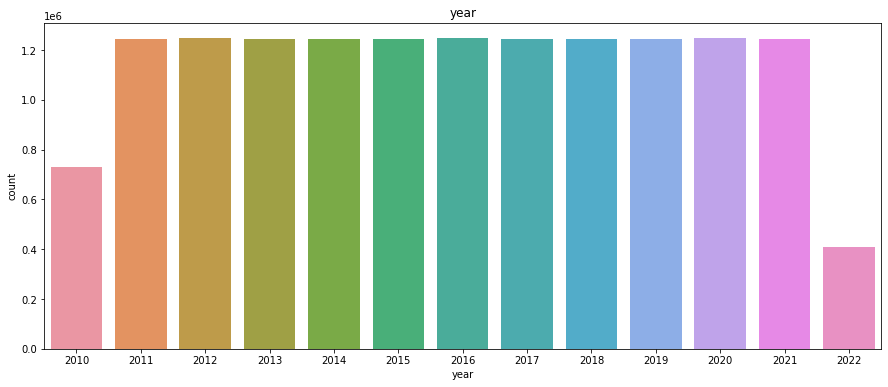

In [22]:
# 연 단위 카운트 그래프 생성
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['year'])
plt.title('year')
plt.show()

In [23]:
# 각 연도별 데이터의 수
temp = []
for i in range(2010,2023):
    result = df_final[df_final['year'] == i].size
    print("{0:>4}년 :".format(i), "{0:>8}".format(result))
    temp.append(result)

2010년 : 10939680
2011년 : 18658800
2012년 : 18709920
2013년 : 18658800
2014년 : 18658800
2015년 : 18658800
2016년 : 18709920
2017년 : 18658800
2018년 : 18658800
2019년 : 18658800
2020년 : 18709920
2021년 : 18658800
2022년 :  6134400


#### 2. month
요약
- 2010년에는 6월부터 데이터가 존재
- 2022년에는 5월부터 데이터가 없음

In [15]:
# N/A 값 있는지 여부 확인
df_pre['month'].isna().sum()

0

In [16]:
# 최대값과 함께 넣으면 해당하는 원형에서 해당하는 위치의 x좌표 y좌표를 반환
def encode_sin_cos(df_,col_n,max_val):
    df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
    df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
    
    return df_

df_month = df_pre[['day','hour','month','year']]

# 1년은 12개월이므로 월 데이터의 x,y 좌표 생성
data_month = encode_sin_cos(df_month,'month',12)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)


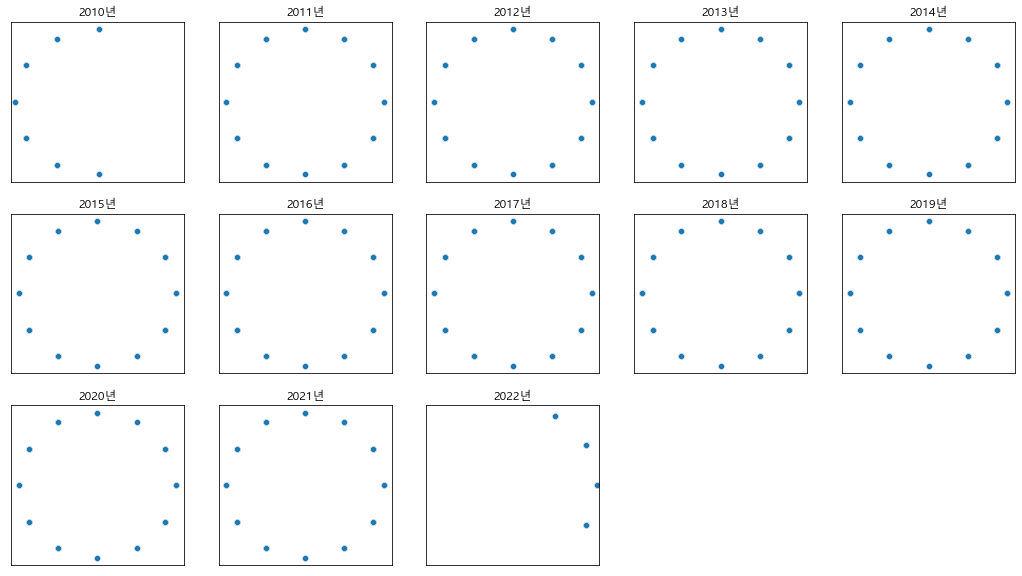

In [17]:
# 2010년부터 2022년까지의 데이터 존재
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# 각각의 연도에 따라 각각의 월이 존재하는지 확인
fig = plt.figure(figsize=(18,10))
plt.rc('font', family = 'Malgun Gothic')
for n,y in enumerate(year):
    ax = plt.subplot(3,5,n+1)
    sns.scatterplot(x="month_sin",y="month_cos",data=data_month[data_month['year'] == y])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(str(y)+"년")

# 2010년은 6월부터 2022년은 4월까지의 데이터만 존재

#### 3. day
요약
- 1일부터 28일까지 동일한 값이 나옴
- 29, 30, 31로 갈수록 count가 점점 줄어듦

In [19]:
# N/A 존재 여부 파악
df_pre['day'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


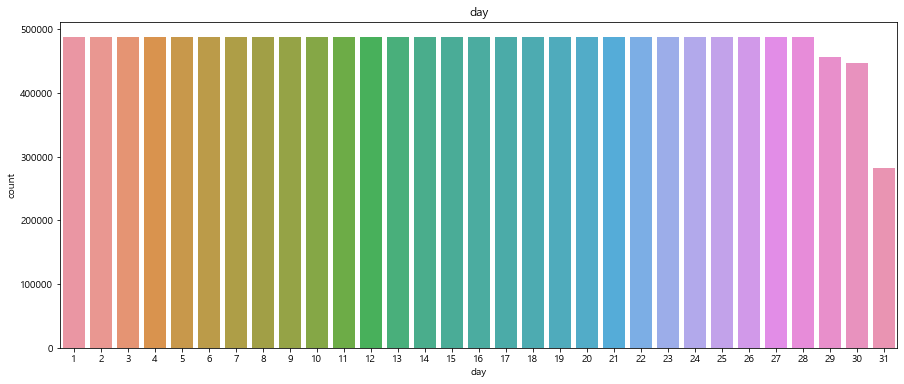

In [26]:
# 일별로 데이터 개수 파악
# 1일~28일까지는 동일한 수의 데이터 존재
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['day'])
plt.title('day')
plt.show()

In [27]:
# 일별 실제 데이터 수
for i in range(1,32):
    result = df_final[df_final['day'] == i].size
    print("{0:>2}일".format(i), result, end='\t\t')
    if i % 4 == 0:
        print('')

 1일 7310160		 2일 7310160		 3일 7310160		 4일 7310160		
 5일 7310160		 6일 7310160		 7일 7310160		 8일 7310160		
 9일 7310160		10일 7310160		11일 7310160		12일 7310160		
13일 7310160		14일 7310160		15일 7310160		16일 7310160		
17일 7310160		18일 7310160		19일 7310160		20일 7310160		
21일 7310160		22일 7310160		23일 7310160		24일 7310160		
25일 7310160		26일 7310160		27일 7310160		28일 7310160		
29일 6850080		30일 6696720		31일 4242960		

#### 4. hour
요약
- None 값이 포함되어 있지 않음
- 모든 시간에 대해 동일한 수의 데이터 존재

In [28]:
# none값의 데이터가 있는지 확인
df_pre['hour'].isna().sum()

0

In [29]:
# 0시부터 23시까지의 데이터가 존재
list_temp = list(df_pre['hour'].unique())
for i in list_temp:
    print(i, end='\t')

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	

In [30]:
# 각각의 시각은 동일한 수가 존재
(df_pre['hour'] == 0).sum() == (df_pre['hour'] == 1).sum() == (df_pre['hour'] == 2).sum()\
    == (df_pre['hour'] == 3).sum() == (df_pre['hour'] == 4).sum() == (df_pre['hour'] == 5).sum()\
    == (df_pre['hour'] == 6).sum() == (df_pre['hour'] == 7).sum() == (df_pre['hour'] == 8).sum()\
    == (df_pre['hour'] == 9).sum() == (df_pre['hour'] == 10).sum() == (df_pre['hour'] == 11).sum()\
    == (df_pre['hour'] == 12).sum() == (df_pre['hour'] == 13).sum() == (df_pre['hour'] == 14).sum()\
    == (df_pre['hour'] == 15).sum() == (df_pre['hour'] == 16).sum() == (df_pre['hour'] == 17).sum()\
    == (df_pre['hour'] == 18).sum() == (df_pre['hour'] == 19).sum() == (df_pre['hour'] == 20).sum()\
    == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 23).sum()

True

#### 5. Date
- 년,월,일,시간을 합쳐서서 데이터 타입이 datetime인 새로운 컬럼 생성

In [31]:
df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

#### 6. rainfall
요약
- 강우량 데이터 (단위:mm)
- 강수량을 측정하지 않은 경우 : -1
- 최대 강수량 : 62.099998mm/h

In [32]:
print('결측치 수 : ',df_pre['rainfall'].isna().sum())
a = list(df_pre[df_pre['rainfall'] == -1].index)
print('미측정 수 : ',len(a))
a = list(df_pre[df_pre['rainfall'] == 0].index)
print('비가 오지 않은 날 : ',len(a))

결측치 수 :  0
미측정 수 :  23306
비가 오지 않은 날 :  13990071


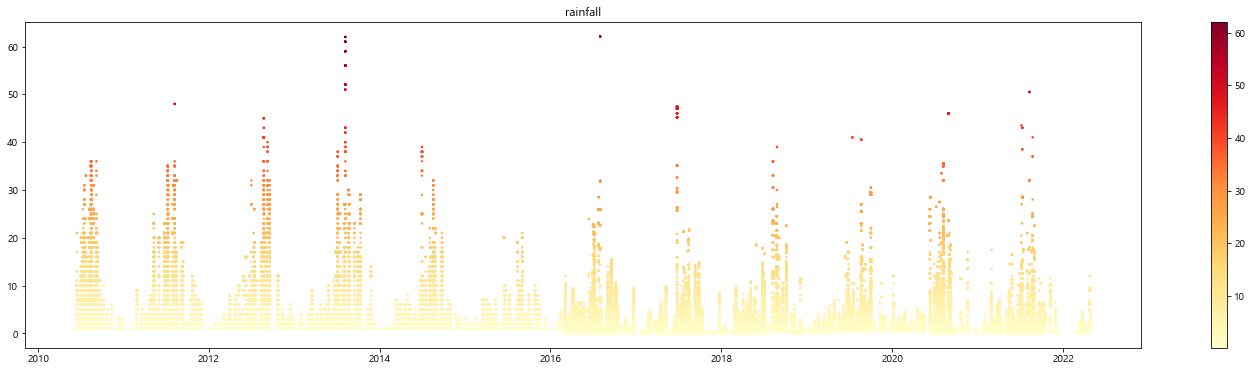

강우량의 0을 제외한 최소값 : 0.1 mm
강우량의 최댓값 : 62.099998 mm


In [45]:
# 강수량에 대한 데이터를 그래프에 점을 찍어 표현
# X축:날짜,시간  Y축:강수량
fig = plt.figure(figsize=(25,6))
temp = df_pre[(df_pre['rainfall'] != 0) & (df_pre['rainfall'] != -1)]
plt.scatter(temp['datetime'], temp['rainfall'], s=2, c=temp['rainfall'], cmap='YlOrRd')
plt.colorbar()
plt.title('rainfall')
plt.show()
print('강우량의 0을 제외한 최소값 :',temp['rainfall'].min(),'mm')
print('강우량의 최댓값 :',temp['rainfall'].max(),'mm')

#### 6-1. rainfall preprocessing
요약
- 앞, 뒤에서 측정한 경우
    - 앞, 뒤의 평균으로 강수량을 계산
- 연속적으로 측정하지 않은 경우
    - 바로 직전과 직후의 강우량이 0이라면 비가 오지 않았을 확률이 매우 높음 -> 0으로 변경
    - 바로 직전과 직후에 비가 왔다면 어떤식으로 데이터를 변경할지 고민해봐야함
        - 해당 경우는 없는 것으로 확인됨

In [27]:
# 강수량을 측정하지 않은 시간대의 index
a = list(df_pre[df_pre['rainfall'] == -1].index)

list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

2701


In [28]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [29]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'rainfall'] = (df_pre.loc[i-1,'rainfall'] + df_pre.loc[i+1,'rainfall']) / 2

In [30]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    # 직전, 직후가 0인 경우
    if (df_pre.loc[i[0]-1,'rainfall'] == 0) & (df_pre.loc[i[-1]+1,'rainfall'] == 0):
        for j in i:
            df_pre.loc[j,'rainfall'] = 0
    # 직전 또는 직후가 0이 아닌 경우
    else:
        print(i)

# 직전 또는 직후에 비가 온 case는 존재하지 않음

In [31]:
# rainfall이 -1인 경우가 남아있는지 확인
(df_pre['rainfall'] == -1).sum()

0

#### 7. tempreture
요약
- -50, -1 은 결측치로 생각됨
- 0은 어떤 값인지 확인이 필요 (가장 많은 count를 보유 -> 의미가 있을 것)
- 최고기온 : 40.4℃
- 최저기온 : -16℃

In [32]:
# csv파일을 불러오면서 ±0.00001 정도의 오차가 발생한 경우가 있어 반올림
df_pre['temp'] = df_pre['temp'].round(1)

c:\git_project\Team_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


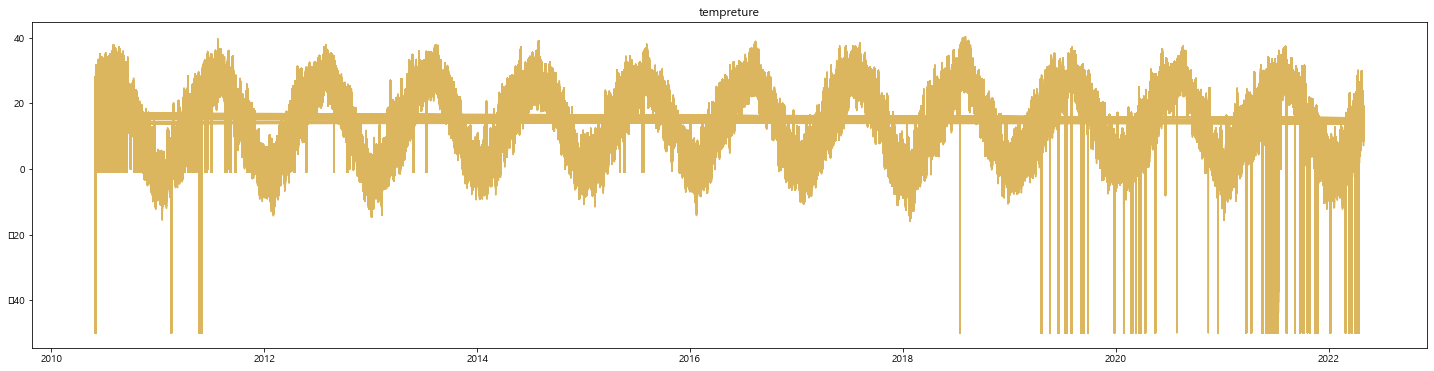

In [33]:
# 시간에 따른 기온을 그래프로 표현
# -50과 -1~0의 비정상적인 값들이 많이 보임
# 그래프 가운데 발생하는 선은 무시해도 됨
#      -> 각각의 읍/면/동에 대해 기온 그래프를 생성한 뒤 다음 읍/면/동으로 넘어가면서 발생하는 선 
fig = plt.figure(figsize=(25,6))
plt.plot(df_pre.datetime, df_pre.temp, color='#DBB65E')
plt.title('tempreture')
plt.show()

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


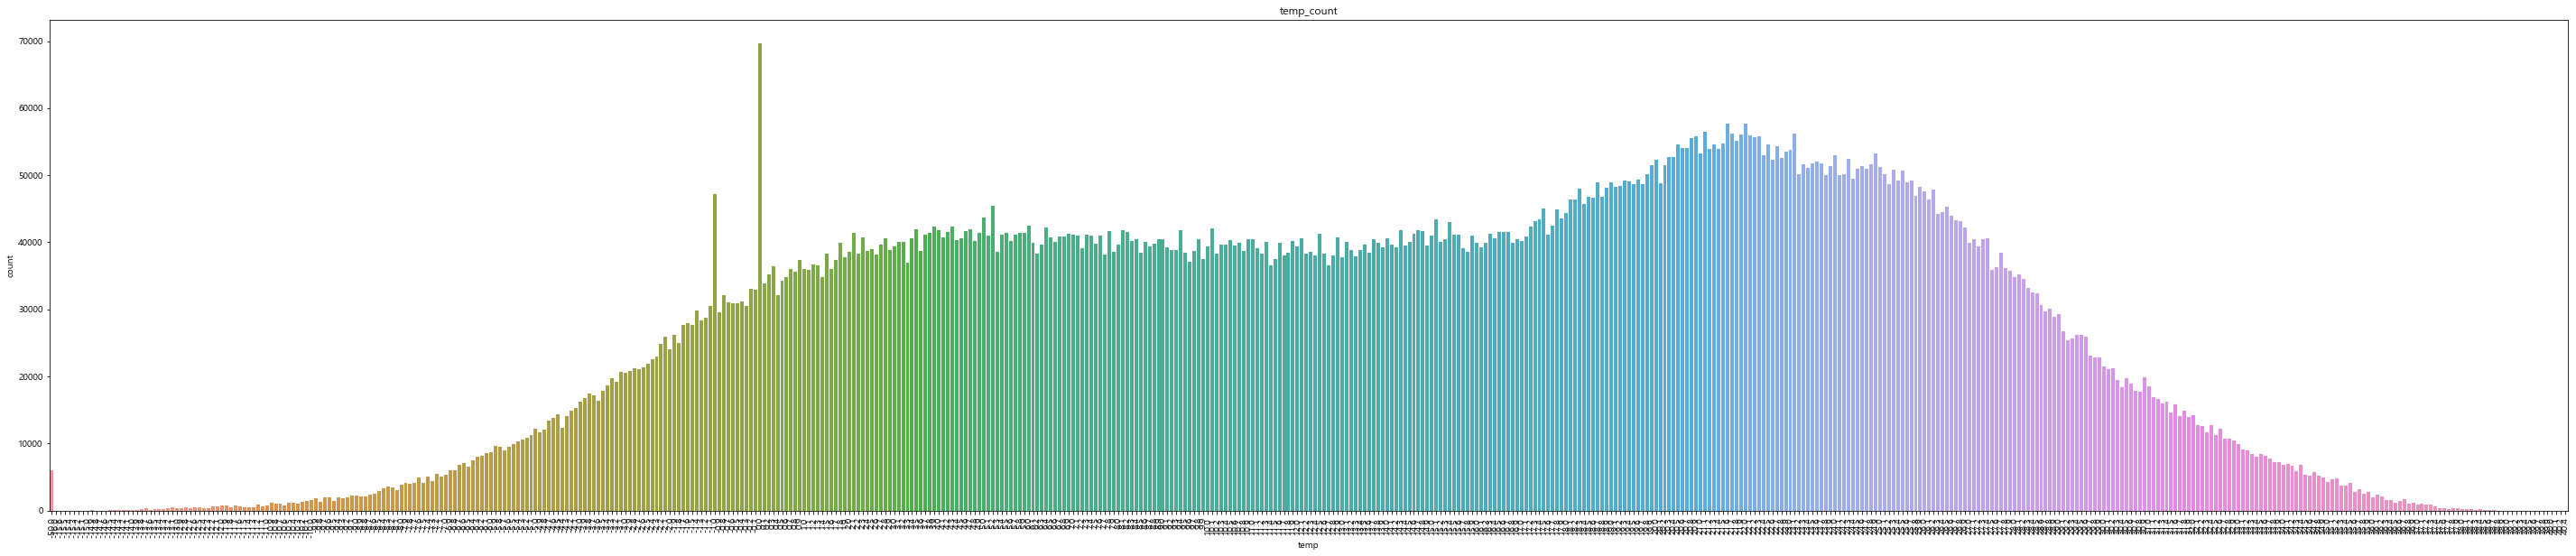

In [34]:
# 각각의 기온별로 데이터의 수를 그래프로 표현
# -50, -1, 0 의 값들이 튀는 것을 확인할 수 있음

fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [35]:
# 각각의 이상값에 대해 데이터 수를 확인
print('-50 : ',df_pre[df_pre['temp'] == -50].shape[0])
print('-1  : ',df_pre[df_pre['temp'] == -1].shape[0])
print('0  : ',df_pre[df_pre['temp'] == 0].shape[0])

-50 :  6062
-1  :  47171
0  :  69673


In [36]:
print('최저 기온 : ',df_pre[(df_pre['temp'] != -50) & (df_pre['temp'] != -1)]['temp'].min())
print('최고 기온 : ',df_pre['temp'].max())

최저 기온 :  -16.0
최고 기온 :  40.4


#### 7-1. tempreture preprocessing
요약
- 결측치 혹은 잘못된 값은 -50, -8.1, -1, 0 으로 4가지 경우가 존재
- 해결방법
    - 4가지 경우가 연속으로 존재하는 경우를 확인
        - 한가지 경우가 있었으며 -1만 고치는 방향으로 결정
    - 각각의 경우가 연속해서 존재할 경우 전, 후 값을 선형으로 연결
    - 연속해서 -1 혹은 0이 존재할 경우
        - 전후 값과의 차이가 3도 이하일 경우 정상적인 값으로 판단

In [42]:
# 결측치에 해당하는 부분의 인덱스 추출
list_50 = list(df_pre[df_pre['temp'] == -50].index)
list_1 = list(df_pre[df_pre['temp'] == -1].index)
list_0 = list(df_pre[df_pre['temp'] == 0].index)

list_temp = list_50+list_1+list_0

# 결측치가 연속으로 나오는 부분 추출
list_series = []
for i in list_temp:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) == 0) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) == 0) :
        list_series.append(i)

# -1도를 기준으로 전후와 3도 이상 차이나면 잘못된 값으로 판단
list_real1 = []
for i in list_1:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

# 0도를 기준으로 전후와 3도 이상 차이나면 잘못된 값으로 판다
list_real0 = []
for i in list_0:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

In [43]:
# 위에서 추출한 인덱스를 하나의 리스트로 합친 뒤 정렬
a = list_50 + list_real0 + list_real1 +list_series
list(set(a)).sort()

In [44]:
# 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

In [45]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [46]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
            df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

In [47]:
# 연속적으로 측정하지 않은 경우 전후를 선형으로 연결
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'temp']
    end = df_pre.loc[i[-1]+1,'temp']
    c = (end - start)/(n+1)
    start = start + c
    for j in i:
        df_pre.loc[j,'temp'] = round(start,0)
        start = start + c

In [48]:
# -50도의 결측값이 없어진 것을 확인
df_pre[df_pre['temp']==-50]

Empty DataFrame
Columns: [day, hour, rainfall, temp, lightning, humidity, wind_speed, wind_direction, condition, month, year, region]
Index: []

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


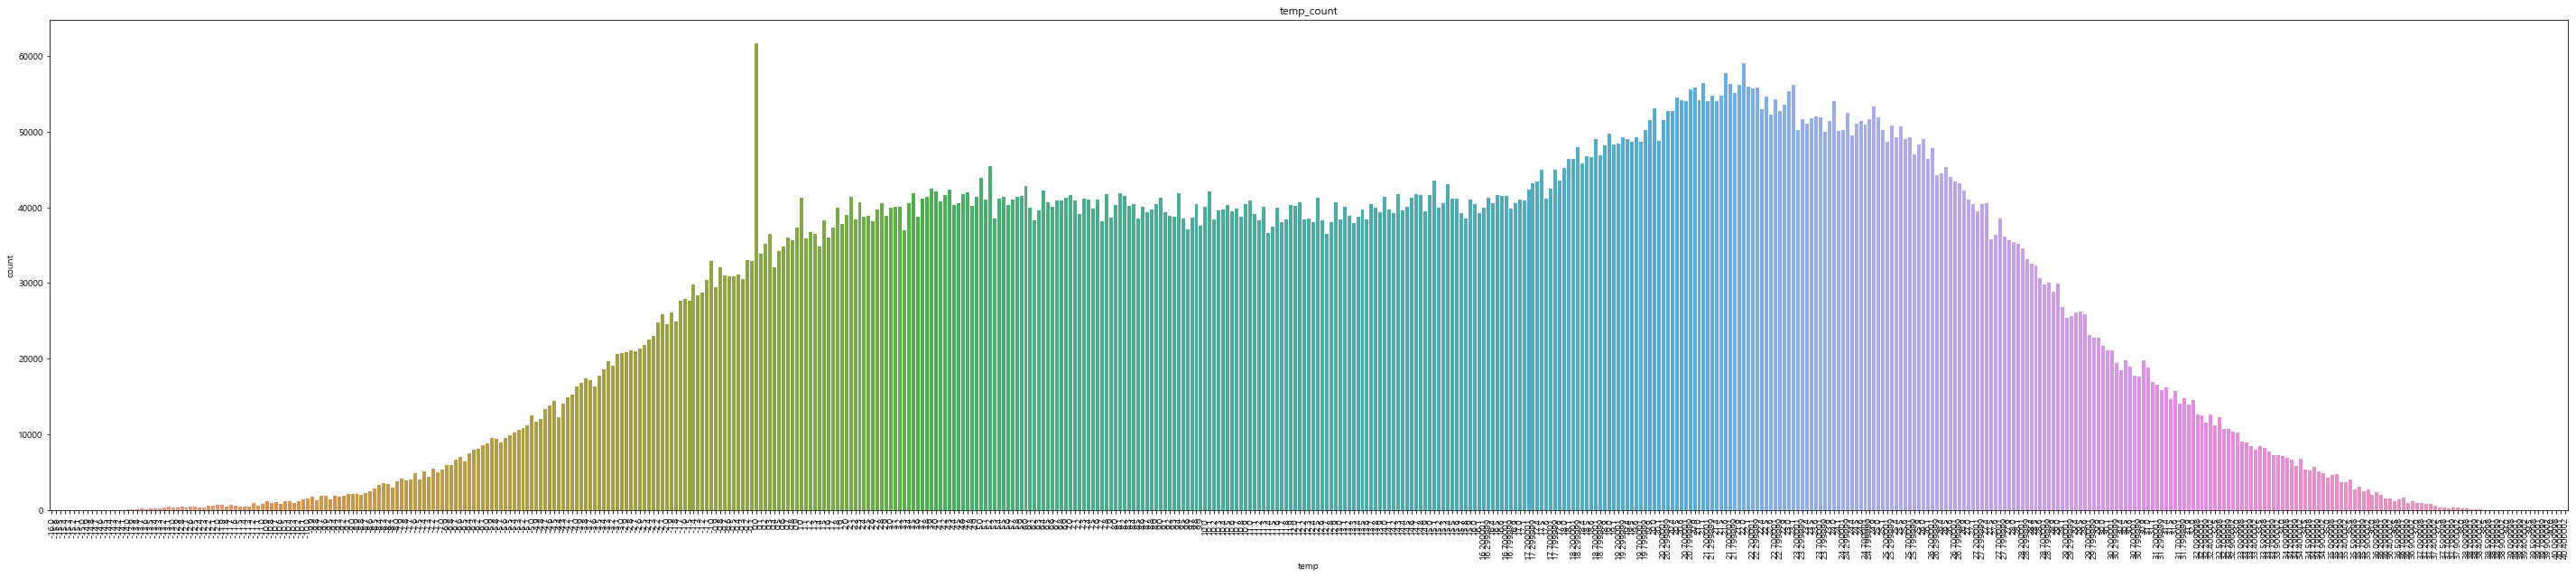

In [61]:
# 결측치 값이 많이 죽어든 것을 그래프로 확인
# 여전히 0인 경우가 많음
fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [50]:
df_pre[df_pre['temp'] == 0]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
4287       26    15       0.0   0.0         -1      32.0        53.0   
4336       28    16       0.0   0.0         -1      37.0        53.0   
4579        8    19       0.0   0.0         -1      55.0         3.7   
4609       10     1       0.0   0.0         -1      50.0         0.4   
4645       11    13       0.0   0.0         -1      22.0         3.1   
...       ...   ...       ...   ...        ...       ...         ...   
14830198    2    22       0.0   0.0         -1      71.0         0.9   
14830216    3    16       0.0   0.0         -1      71.0         0.4   
14830291    6    19       0.0   0.0         -1      52.0         2.0   
14830338    8    18       0.0   0.0         -1      75.0         0.0   
14830700   23    20       0.0   0.0         -1      98.0         0.3   

          wind_direction  condition  month  year region  
4287               390.0          1     11  2010    동인동  
4336               390.0          1     11  2010    동인동  
4579               273.0          1     12  2010    동인동  
4609                 0.0          3     12  2010    동인동  
4645               279.0          1     12  2010    동인동  
...                  ...        ...    ...   ...    ...  
14830198           358.0         -1      3  2022    구지면  
14830216           148.0         -1      3  2022    구지면  
14830291             7.0         -1      3  2022    구지면  
14830338             0.0         -1      3  2022    구지면  
14830700           196.0         -1      3  2022    구지면  

[65963 rows x 12 columns]

In [55]:
# 하나의 예시를 추출했는데 온도가 약 0.6~0.7로 나와야 정상적인 상황
i = 4287
df_pre.loc[i-2:i+2,"temp"]

4285    2.6
4286    1.6
4287    0.0
4288   -0.3
4289   -1.0
Name: temp, dtype: float64

In [56]:
# 0을 기준으로 전후값의 부호가 반대면 평균값을 대입
list_0 = list(df_pre[df_pre['temp'] == 0].index)
for i in list_0:
    if df_pre.loc[i-1,'temp'] * df_pre.loc[i+1,'temp'] < 0:
        df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


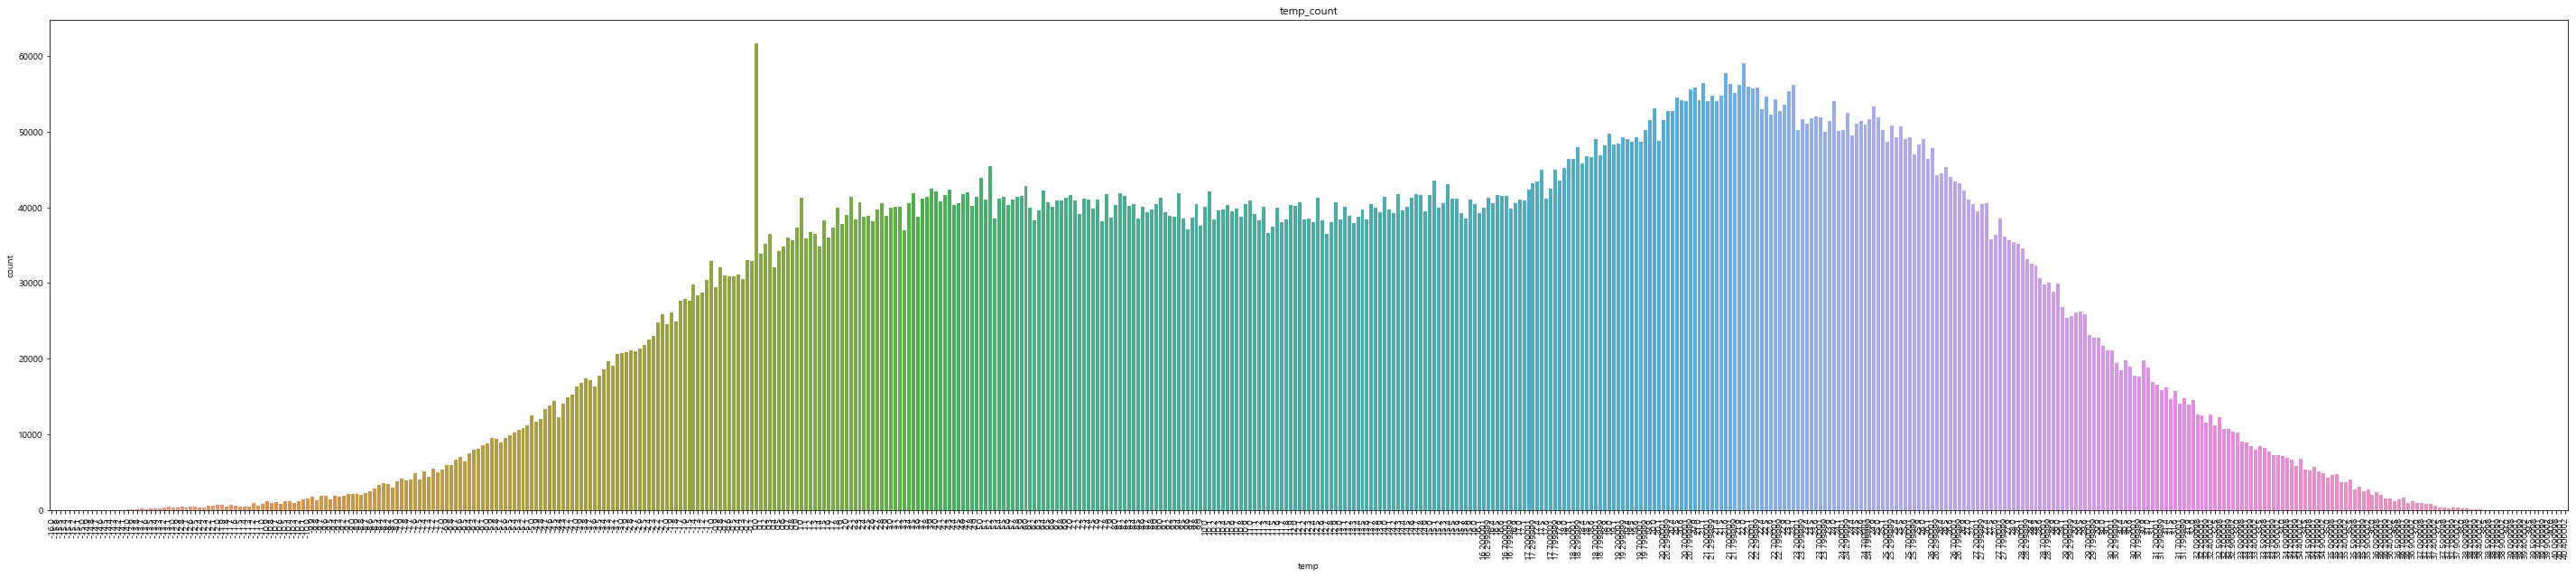

In [62]:
# 다시 그래프를 그려서 확인
# 조금 줄긴 했음...
fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [64]:
print('0℃인 데이터 수 :',df_pre[df_pre['temp'] == 0].shape[0])

0℃인 데이터 수 : 61679


In [59]:
# -8.1℃ 에서도 잘못된 값이 있다는 제보를 받음
# 값이 크게 차이나는 부분을 평균값으로 대체

list_temp = list(df_pre[df_pre['temp'] == -8.1].index)

list_8 = []
for i in list_temp:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 5) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 5):
        list_8.append(i)

for i in list_8:
    df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 1)

In [60]:
# -8.1℃에서 다른 값으로 바뀐것을 확인
df_pre.loc[list_8,:]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14293060   20     4       0.0  26.4         -1      59.0         0.7   
14501956   20     4       0.0  26.4         -1      59.0         0.7   
14815300   20     4       0.0  26.4         -1      59.0         0.7   

          wind_direction  condition  month  year region  
14293060            16.0         -1      6  2020    유가읍  
14501956            16.0         -1      6  2020    현풍읍  
14815300            16.0         -1      6  2020    구지면

#### 8. lightning
요약
- 2018년 10월까지만 제공
- 전체 데이터 중 약 37.86%는 데이터가 없는 상태
- 추가적인 데이터를 찾지 않는 이상 사용하기 애매함?

In [53]:
# 존재하는 항목 확인
df_pre['lightning'].unique()

array([-1,  0,  1])

In [54]:
print('결측된 데이터 비율 :', round(df_pre[(df_pre['lightning'] == -1)].shape[0]/df_pre.shape[0]*100,2), '%')

결측된 데이터 비율 : 37.86 %


#### 9. humidity
요약
- 0~100까지의 비율(%)로 값들이 존재
- -1은 결측값
- 습도가 0인 경우가 많음
    - 습도가 0일 가능성이 거의 없으므로 이 중 대부분은 결측치일것
    - 습도가 0%인 경우가 682개
    - 습도가 1%인 경우가 42개

In [55]:
# 존재하는 값 확인
df_pre['humidity'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

In [56]:
# 결측치 및 이상값 확인
# 0%의 경우 일어나기가 힘든데 1%보다 많음
print('-1 :',df_pre[df_pre['humidity'] == -1].shape[0])
print('0 :',df_pre[df_pre['humidity'] == 0].shape[0])
print('1 :',df_pre[df_pre['humidity'] == 1].shape[0])
print('2 :',df_pre[df_pre['humidity'] == 2].shape[0])
print('3 :',df_pre[df_pre['humidity'] == 3].shape[0])

-1 : 30222
0 : 682
1 : 42
2 : 66
3 : 238


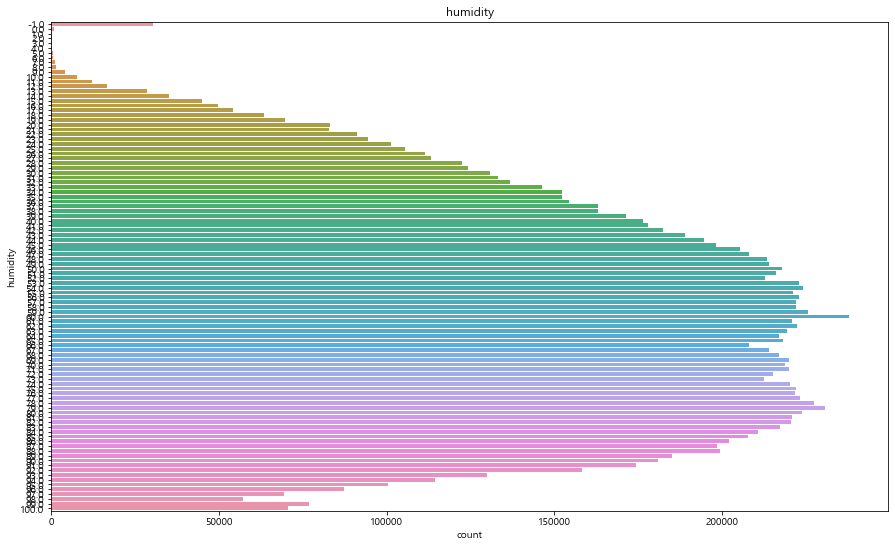

In [57]:
# 습도를 그래프로 표현
fig = plt.figure(figsize=(15,9))
sns.countplot(data=df_pre, y='humidity')
plt.title('humidity')
plt.show()

#### 9-1. humidity preprocessing
요약
- 0일 경우
    - 0일 가능성이 거의 없지만 실제로 있을 수도 있음
    - 0일 경우의 전후 1시간을 비교했을때 차이가 거의 없는 경우가 2가지 존재
    - 그외의 경우는 모두 큰 차이가 나는 결측값으로 확인됨
    - 전후 습도의 평균으로 계산
- -1일 경우
    - 전후로 -1이 아닌 경우들을 선형으로 값을 설정


In [125]:
# 습도가 -1 혹은 0인 경우의 인덱스를 저장
list_1 = list(df_pre[(df_pre['humidity'] == -1)].index)
list_0 = list(df_pre[(df_pre['humidity'] == 0)].index)

In [126]:
# 0이 연속으로 나오는 경우를 확인
j = 0
for i in list_0:
    if i-j==1:
        print(j,i)
    j=i

In [127]:
# -1이 연속으로 나오는 경우를 확인
j = 0
for i in list_1:
    if (i-j)==1:
        print(j,i)
    j=i

54 55
170 171
171 172
172 173
173 174
12488 12489
43581 43582
43582 43583
43583 43584
43584 43585
96423 96424
103936 103937
104502 104503
104618 104619
104619 104620
104620 104621
104621 104622
116936 116937
148029 148030
148030 148031
148031 148032
148032 148033
200871 200872
208384 208385
208950 208951
209066 209067
209067 209068
209068 209069
209069 209070
221384 221385
252477 252478
252478 252479
252479 252480
252480 252481
305319 305320
312832 312833
313398 313399
313514 313515
313515 313516
313516 313517
313517 313518
325832 325833
356925 356926
356926 356927
356927 356928
356928 356929
409767 409768
417280 417281
417846 417847
417962 417963
417963 417964
417964 417965
417965 417966
430280 430281
461373 461374
461374 461375
461375 461376
461376 461377
514215 514216
521728 521729
522294 522295
522410 522411
522411 522412
522412 522413
522413 522414
534728 534729
565821 565822
565822 565823
565823 565824
565824 565825
618663 618664
626176 626177
626742 626743
626858 626859
626859 6

In [128]:
# -1과 0이 연속으로 나오는 경우를 확인
# 아래의 한가지 경우만 존재
for i in list_1:
    if i-1 in list_0:
        print(i-1, i)
    if i+1 in list_0:
        print(i, i+1)

14690309 14690310


In [129]:
# 위의 케이스를 확인
# -1만 수정하면 될것으로 생각됨
df_pre.loc[14690307:14690311,:]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14690307   15     3       0.0   8.3          0       4.0         0.8   
14690308   15     4       0.0   9.3          0       2.0         2.5   
14690309   15     5       0.0   9.2          0      -1.0         3.3   
14690310   15     6       0.0   9.1          0       0.0         2.7   
14690311   15     7       0.0   8.3          0       2.0         2.9   

          wind_direction  condition  month  year region  
14690307           353.0          2      2  2018    하빈면  
14690308           348.0          2      2  2018    하빈면  
14690309           346.0          3      2  2018    하빈면  
14690310           327.0          3      2  2018    하빈면  
14690311           314.0          3      2  2018    하빈면

In [130]:
# 습도가 0인 경우에 전후값과의 차이를 확인
# 전후 값과의 차가 3, 6은 가능성이 있다고 판단
a = []
for i in list_0:
    a.append(abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']))
set(a)

{3.0,
 6.0,
 87.0,
 88.0,
 90.0,
 91.0,
 92.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0,
 101.0,
 104.0,
 106.0,
 108.0,
 110.0,
 113.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 128.0,
 129.0,
 132.0,
 133.0,
 135.0,
 137.0,
 141.0,
 155.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 179.0,
 181.0}

In [131]:
# 위의 3과 6을 제외하고 나머지 인덱스를 리스트 a에 저장
a = []
for i in list_0:
    if abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']) > 10:
        a.append(i)

# 리스트 a의 인덱스에 위치한 0들을 전후값의 평균으로 대체
for i in a:
    df_pre.loc[i,'humidity'] = round(( df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity'] ) /2 , 1)

In [132]:
# 0의 경우 처음에 본 두가지 경우만 남음
df_pre[df_pre['humidity']==0]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14689853   27     5       0.0   1.8          0       0.0         0.9   
14690310   15     6       0.0   9.1          0       0.0         2.7   

          wind_direction  condition  month  year region  
14689853           180.0          1      1  2018    하빈면  
14690310           327.0          3      2  2018    하빈면

In [134]:
# -1이 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in list_1:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

In [135]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [136]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in list_1:
    if i not in list_temp:
        df_pre.loc[i,'humidity'] = round((df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity']) / 2, 0)


In [137]:
# 연속적으로 측정하지 않은 경우 전후를 선형으로 연결
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'humidity']
    end = df_pre.loc[i[-1]+1,'humidity']
    c = (end - start)/(n+1)
    start = start + c
    for j in i:
        df_pre.loc[j,'humidity'] = round(start,0)
        start = start + c

In [138]:
# -1이라는 결측치 데이터가 다른 값으로 대체된 것을 확인
df_pre[df_pre['humidity'] == -1]

Empty DataFrame
Columns: [day, hour, rainfall, temp, lightning, humidity, wind_speed, wind_direction, condition, month, year, region]
Index: []

#### 10. wind
요약
- 풍속과 풍향의 데이터가 2010년 12월 6일 6시 까지의 데이터가 이상함
- None 이 되도록 수정

<details><summary>풍력 등급표 (click시 열림)</summary>

|등급|10분간 평균풍속(10m/s)|상세설명|
|---|---|---|
|0|0.3미만|연기가 똑바로 올라간다.|
|1|0.3~1.6미만|연기가 옆으로 쓰러진다.|
|2|1.6~3.4미만|얼굴에 바람기를 느끼고 나뭇잎이 쓰러진다.|
|3|3.4~5.5미만|나뭇잎이나 가느다란 가지가 끊임없이 흔들린다.|
|4|5.5~8.0미만|먼지가 일고 종이 조각이 날아오르며 작은 나뭇가지가 흔들린다.|
|5|8.0~10.8미만|연못의 수면에 잔물결이 일며 나무가 흔들리는 것이 눈에 보인다.|
|6|10.8~13.9미만|큰 가지가 움직이고,우산을 쓰기 어려우며 전선이 운다.|
|7|13.9~17.2미만|수목 전체가 흔들린다.|
|8|17.2~20.8미만|작은 가지가 부러지며,바람을 향해 걸을 수 없다.|
|9|20.8~24.5미만|인가에 약간의 피해를 준다.|
|10|24.5~28.5미만|수목의 뿌리가 뽑히며 인가에 큰 피해가 발생한다.|
- 출처 : http://hosting.weatherimc.co.kr/con/forecast/wind.html?jijum_code=53
</details>

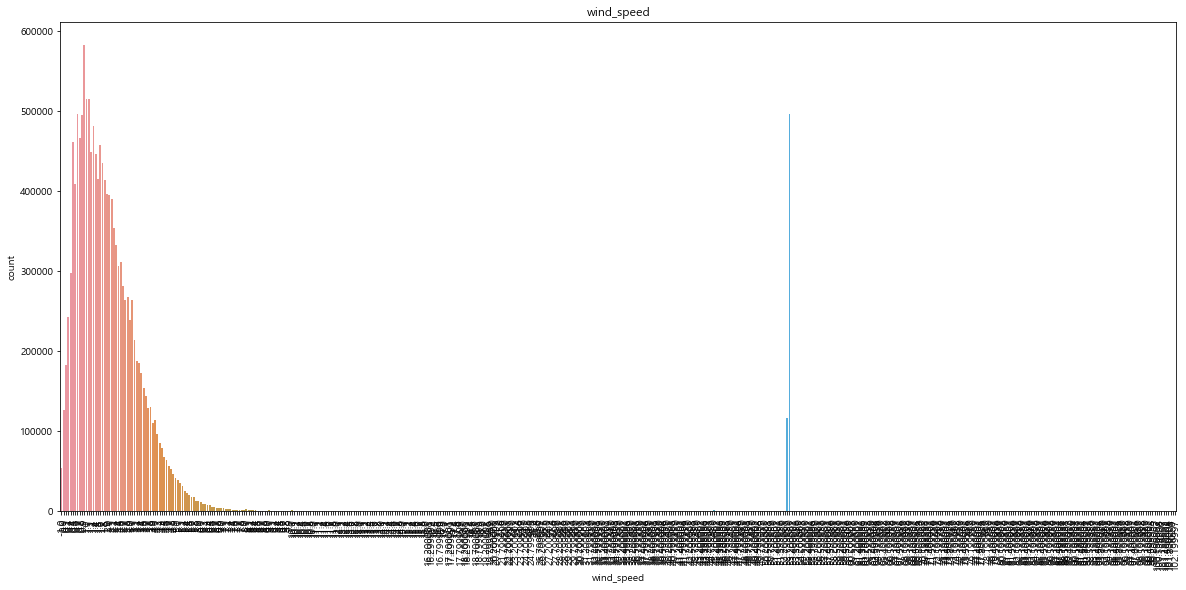

In [71]:
# 풍속 데이터를 그래프로 표현
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

풍속에 말도 안되는 값들이 많이 존재
데이터를 살펴보니 2010년 12월 6일 6시까지의 데이터가 이상함
    -> none값을 가지도록 수정

In [ ]:
# 풍속에 말도 안되는 값들이 많이 존재
# 데이터를 살펴보니 2010년 12월 6일 6시까지의 데이터가 이상함
#     -> none값을 가지도록 수정

df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

list_temp = list(df_pre[df_pre['datetime'] < datetime.datetime(2010,12,6,7)].index)
df_pre.loc[list_temp,['wind_speed','wind_direction']] = None
df_pre

#### 10-1. wind_speed
요약
- 최고 풍속 : 18.9 m/s
- 평균 풍속 : 4m/s
- 결측치는 -1 로 표현

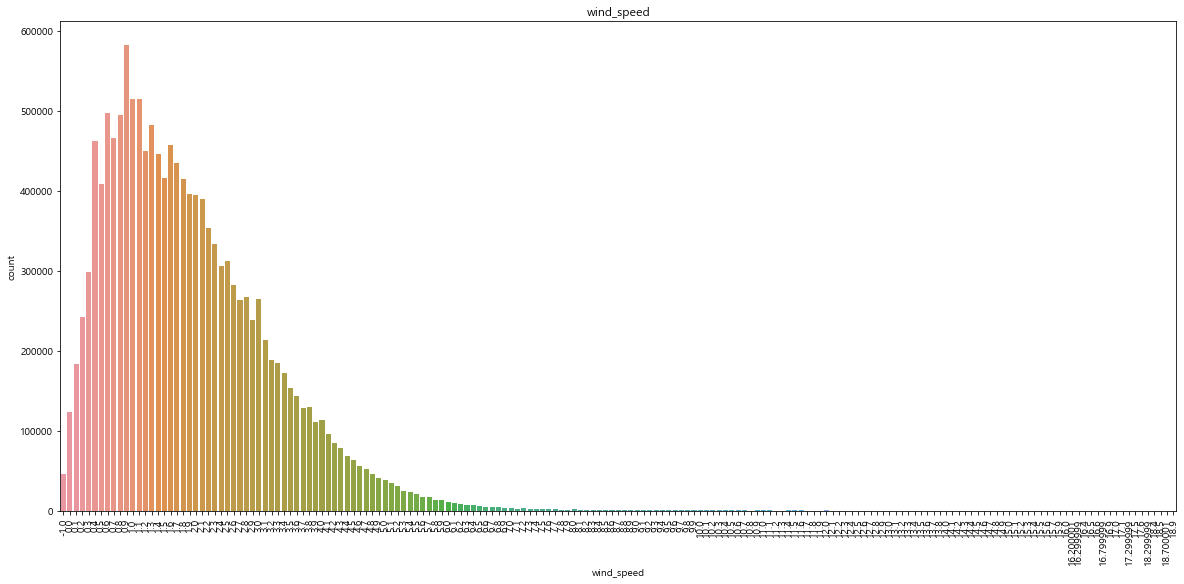

In [74]:
# 이상한 데이터를 지운 풍속 그래프를 표현
# 그래프가 많이 깔끔해짐
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

In [75]:
print('최고 풍속 :',df_pre['wind_speed'].max(), 'm/s')
print('평균 풍속 :',df_pre[df_pre['wind_speed'] != -1]['wind_speed'].mean(), 'm/s')

최고 풍속 : 18.9 m/s
평균 풍속 : 1.8921555349644361 m/s


#### 10-2. wind_direction
요약
- 0 ~ 360의 각도 형식으로 표현
- 360'가 북쪽을 나타냄
- 결측치는 -1 로 표현

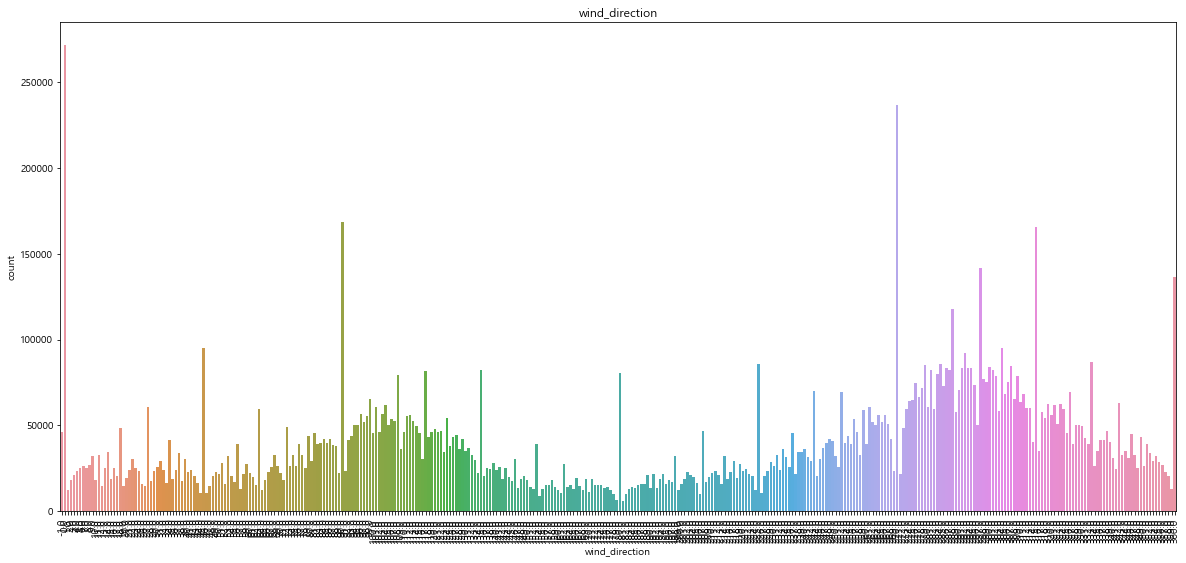

In [76]:
# 풍향을 그래프로 표현
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_direction')
plt.xticks(rotation=90)
plt.title('wind_direction')
plt.show()

In [77]:
# 존재하는 데이터의 값들을 확인
df_pre['wind_direction'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

In [78]:
print(' -1 : ',df_pre[df_pre['wind_direction'] == -1].shape[0])
print('  0 : ',df_pre[df_pre['wind_direction'] == 0].shape[0])
print('360 : ',df_pre[df_pre['wind_direction'] == 360].shape[0])

 -1 :  46129
  0 :  271489
360 :  136388


In [79]:
df_pre[df_pre['wind_direction'] == 360]['wind_speed'].sort_values().unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.2,  7.3,  7.4,  7.5,  7.7,  7.8,  7.9,
        8. ,  8.2,  9.3, 10. , 10.5, 11.1, 12. , 12.3, 14.5])

<AxesSubplot:xlabel='wind_direction', ylabel='Count'>

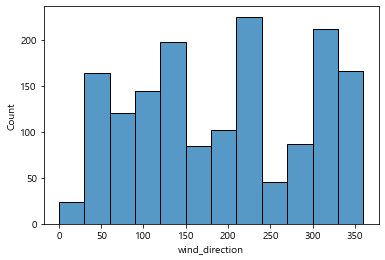

In [80]:
sns.histplot(data=df_pre[df_pre['wind_speed'] > 10.8]['wind_direction'])

#### 10-3. wind_preprocessing 공사중
요약
- 풍속의 경우
    - 풍향이 순간적으로 급하게 변화할 가능성은 적다고 가정
    - 결측치는 직전, 직후 값을 선형적으로 구현
- 풍향의 경우
    - 0 ~ 360의 값을 가지며 큰 폭으로 변화할 수 있음
    - 그렇다면 전처리를 어떻게 해야하는가?

In [81]:
# 결측치의 수를 체크
print((df_pre['wind_speed'] == -1).sum())
print((df_pre['wind_direction'] == -1).sum())

45703
46129


In [82]:
# 풍속이 -1인 경우의 인덱스를 저장
a = list(df_pre[df_pre['wind_speed'] == -1]['wind_speed'].index)
list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

31529


In [83]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'wind_speed'] = (df_pre.loc[i-1,'wind_speed'] + df_pre.loc[i+1,'wind_speed']) / 2

In [84]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [85]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'wind_speed']
    end = df_pre.loc[i[-1]+1,'wind_speed']
    a = (end - start)/(n+1)

    for j in i:
        df_pre.loc[j,'wind_speed'] = df_pre.loc[j-1,'wind_speed'] + a


#### 11. condition
요약
- 결측치 값이 약 30퍼로 매우 많음
- 이것을 계속 사용하려면 추가적인 데이터 보급이 필요

In [86]:
df_pre['condition'].unique()

array([ 1,  2, -1,  4,  3])

In [87]:
print('결측된 데이터 비율 :',df_pre[df_pre['condition'] == -1].shape[0]/df_pre.shape[0] * 100, '%')

결측된 데이터 비율 : 29.851217830882355 %


# <hr>

# Preprocessing 3

> ###### made by ssj

#### Period
- 2022.05.09 ~ 2022.05.11

<h4><details><summary>Index</summary><h6>

1. [Heat Index](#1-heat-index)

2. [Discomfort Index](#2-discomfort-index)

3. [column rename](#3-column-rename)
</h6></details></h4>

###### [이전 파트로](#eda--preprocessing-2)
###### [다음 파트로](#eda-2)

## 1. Heat Index
- 열지수 : 기온과 습도에 따라 사람이 실제로 느끼는 더위를 지수화한 것
<details><summary>계산 식 흐름 표 (click시 열림)</summary>

![](./img/HI.jpg)
- 출처 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3801457/#r39
- T is temperature in degrees F
- RH is relative humidity in percent</details>
<br>
<details><summary>열 지수별 증상표 (click시 열림)</summary>
<br>

|단계|지수 범위|설명|
|---|---|---|
|매우 높음|54이상|보통 사람이 열에 지속적으로 노출될 경우, 열사·일사병 위험이 매우 높음|
|높음|41 ~ 54 미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 일사병·열경련·일피폐 위험이 높음|
|보통|32 ~ 41미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 열사병·열경련·열피폐 가능성이 있음|
|낮음|32미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동시 피로 위험 높음|
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_04.jsp

</details>

In [88]:
# 화씨 온도로 변환
df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32

# B 계산
df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122874*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity'] + .00085282*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity'] - .00000199*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity']

# 습도가 13%이하, 화씨온도가 80이상 112이하일때 값 조정
index = list(df_pre[(df_pre['humidity'] <= 13) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 112)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] - ((13 - df_pre.loc[index,'humidity']) / 4) * ((17 - abs(df_pre.loc[index,'temp_F'] - 95)) / 17) ** 0.5

# 습도가 85%이상, 화씨온도가 80이상 87이하일때 값 조정
index = list(df_pre[(df_pre['humidity'] > 85) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 87)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] + 0.02 * (df_pre.loc[index,'humidity'] - 85) * (87 - df_pre.loc[index,'temp_F'])

# A 계산
df_pre['A'] = -10.3 + 1.1 * df_pre['temp_F'] + 0.047 * df_pre['humidity']
index = list(df_pre.loc[df_pre['A'] < 79].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'A']

# 화씨온도가 40이하일 경우
index = list(df_pre.loc[df_pre['temp_F'] < 40].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'temp_F']

#최종적으로 출력된 결과를 섭씨온도로 조정
df_pre.drop(columns = ['A'], axis=1, inplace=True)
df_pre.drop(columns = 'temp_F', axis=1, inplace=True)
df_pre['HI'] = (df_pre['HI'] - 32) / 1.8
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32
C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.5         -1      53.0         NaN   
1           1     1       0.0  18.1         -1      49.0         NaN   
2           1     2       0.0  19.7         -1      46.0         NaN   
3           1     3       0.0  20.8         -1      41.0         NaN   
4           1     4       0.0  22.2         -1      36.0         NaN   
...       ...   ...       ...   ...        ...       ...         ...   
14831611   30    19       0.0  10.7         -1      71.0         2.1   
14831612   30    20       0.0  11.0         -1      65.0         2.2   
14831613   30    21       0.0  11.9         -1      61.0         2.2   
14831614   30    22       0.0  13.4         -1      53.0         2.0   
14831615   30    23       0.0  15.1         -1      41.0         2.1   

          wind_direction  condition  month  year region            datetime  \
0                    NaN          1      6  2010    동인동 2010-06-01 00:00:00   
1                    NaN          1      6  2010    동인동 2010-06-01 01:00:00   
2                    NaN          1      6  2010    동인동 2010-06-01 02:00:00   
3                    NaN          1      6  2010    동인동 2010-06-01 03:00:00   
4                    NaN          2      6  2010    동인동 2010-06-01 04:00:00   
...                  ...        ...    ...   ...    ...                 ...   
14831611           335.0         -1      4  2022    구지면 2022-04-30 19:00:00   
14831612           339.0         -1      4  2022    구지면 2022-04-30 20:00:00   
14831613           338.0         -1      4  2022    구지면 2022-04-30 21:00:00   
14831614           351.0         -1      4  2022    구지면 2022-04-30 22:00:00   
14831615             5.0         -1      4  2022    구지면 2022-04-30 23:00:00   

                 HI  
0         15.589444  
1         17.245000  
2         18.926667  
3         20.006111  
4         21.415556  
...             ...  
14831611   9.679444  
14831612   9.852778  
14831613  10.738333  
14831614  12.179444  
14831615  13.736111  

[14831616 rows x 14 columns]

## 2. Discomfort Index
- 불쾌지수 
- 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)라고도 함
- 여름철 실내의 무더위의 기준으로서만 사용되고 있을 뿐, 복사나 바람 조건은 포함되어 있지 않기 때문에 그 적정한 사용에는 한계가 있다는 점에 유의
- 불쾌지수 값에 따라 불쾌감을 느끼는 정도도 개인에 따라 약간의 차이가 있음
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_05.jsp
- ![](./img/DI.gif)

<details><summary>불쾌지수별 증상표 (click시 열림)</summary><br>

|단계|지수 범위|설명|
|---|---|---|
|매우 높음|80이상|전원 불쾌감|
|높음|75~ 80 미만|50% 정도의 불쾌감|
|보통|68 ~ 75미만|불쾌감을 느낌|
|낮음68미만|전원 쾌적함|
</details>

In [89]:
df_pre = df_pre[:]
df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1195829807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32


day  hour  rainfall  temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.5         -1      53.0         NaN   
1           1     1       0.0  18.1         -1      49.0         NaN   
2           1     2       0.0  19.7         -1      46.0         NaN   
3           1     3       0.0  20.8         -1      41.0         NaN   
4           1     4       0.0  22.2         -1      36.0         NaN   
...       ...   ...       ...   ...        ...       ...         ...   
14831611   30    19       0.0  10.7         -1      71.0         2.1   
14831612   30    20       0.0  11.0         -1      65.0         2.2   
14831613   30    21       0.0  11.9         -1      61.0         2.2   
14831614   30    22       0.0  13.4         -1      53.0         2.0   
14831615   30    23       0.0  15.1         -1      41.0         2.1   

          wind_direction  condition  month  year region            datetime  \
0                    NaN          1      6  2010    동인동 2010-06-01 00:00:00   
1                    NaN          1      6  2010    동인동 2010-06-01 01:00:00   
2                    NaN          1      6  2010    동인동 2010-06-01 02:00:00   
3                    NaN          1      6  2010    동인동 2010-06-01 03:00:00   
4                    NaN          2      6  2010    동인동 2010-06-01 04:00:00   
...                  ...        ...    ...   ...    ...                 ...   
14831611           335.0         -1      4  2022    구지면 2022-04-30 19:00:00   
14831612           339.0         -1      4  2022    구지면 2022-04-30 20:00:00   
14831613           338.0         -1      4  2022    구지면 2022-04-30 21:00:00   
14831614           351.0         -1      4  2022    구지면 2022-04-30 22:00:00   
14831615             5.0         -1      4  2022    구지면 2022-04-30 23:00:00   

                 HI        DI  
0         15.589444  60.74355  
1         17.245000  62.73431  
2         18.926667  64.65038  
3         20.006111  65.72772  
4         21.415556  67.04608  
...             ...       ...  
14831611   9.679444  52.33503  
14831612   9.852778  52.99350  
14831613  10.738333  54.40241  
14831614  12.179444  56.60598  
14831615  13.736111  58.79709  

[14831616 rows x 15 columns]

## 3. column rename

In [90]:
df_final = df_pre[['year','month','day','hour','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','region','HI','DI']]
df_final.rename(columns={'datetime':'date'})
df_final.to_csv('./output/daegu_final.csv', index_label=False)

# <hr>

# EDA 2

#### Period
- 2022.05.06 ~ ???

<h4><details><summary>Index</summary><h6>

1. [겨울에 따뜻하면 여름에 폭염이 나타난다.](#1-겨울에-따뜻하면-여름에-폭염이-나타난다)
>###### LNH : 2022.05.06 ~ 2022.05.12
2. [인구밀도가 높은 지역은 상대적으로 열지수가 높다.](#2-인구밀도가-높은-지역은-상대적으로-열지수가-높다)
>###### KHW : 2022.05.06 ~ 
3. [지역용도에 따라 열지수의 차이가 나타난다. (공단,상업,주거,산지,빌딩숲 등)](#3-지역용도에-따라-열지수의-차이가-나타난다-공단상업주거산지빌딩숲-등)
>###### LEH : 2022.05.11 ~ 
4. [기저질환 환자가 온열질환 취약계층이다.](#4-기저질환-환자가-온열질환-취약계층이다)
>###### KMJ : 2022.05.19 ~ 2022.05.20
5. [대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.](#5-대구의-지형-특징상분지-열섬현상이-자주-발생한다)
>###### PJW : 2022.05.09 ~ 
6. [겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.](#6-겨울에-추우면-전력-소비량과-온실-가스-배출량이-늘어-여름에-덥다)
>###### ??? : 
7. [교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다.](#7-교통량이-많으면-엔진의-열배출이-기온에-영향을-미친다)
>###### ??? : 
8. [비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)](#8-비가-온-날이-많으면-폭염기간에-열지수가-높다-폭염과-습도의-관계)
>###### KMJ : 2022.05.09 ~ 2022.05.16
9. [대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)](#9-대기중의-미세먼지-농도가-높으면-온도가-높다미세먼지가-많으면-통풍이-잘-안된다-속설-검증)
>###### KMJ : 2022.06.17 ~ 2022.05.20
10. [나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)](#10-나무를-많이-심으면-온도가-떨어진다-대구-녹지사업-참고)
>###### LEH : 2022.05.06 ~ 

</h6></details></h4>

###### [이전 파트로](#preprocessing-3)
###### [제일 위로](#※-필요한-패키지-및-데이터-불러오기)

## 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
>###### made by LNH

#### Period
- 2022.05.06 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 데이터 확인

2. 겨울과 여름의 데이터 비교

3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

4. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
df_final=pd.read_csv('output/daegu_final.csv')

### 1. 데이터 확인

In [4]:
# df_final 데이터 확인

df_final.head()

year  month  day  hour             datetime  temp  rainfall  lightning  \
0  2010      6    1     0  2010-06-01 00:00:00  16.5       0.0         -1   
1  2010      6    1     1  2010-06-01 01:00:00  18.1       0.0         -1   
2  2010      6    1     2  2010-06-01 02:00:00  19.7       0.0         -1   
3  2010      6    1     3  2010-06-01 03:00:00  20.8       0.0         -1   
4  2010      6    1     4  2010-06-01 04:00:00  22.2       0.0         -1   

   humidity  wind_speed  wind_direction  condition region         HI        DI  
0      53.0         NaN             NaN          1    동인동  15.589444  60.74355  
1      49.0         NaN             NaN          1    동인동  17.245000  62.73431  
2      46.0         NaN             NaN          1    동인동  18.926667  64.65038  
3      41.0         NaN             NaN          1    동인동  20.006111  65.72772  
4      36.0         NaN             NaN          2    동인동  21.415556  67.04608

In [5]:
# 날짜와 지역 상대습도와 온도 열지수만 있는 데이터프레임을 만듦

temp_pre=df_final.loc[:,['year','month','day','hour','region','humidity','temp','HI']]

In [6]:
temp_pre.isna().any()

year        False
month       False
day         False
hour        False
region      False
humidity    False
temp        False
HI          False
dtype: bool

### 2. 겨울과 여름의 데이터 비교

#### 1. X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프

In [7]:
# 중복코드 치환
mo=temp_pre['month']
ye=temp_pre['year']

In [8]:
# 겨울의 매년 월평균 기온들을 리스트로 만들어주는 함수
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [9]:
# 여름의 매년 월평균 기온들을 리스트로 만들어주는 함수
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [10]:
# 여름과 겨울의 매년 월평균 기온을 받아서 한 그래프 위에 그려주고 이미지로 저장해주는 함수
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)

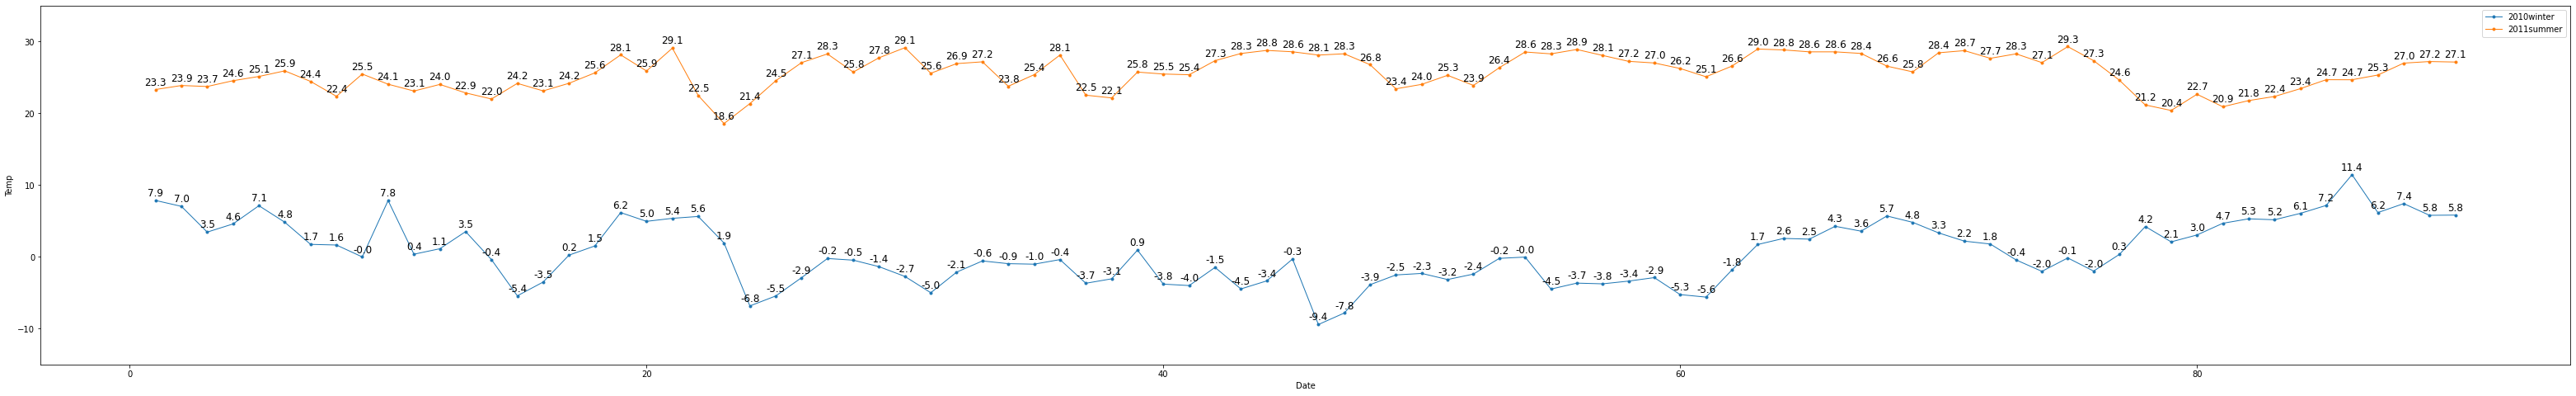

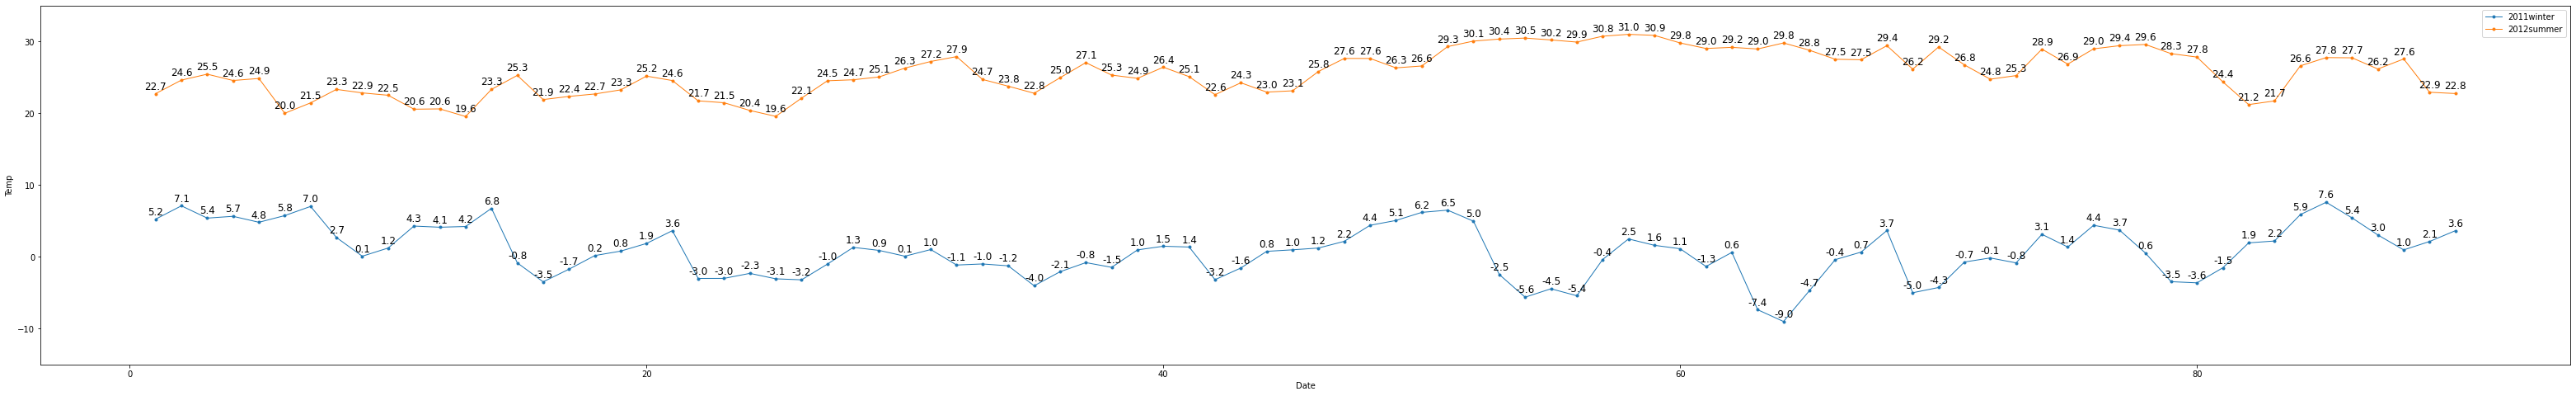

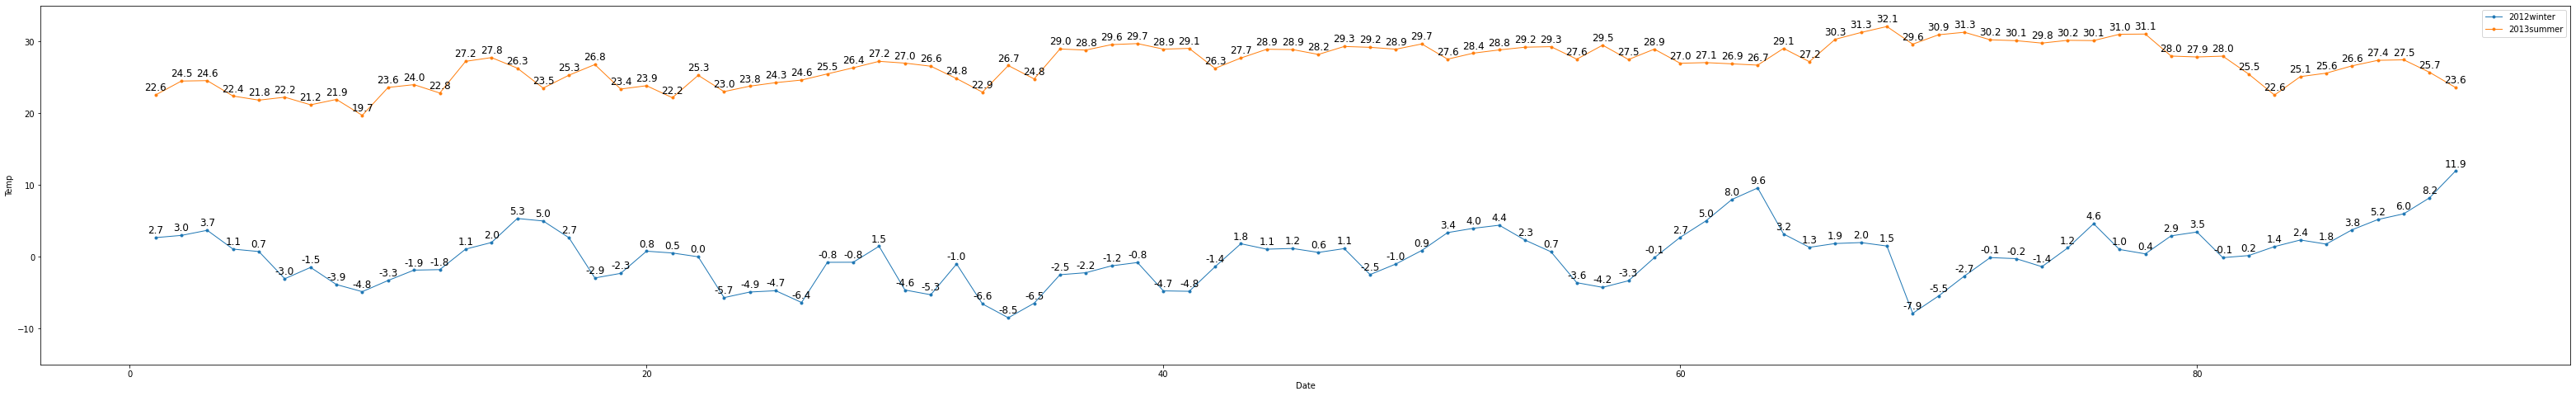

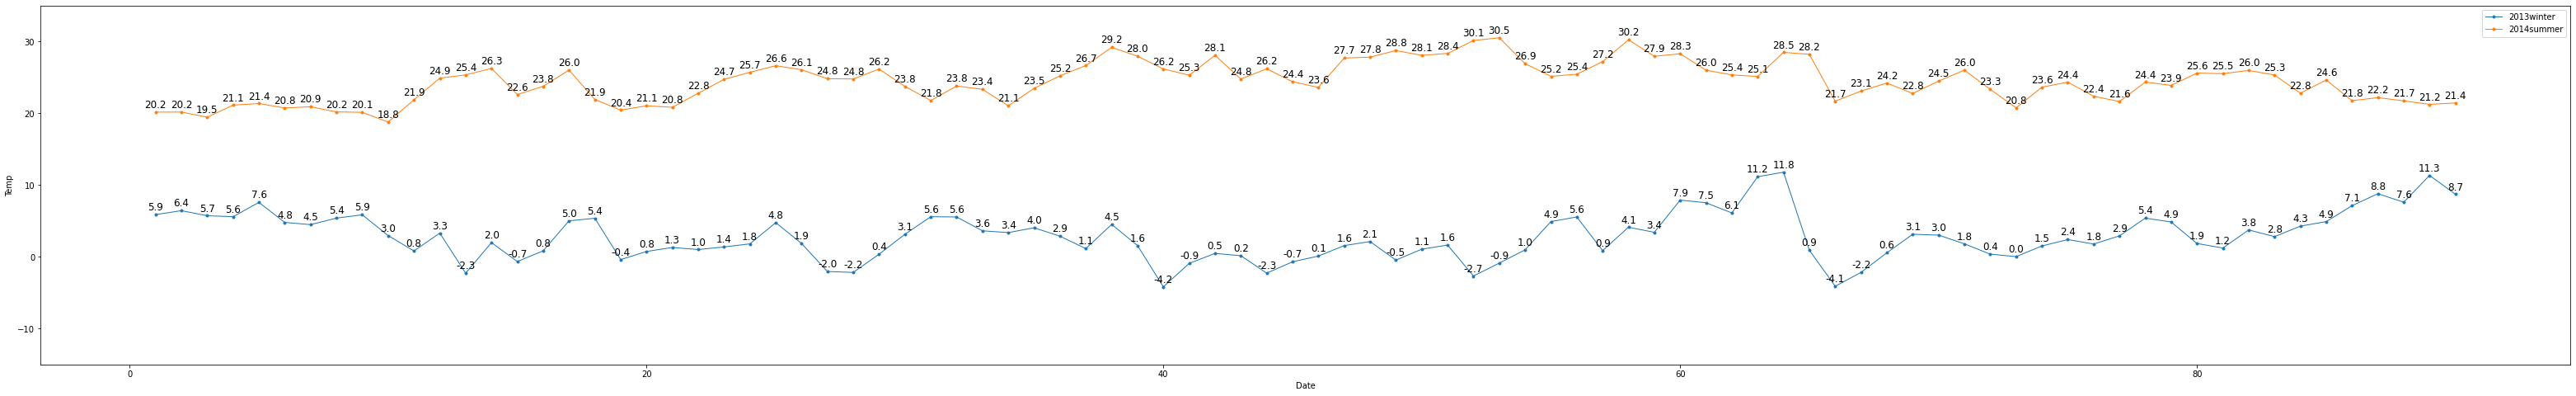

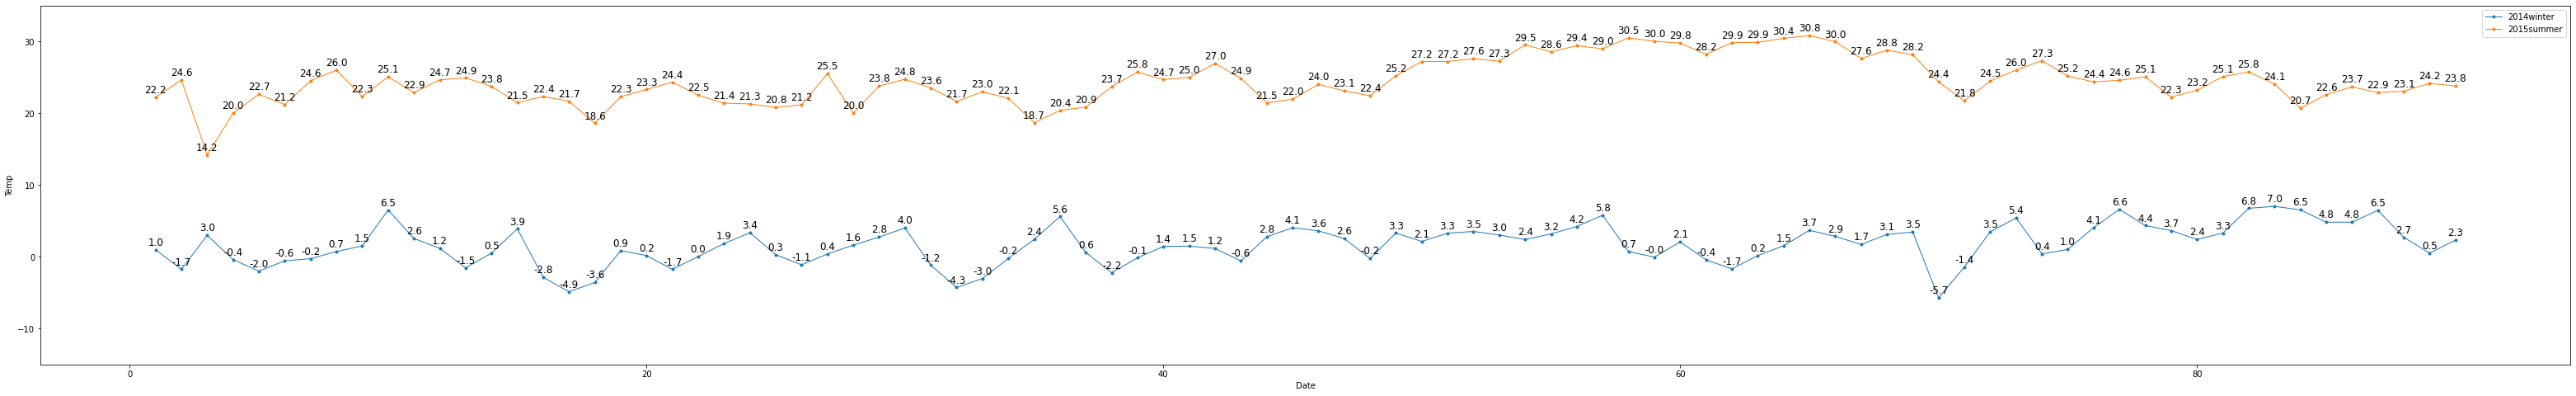

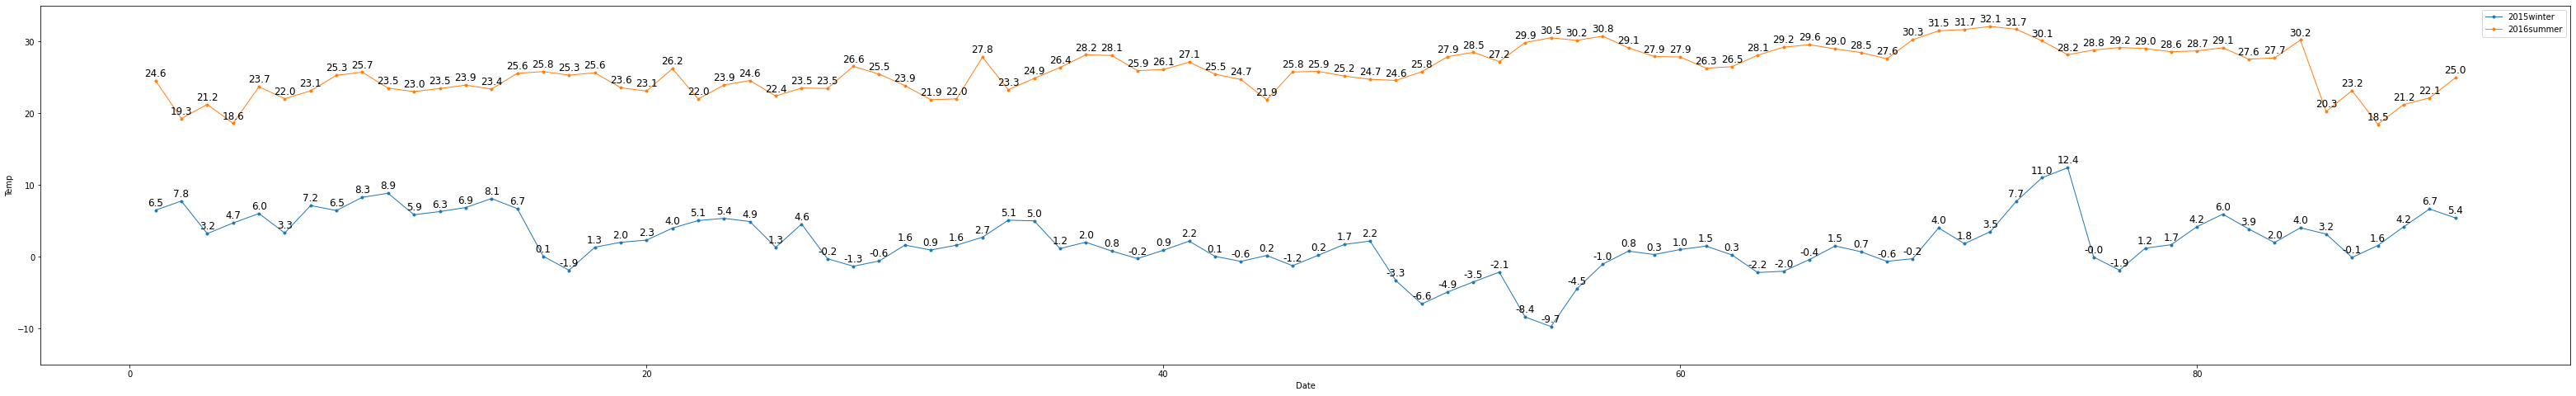

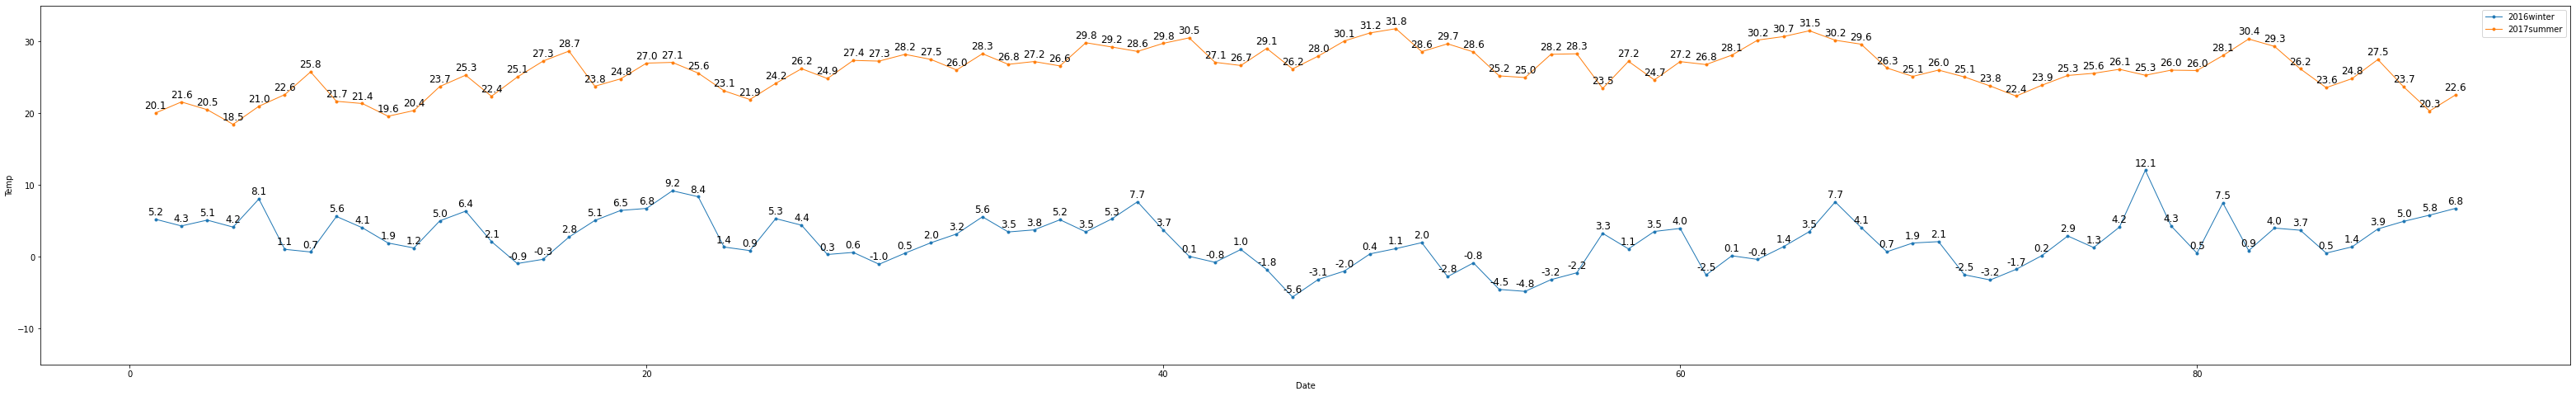

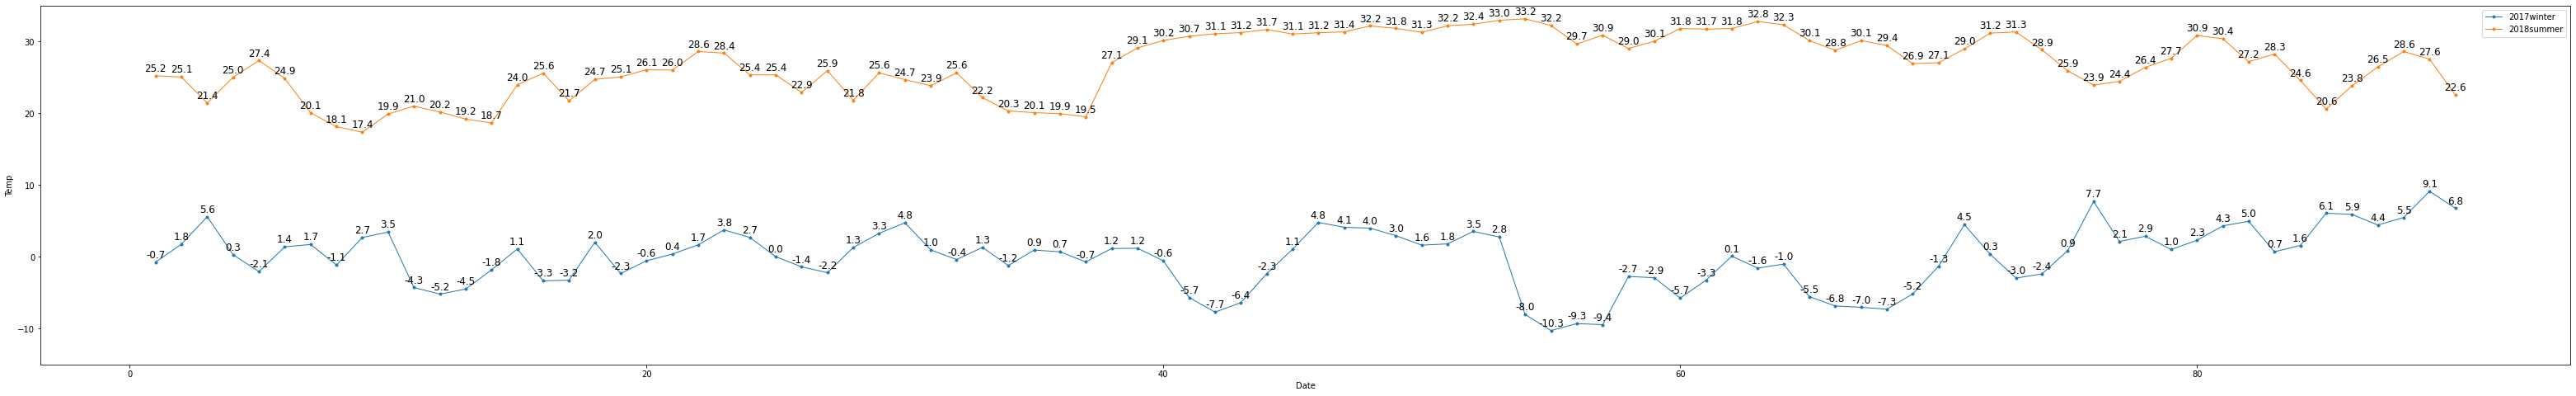

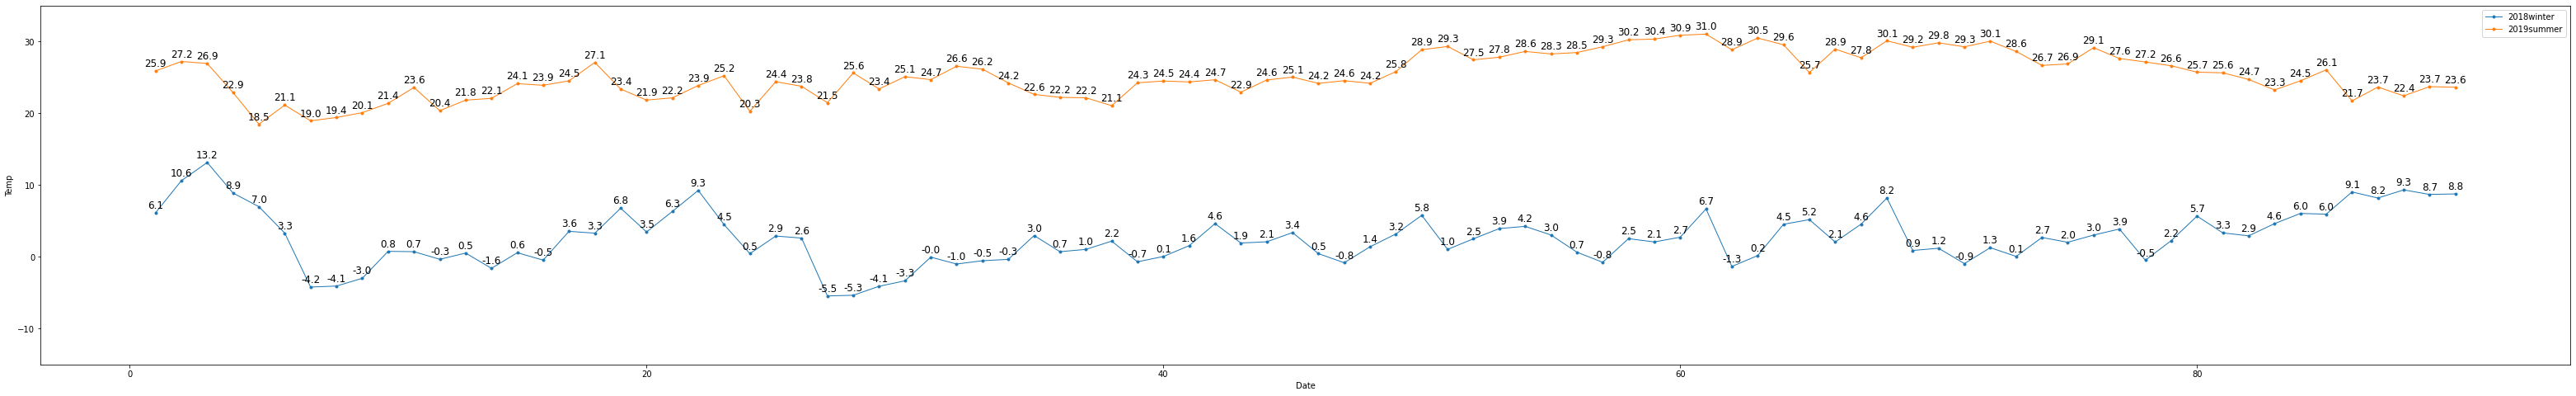

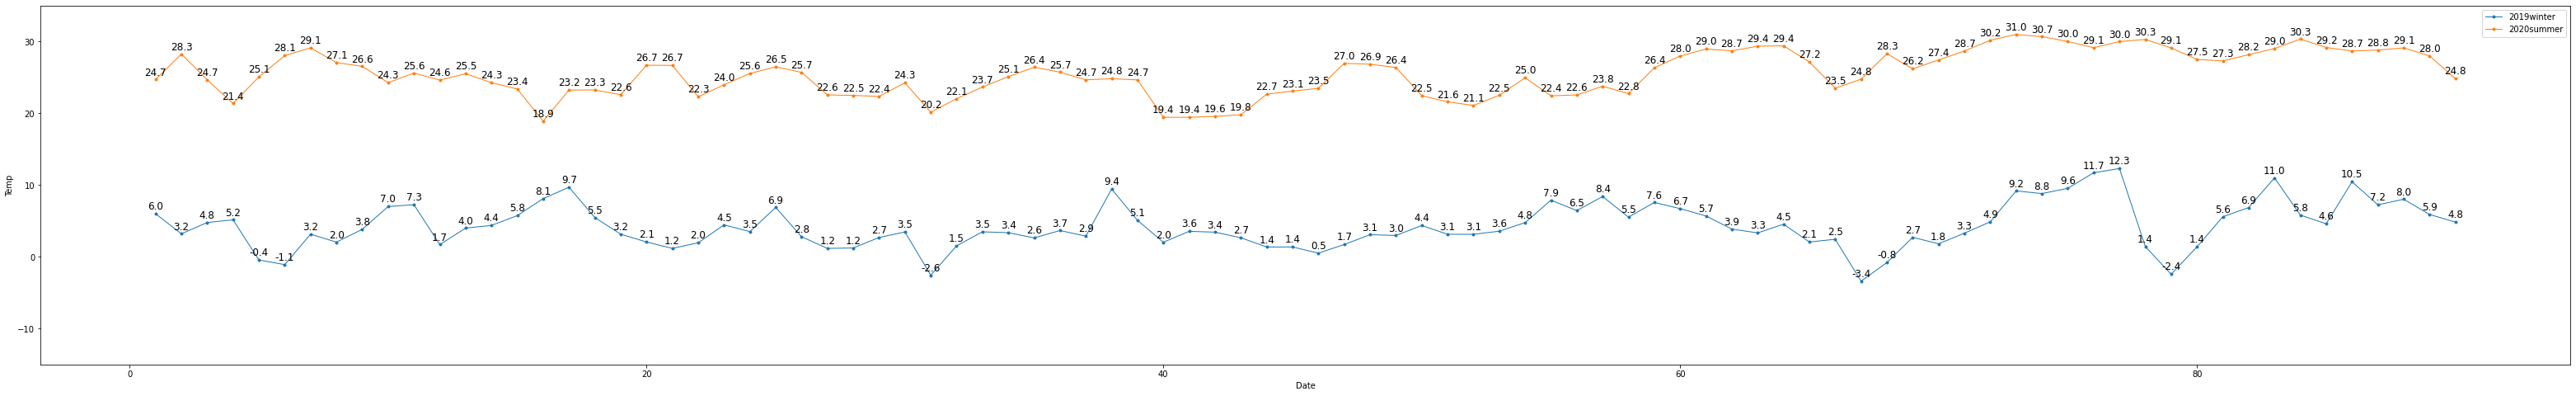

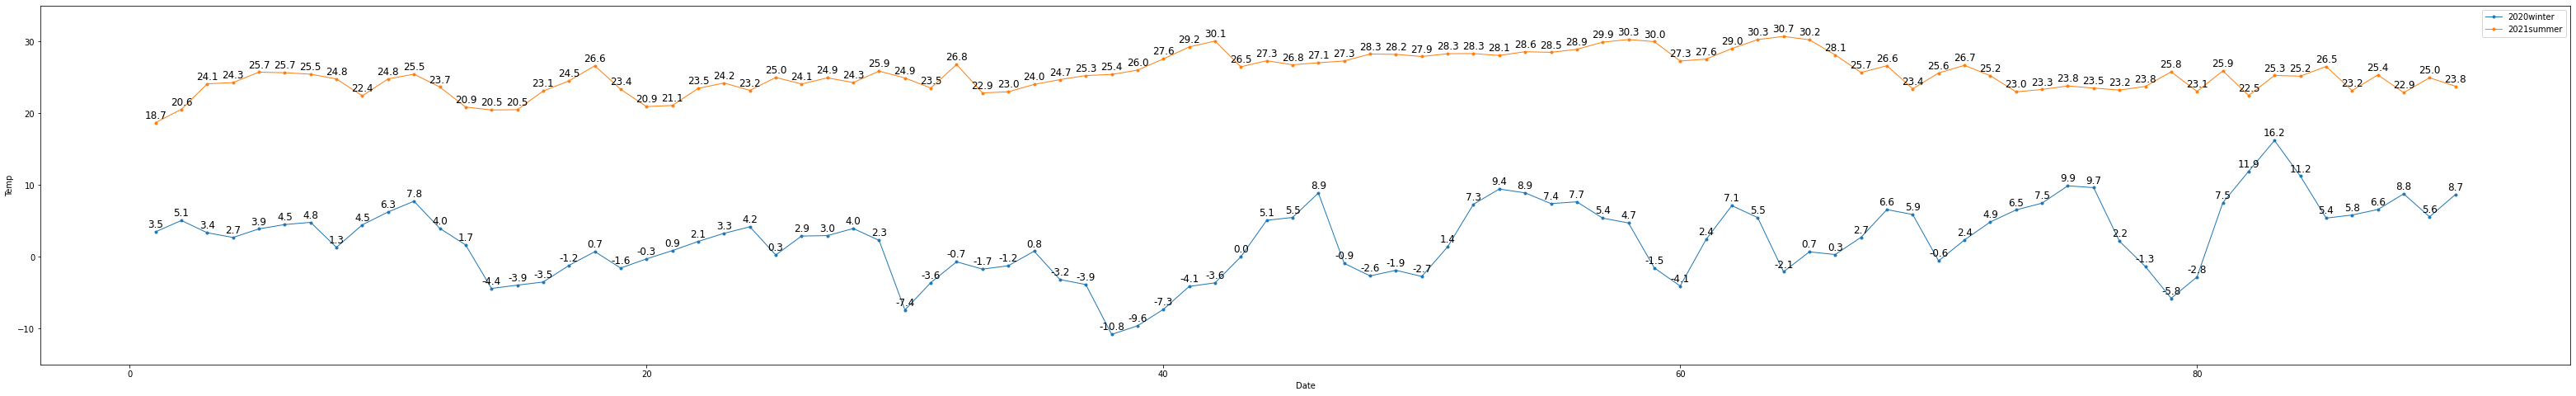

In [11]:
# 2011년부터 10년치의 여름과 겨울의 평균기온 비교 그래프를 보여주고 그림으로 저장
for i in range(2010,2021):
    win_sum_graph(i,i+1)

#### 2. X년도의 겨울, (X+1)년도의 여름 HI 그래프

1. 필요한 column 불러오기 및 EDA

In [12]:
# 필요한 열지수 정보만 가져온다.
HI=temp_pre.loc[:,['year','month','day','hour','HI','region']]
HI.head()

year  month  day  hour         HI region
0  2010      6    1     0  15.589444    동인동
1  2010      6    1     1  17.245000    동인동
2  2010      6    1     2  18.926667    동인동
3  2010      6    1     3  20.006111    동인동
4  2010      6    1     4  21.415556    동인동

In [13]:
# 폭염의 기준인 체감온도 33도 이상인 시간대만 따로 데이터프레임으로 만듬
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
# HIGH[HIGH['month']==5].count()
HIGH.count()

year      603964
month     603964
day       603964
hour      603964
HI        603964
region    603964
dtype: int64

In [14]:
# 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for i in range(3):
    print('{0}월 총 폭염 시간 수: '.format((i+6))+str(len(HIGH[HIGH['month']==(i+6)]))+'시간',end='\n')

6월 총 폭염 시간 수: 13506시간
7월 총 폭염 시간 수: 261820시간
8월 총 폭염 시간 수: 311003시간


In [15]:
# 2010년부터 2021년 까지 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(3):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+6))+str(len(temp_HIGH[temp_HIGH['month']==(i+6)]))+'시간',end='\n')
    print()

2010년 6월 총 폭염 시간 수: 1762시간
2010년 7월 총 폭염 시간 수: 19740시간
2010년 8월 총 폭염 시간 수: 42378시간

2011년 6월 총 폭염 시간 수: 3177시간
2011년 7월 총 폭염 시간 수: 18735시간
2011년 8월 총 폭염 시간 수: 19734시간

2012년 6월 총 폭염 시간 수: 40시간
2012년 7월 총 폭염 시간 수: 22656시간
2012년 8월 총 폭염 시간 수: 25951시간

2013년 6월 총 폭염 시간 수: 1072시간
2013년 7월 총 폭염 시간 수: 33611시간
2013년 8월 총 폭염 시간 수: 39455시간

2014년 6월 총 폭염 시간 수: 105시간
2014년 7월 총 폭염 시간 수: 16945시간
2014년 8월 총 폭염 시간 수: 5070시간

2015년 6월 총 폭염 시간 수: 5시간
2015년 7월 총 폭염 시간 수: 11987시간
2015년 8월 총 폭염 시간 수: 12389시간

2016년 6월 총 폭염 시간 수: 121시간
2016년 7월 총 폭염 시간 수: 17797시간
2016년 8월 총 폭염 시간 수: 32981시간

2017년 6월 총 폭염 시간 수: 1968시간
2017년 7월 총 폭염 시간 수: 31345시간
2017년 8월 총 폭염 시간 수: 21243시간

2018년 6월 총 폭염 시간 수: 1143시간
2018년 7월 총 폭염 시간 수: 48215시간
2018년 8월 총 폭염 시간 수: 34892시간

2019년 6월 총 폭염 시간 수: 301시간
2019년 7월 총 폭염 시간 수: 12623시간
2019년 8월 총 폭염 시간 수: 22858시간

2020년 6월 총 폭염 시간 수: 3528시간
2020년 7월 총 폭염 시간 수: 2780시간
2020년 8월 총 폭염 시간 수: 41096시간

2021년 6월 총 폭염 시간 수: 284시간
2021년 7월 총 폭염 시간 수: 25386시간
2021년 8월 총 폭염 시간 수: 12956시간



2-1. 매년 폭염인 달의 시간대를 시각화 하는 함수

In [16]:
def HI_graph(m,y):
    xs=[str(i+6)+'th month' for i in range(3)]
    ys=y


    plt.figure(figsize=(10,6)) #그래프 크기 지정

    plt.plot(xs,ys,'o-',ms=3,lw=1)
    # plt.xlabel('Month') #그래프 x축 이름(label) 지정
    plt.title('{0}th year summer HI count'.format(m))
    plt.ylabel('HI')
    plt.ylim(0,50000)
    # plt.legend()

    for i in range(len(xs)):
        height=ys[i]
        plt.text(xs[i],height+0.25,'%.f hour'%height,ha='center',va='bottom',size=12)

    # plt.savefig(str(j)+'년도 여름 열지수')

2-2. 매년 폭염인 달의 시간대를 시각화 하는 코드

In [17]:
for j in range(2010,2022):
    HI_temp=[]
    temp_HIGH=HIGH[HIGH['year']==j]
    # print('{0}년 폭염 시간 수: '.format(j))
    for i in range(3):
        HI_temp.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))
    # HI_graph(j,HI_temp)
    # print(HI_temp)
    # print()

3-1. HI가 -10 이하인 한파인 시간대를 찾아봄

In [18]:
# 한파인 날을 따로 모은 데이터프레임을 만든다
index=list(HI[(HI['HI']<=-10)].index)
LOW=HI.loc[index,:]
# LOW[LOW['month']==1].count()
LOW.count()

year      27080
month     27080
day       27080
hour      27080
HI        27080
region    27080
dtype: int64

In [19]:
# 한파인 시간대가 있는 달을 찾아봄
LOW['month'].unique()

array([ 1,  2, 12], dtype=int64)

In [20]:
# 월별로 한파인 시간대를 세어봄
for i in range(1):
    print('{0}월 총 한파 시간 수: '.format((i+12))+str(len(LOW[LOW['month']==(i+12)]))+'시간',end='\n')

for i in range(2):
    print('{0}월 총 한파 시간 수: '.format((i+1))+str(len(LOW[LOW['month']==(i+1)]))+'시간',end='\n')

12월 총 한파 시간 수: 2069시간
1월 총 한파 시간 수: 19087시간
2월 총 한파 시간 수: 5924시간


In [21]:
for j in range(2010,2022):
    temp_LOW=LOW[LOW['year']==j]
    for i in range(1):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+12))+str(len(temp_LOW[temp_LOW['month']==(i+12)]))+'시간',end='\n')
    for i in range(2):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+1))+str(len(temp_LOW[temp_LOW['month']==(i+1)]))+'시간',end='\n')
    print()

2010년 12월 총 한파 시간 수: 293시간
2010년 1월 총 한파 시간 수: 0시간
2010년 2월 총 한파 시간 수: 0시간

2011년 12월 총 한파 시간 수: 0시간
2011년 1월 총 한파 시간 수: 2597시간
2011년 2월 총 한파 시간 수: 0시간

2012년 12월 총 한파 시간 수: 796시간
2012년 1월 총 한파 시간 수: 144시간
2012년 2월 총 한파 시간 수: 2260시간

2013년 12월 총 한파 시간 수: 0시간
2013년 1월 총 한파 시간 수: 1765시간
2013년 2월 총 한파 시간 수: 1453시간

2014년 12월 총 한파 시간 수: 0시간
2014년 1월 총 한파 시간 수: 0시간
2014년 2월 총 한파 시간 수: 0시간

2015년 12월 총 한파 시간 수: 0시간
2015년 1월 총 한파 시간 수: 5시간
2015년 2월 총 한파 시간 수: 65시간

2016년 12월 총 한파 시간 수: 0시간
2016년 1월 총 한파 시간 수: 3159시간
2016년 2월 총 한파 시간 수: 0시간

2017년 12월 총 한파 시간 수: 153시간
2017년 1월 총 한파 시간 수: 22시간
2017년 2월 총 한파 시간 수: 0시간

2018년 12월 총 한파 시간 수: 11시간
2018년 1월 총 한파 시간 수: 7209시간
2018년 2월 총 한파 시간 수: 2127시간

2019년 12월 총 한파 시간 수: 0시간
2019년 1월 총 한파 시간 수: 0시간
2019년 2월 총 한파 시간 수: 0시간

2020년 12월 총 한파 시간 수: 258시간
2020년 1월 총 한파 시간 수: 0시간
2020년 2월 총 한파 시간 수: 0시간

2021년 12월 총 한파 시간 수: 558시간
2021년 1월 총 한파 시간 수: 4170시간
2021년 2월 총 한파 시간 수: 0시간



3-2. X년의 한파시간대와 (X+1)년의 폭염 시간대를 비교하여 시각화 하는 함수

In [22]:
# 시각화 한 후 저장까지 함
def HI_graph(m,H,L):
    xs=[1,2,3]
    y1=H
    y2=L


    fig,ax1=plt.subplots(figsize=(15,6))
    ax1.set_ylabel('Heat Wave')
    ax1.set_xticks([1,2,3])
    ax1.set_ylim([0,50000])
    ax1.set_title(str(m+1)+' year Heat_Index comparision',size=24,family='fantasy')
    line1=ax1.plot(xs,y1,color='red',label=str(m+1)+' Summer')

    ax2=ax1.twinx()
    ax2.set_ylabel('Cold Wave')
    ax2.set_ylim([0,7500])
    line2=ax2.plot(xs,y2,color='blue',label=str(m)+' Winter')

    lines=line1+line2
    labels=[l.get_label() for l in lines]
    prop = dict(
        # family='fantasy', # 글씨체
        style='italic', # 글씨 형식 - 이탤릭형식
        size=18 # 글씨 크기
    )
    
    config_legend=dict(## 범례 설정
        loc='upper left', # 범례 위치 설정
        prop=prop # 범례 폰트 속성
    )
    ax1.legend(lines,labels,**config_legend)

    for i in range(len(xs)):
        height=y1[i]
        ax1.text(xs[i],height+0.7,'%.f hour'%height,ha='center',va='bottom',size=12)
            
    for i in range(len(xs)):
        height=y2[i]
        ax2.text(xs[i],height+0.15,'%.f hour'%height,ha='center',va='bottom',size=12)

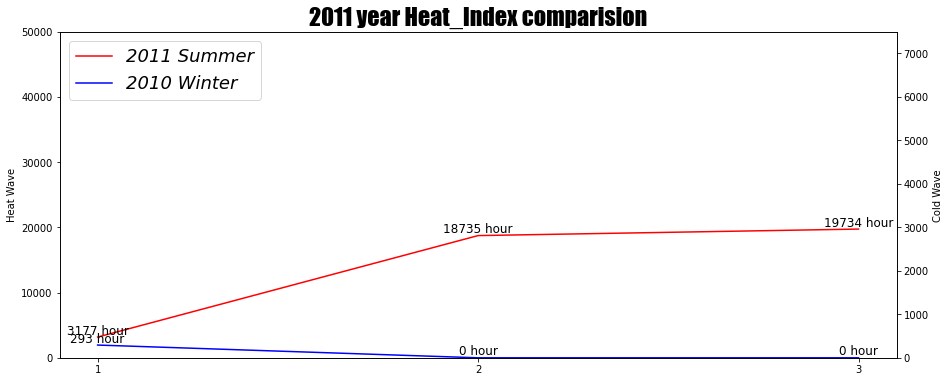

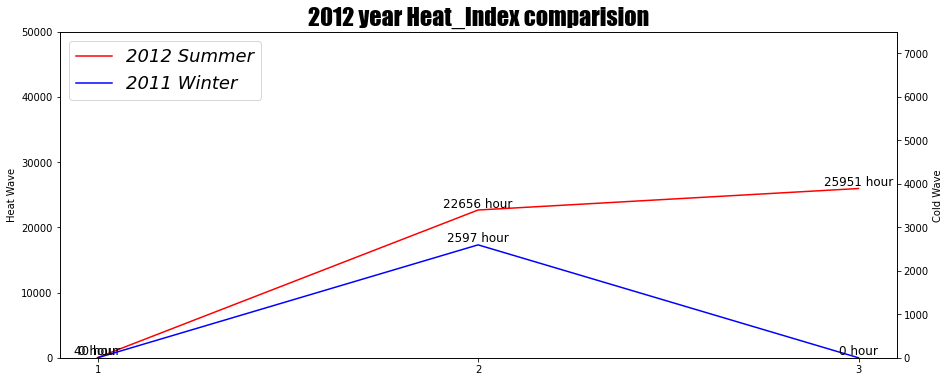

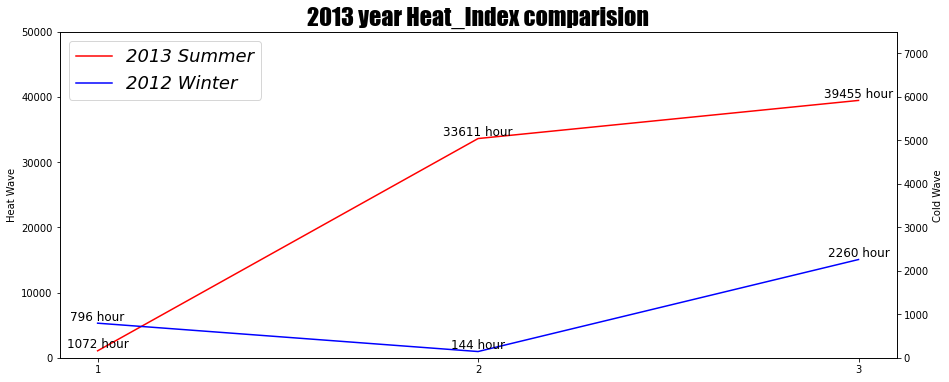

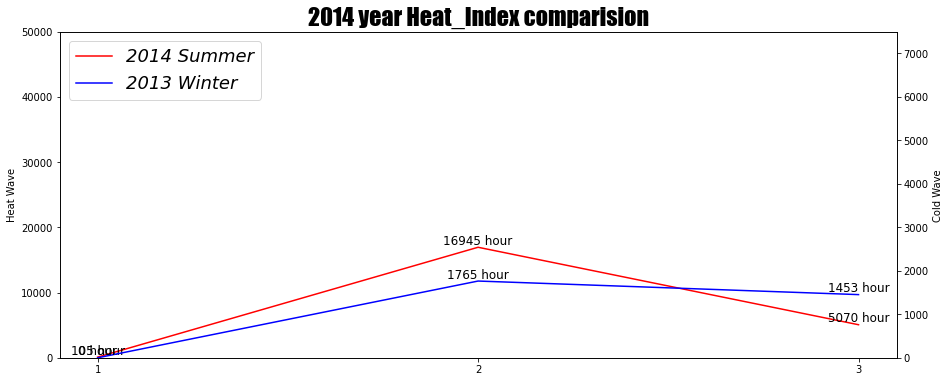

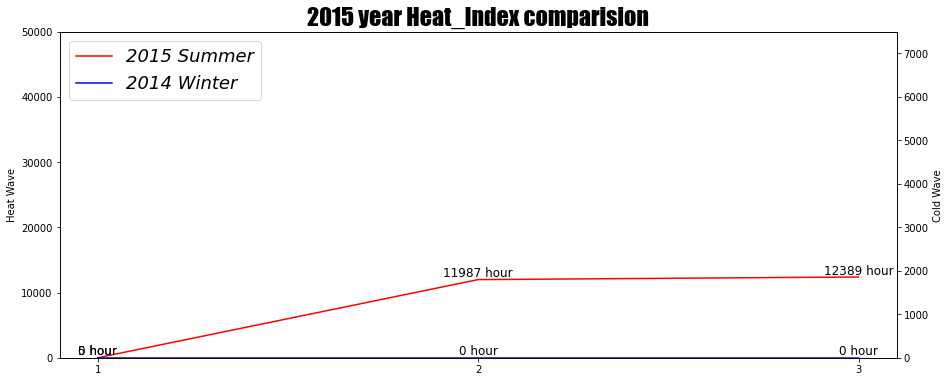

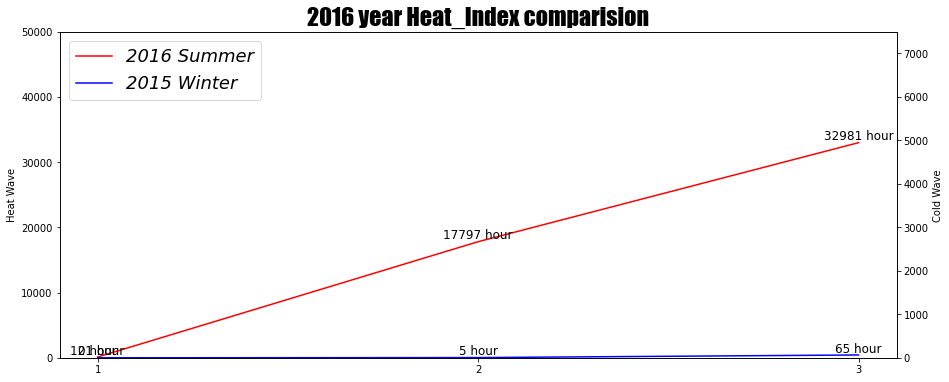

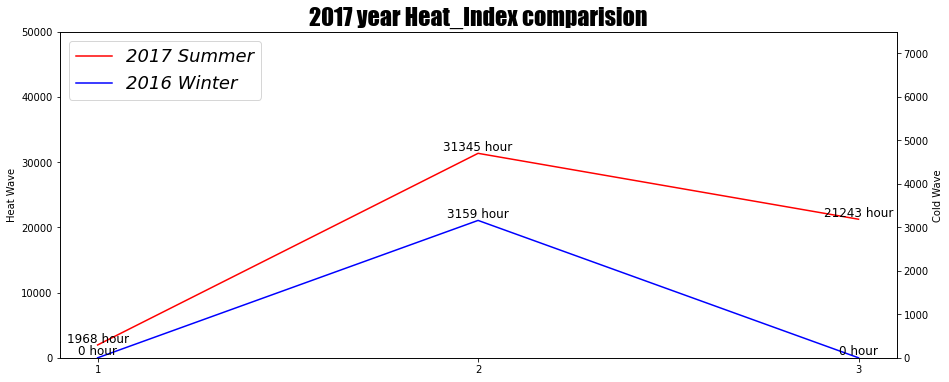

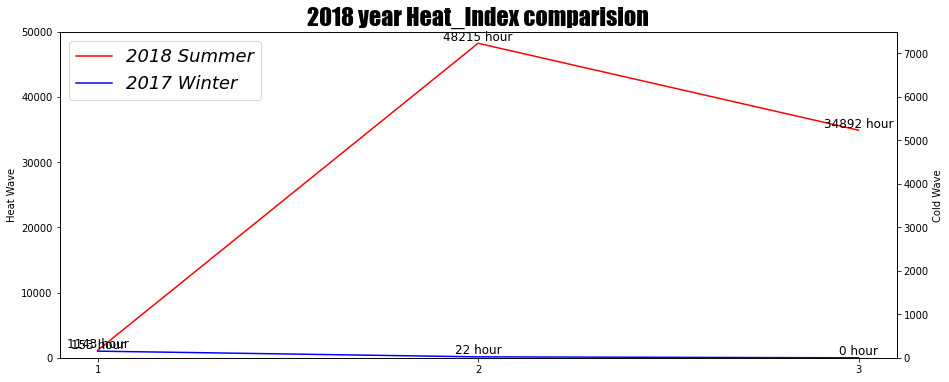

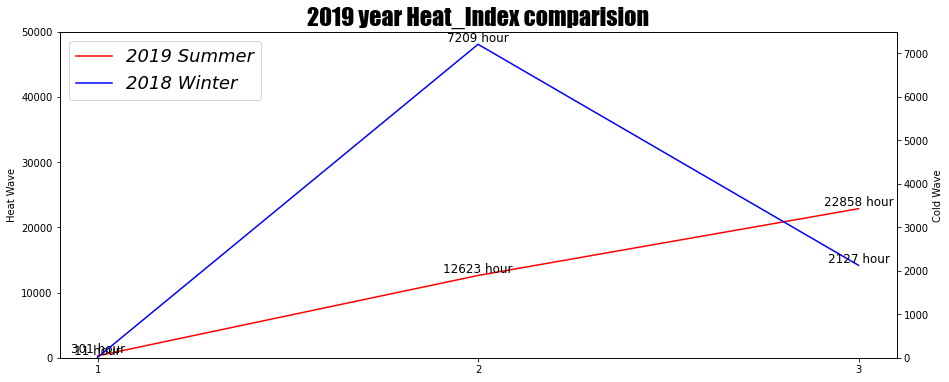

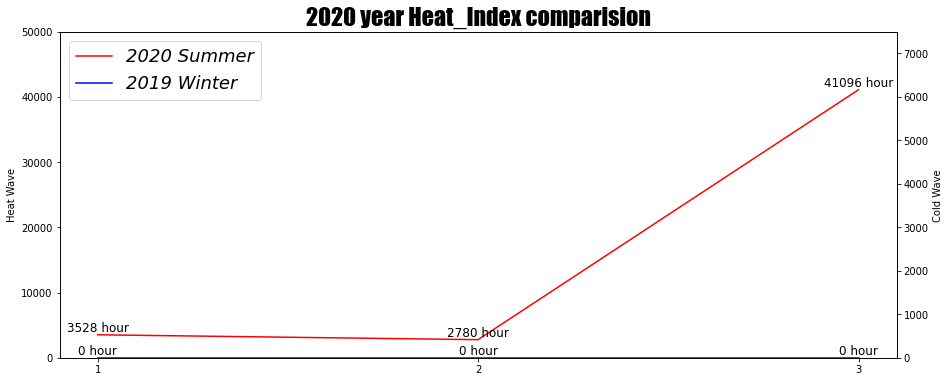

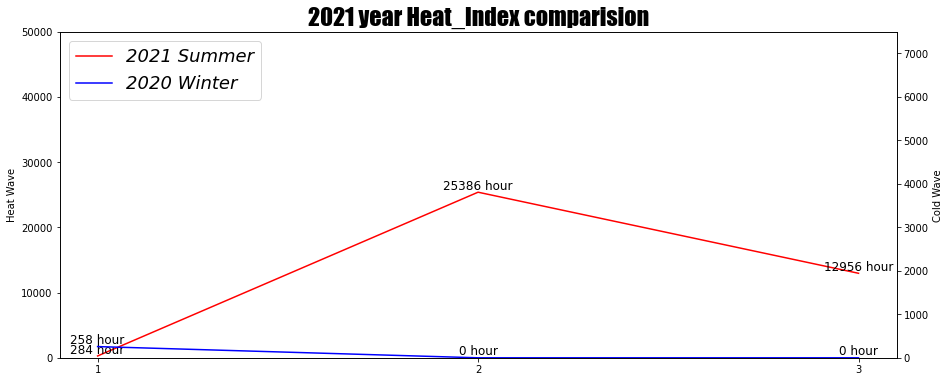

In [23]:
# 2011년 부터 2021년까지를 비교하여 시각화한 것을 저장하는 코드
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high=[]
    for i in range(3):
        summer_high.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low=[]
    for i in range(1):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+12)]))
    for i in range(2):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+1)]))
    
    HI_graph(j,summer_high,winter_low)

4-1 작년 겨울과 올해 여름의 4달간 기록을 비교하여 시각화

In [24]:
# 열지수 33 이상인 시간대만 추출
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
# HIGH[HIGH['month']==5].count()
HIGH.count()

year      603964
month     603964
day       603964
hour      603964
HI        603964
region    603964
dtype: int64

In [25]:
# 열지수 -10이하인 시간대만 추출
index=list(HI[(HI['HI']<=-10)].index)
LOW=HI.loc[index,:]
# LOW[LOW['month']==1].count()
LOW.count()

year      27080
month     27080
day       27080
hour      27080
HI        27080
region    27080
dtype: int64

In [26]:
# 겨울과 여름의 시작부터 4달간의 열지수 시간대 그래프
# 시각화 한 후 저장까지 함
def HI_graph(m,H,L):
    xs=[1,2,3,4]
    y1=H
    y2=L

    fig,ax1=plt.subplots(figsize=(15,6))
    ax1.set_ylabel('Heat Wave')
    ax1.set_xticks([1,2,3,4])
    ax1.set_ylim([0,50000])
    ax1.set_title(str(m+1)+' year Heat_Index comparison',size=24,family='fantasy')
    line1=ax1.plot(xs,y1,color='red',label=str(m+1)+' Summer')

    ax2=ax1.twinx()
    ax2.set_ylabel('Cold Wave')
    ax2.set_ylim([0,8000])
    line2=ax2.plot(xs,y2,color='blue',label=str(m)+' Winter')

    lines=line1+line2
    labels=[l.get_label() for l in lines]
    prop = dict(
        # family='fantasy', # 글씨체
        style='italic', # 글씨 형식 - 이탤릭형식
        size=18 # 글씨 크기
    )
    
    config_legend=dict(## 범례 설정
        loc='upper left', # 범례 위치 설정
        prop=prop # 범례 폰트 속성
    )
    ax1.legend(lines,labels,**config_legend)

    for i in range(len(xs)):
        height=y1[i]
        ax1.text(xs[i],height+0.7,'%.f hour'%height,ha='center',va='bottom',size=12)
            
    for i in range(len(xs)):
        height=y2[i]
        ax2.text(xs[i],height+0.15,'%.f hour'%height,ha='center',va='bottom',size=12)

    plt.savefig(str(m)+'년도 겨울과 여름의 열지수')

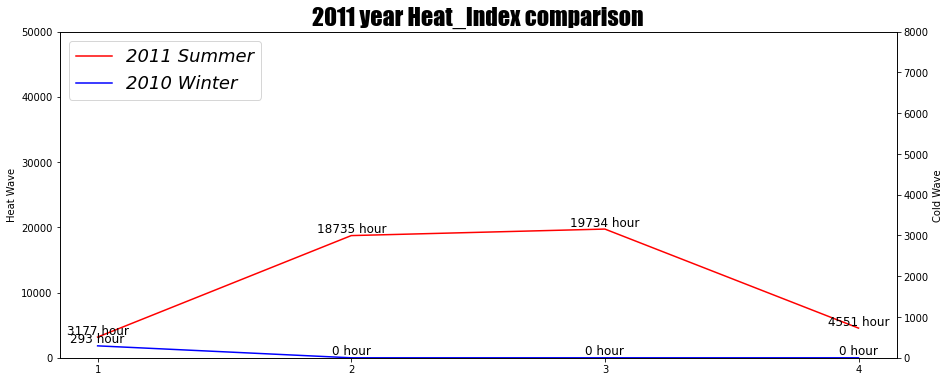

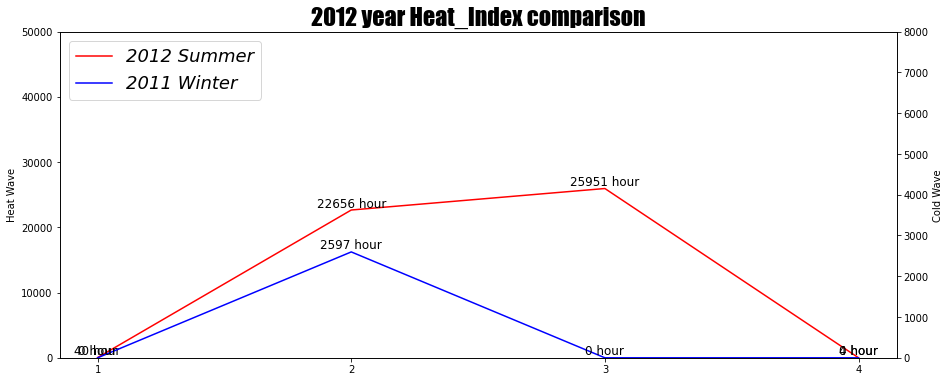

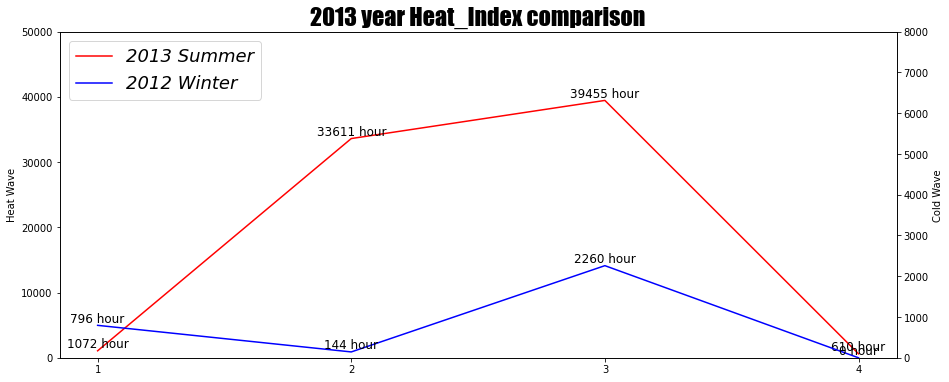

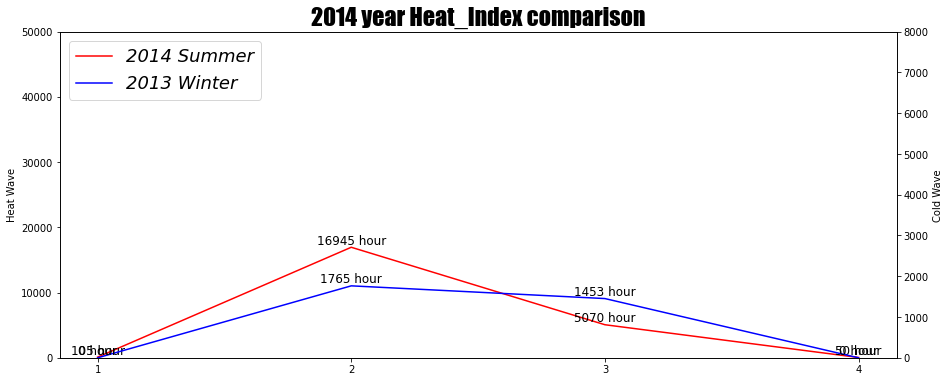

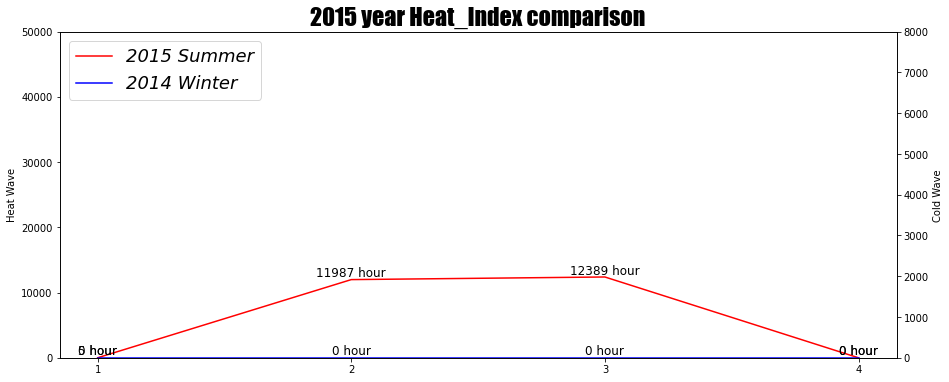

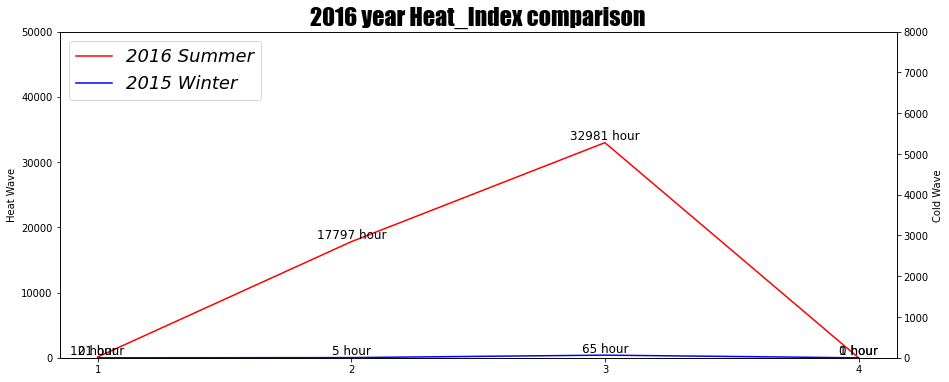

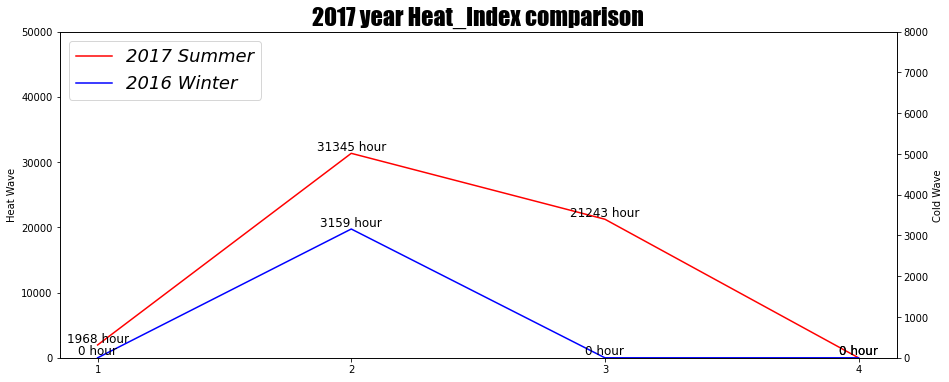

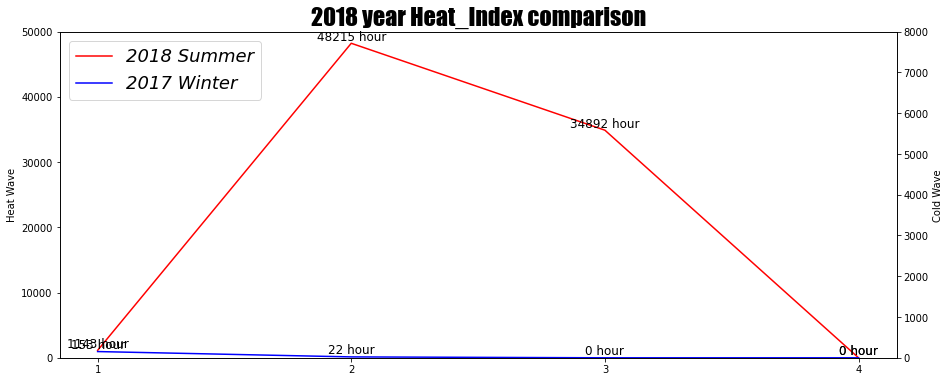

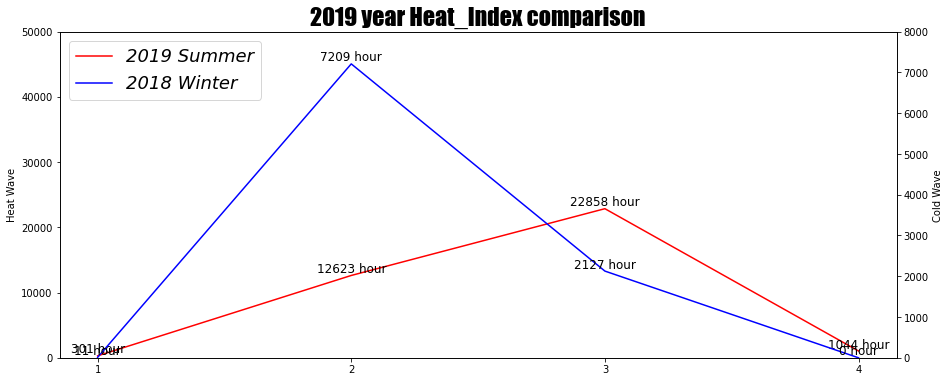

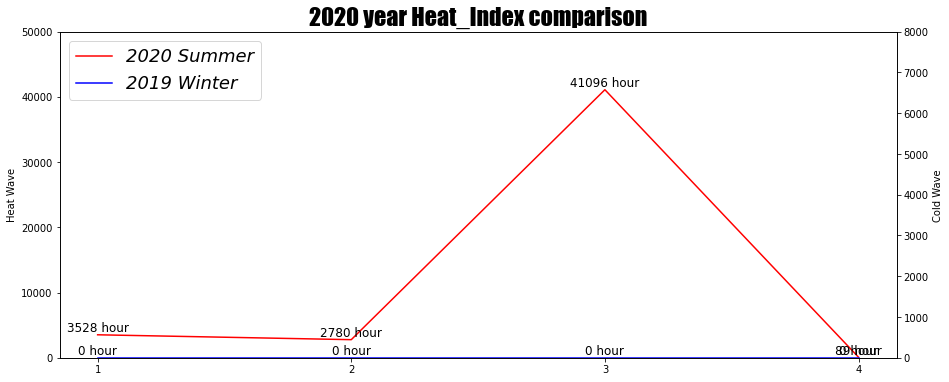

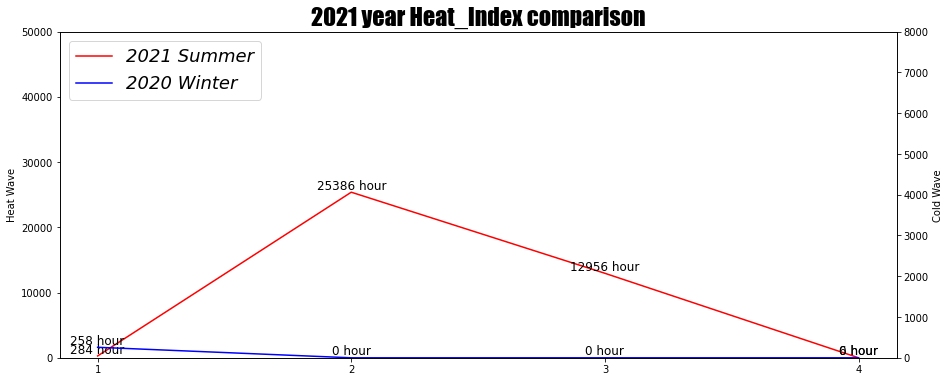

In [27]:
# 2011년 부터 2021년까지를 비교하여 시각화한 것을 저장하는 코드
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high=[]
    for i in range(4):
        summer_high.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low=[]
    for i in range(1):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+12)]))
    for i in range(3):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+1)]))
    
    HI_graph(j,summer_high,winter_low)

그래프 관찰결과
>2012년이나 2014년 그래프를 보면 2018년 그래프에 비하여 대체로 한파인 시간대가 많음.  
>2018년 그래프는 지정한 그래프보다 대체로 폭염인 시간대가 많음.  
>
>따라서 겨울에 한파인 시간대가 적으면 대체로 여름에 폭염인 시간대가 늘어남을 알 수 있음.

### 3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

RAW 데이터의 상관관계 히트맵

<AxesSubplot:>

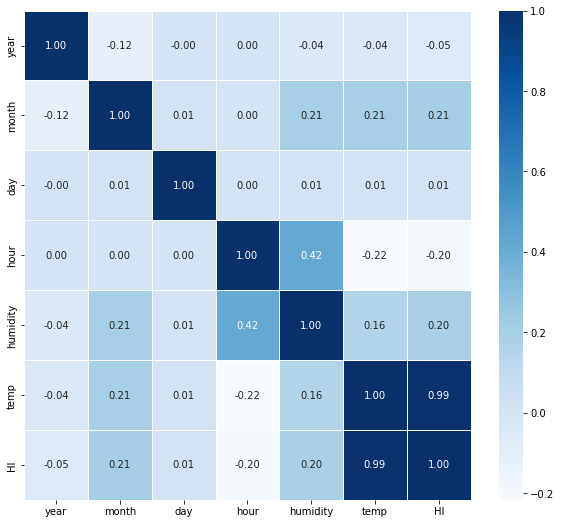

In [30]:
plt.figure(figsize=(10,9))
sns.heatmap(data = temp_pre.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

폭염 혹은 한파인 시간대를 카운팅

In [31]:
# 열지수가 25이상인 시간대를 카운팅
index=list(HI[(HI['HI']>=25)].index)
HIGH=HI.loc[index,:]
HIGH.count()

year      2713597
month     2713597
day       2713597
hour      2713597
HI        2713597
region    2713597
dtype: int64

In [32]:
# 열지수가 -3이하인 시간대를 카운팅
index=list(HI[(HI['HI']<=-3)].index)
LOW=HI.loc[index,:]
LOW.count()

year      600495
month     600495
day       600495
hour      600495
HI        600495
region    600495
dtype: int64

In [33]:
# 연도별로 폭염 시간대를 카운팅
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(4):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+6))+str(len(temp_HIGH[temp_HIGH['month']==(i+6)]))+'시간',end='\n')
    print()

2010년 6월 총 폭염 시간 수: 46910시간
2010년 7월 총 폭염 시간 수: 69538시간
2010년 8월 총 폭염 시간 수: 99143시간
2010년 9월 총 폭염 시간 수: 41093시간

2011년 6월 총 폭염 시간 수: 45249시간
2011년 7월 총 폭염 시간 수: 78336시간
2011년 8월 총 폭염 시간 수: 72693시간
2011년 9월 총 폭염 시간 수: 32153시간

2012년 6월 총 폭염 시간 수: 26689시간
2012년 7월 총 폭염 시간 수: 75353시간
2012년 8월 총 폭염 시간 수: 84745시간
2012년 9월 총 폭염 시간 수: 14729시간

2013년 6월 총 폭염 시간 수: 38608시간
2013년 7월 총 폭염 시간 수: 94365시간
2013년 8월 총 폭염 시간 수: 89365시간
2013년 9월 총 폭염 시간 수: 23698시간

2014년 6월 총 폭염 시간 수: 27132시간
2014년 7월 총 폭염 시간 수: 69167시간
2014년 8월 총 폭염 시간 수: 45736시간
2014년 9월 총 폭염 시간 수: 21602시간

2015년 6월 총 폭염 시간 수: 26674시간
2015년 7월 총 폭염 시간 수: 57188시간
2015년 8월 총 폭염 시간 수: 60065시간
2015년 9월 총 폭염 시간 수: 13183시간

2016년 6월 총 폭염 시간 수: 34969시간
2016년 7월 총 폭염 시간 수: 68570시간
2016년 8월 총 폭염 시간 수: 80038시간
2016년 9월 총 폭염 시간 수: 19598시간

2017년 6월 총 폭염 시간 수: 39578시간
2017년 7월 총 폭염 시간 수: 90051시간
2017년 8월 총 폭염 시간 수: 70466시간
2017년 9월 총 폭염 시간 수: 21867시간

2018년 6월 총 폭염 시간 수: 35206시간
2018년 7월 총 폭염 시간 수: 80653시간
2018년 8월 총 폭염 시간 수: 85484시간
2018년 9월 총 폭

In [34]:
# 연도별로 한파 시간대를 카운팅
for j in range(2010,2022):
    temp_LOW=LOW[LOW['year']==j]
    for i in range(1):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+12))+str(len(temp_LOW[temp_LOW['month']==(i+12)]))+'시간',end='\n')
    for i in range(3):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+1))+str(len(temp_LOW[temp_LOW['month']==(i+1)]))+'시간',end='\n')
    print()

2010년 12월 총 한파 시간 수: 23287시간
2010년 1월 총 한파 시간 수: 0시간
2010년 2월 총 한파 시간 수: 0시간
2010년 3월 총 한파 시간 수: 0시간

2011년 12월 총 한파 시간 수: 15582시간
2011년 1월 총 한파 시간 수: 50453시간
2011년 2월 총 한파 시간 수: 4890시간
2011년 3월 총 한파 시간 수: 563시간

2012년 12월 총 한파 시간 수: 31658시간
2012년 1월 총 한파 시간 수: 23757시간
2012년 2월 총 한파 시간 수: 22975시간
2012년 3월 총 한파 시간 수: 979시간

2013년 12월 총 한파 시간 수: 6419시간
2013년 1월 총 한파 시간 수: 31415시간
2013년 2월 총 한파 시간 수: 11370시간
2013년 3월 총 한파 시간 수: 334시간

2014년 12월 총 한파 시간 수: 16739시간
2014년 1월 총 한파 시간 수: 13328시간
2014년 2월 총 한파 시간 수: 6055시간
2014년 3월 총 한파 시간 수: 196시간

2015년 12월 총 한파 시간 수: 4852시간
2015년 1월 총 한파 시간 수: 12874시간
2015년 2월 총 한파 시간 수: 6073시간
2015년 3월 총 한파 시간 수: 1678시간

2016년 12월 총 한파 시간 수: 4982시간
2016년 1월 총 한파 시간 수: 27772시간
2016년 2월 총 한파 시간 수: 10898시간
2016년 3월 총 한파 시간 수: 407시간

2017년 12월 총 한파 시간 수: 24573시간
2017년 1월 총 한파 시간 수: 23792시간
2017년 2월 총 한파 시간 수: 10189시간
2017년 3월 총 한파 시간 수: 366시간

2018년 12월 총 한파 시간 수: 19111시간
2018년 1월 총 한파 시간 수: 38487시간
2018년 2월 총 한파 시간 수: 25095시간
2018년 3월 총 한파 시간 수: 691시간

2019년 1

폭염과 한파인 시간을 카운팅 한 데이터프레임을 생성

In [38]:
# 월별로 연도별 카운팅값 저장
summer_high1=[]
summer_high2=[]
summer_high3=[]
summer_high4=[]
winter_low1=[]
winter_low2=[]
winter_low3=[]
winter_low4=[]
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high1.append(len(temp_HIGH[temp_HIGH['month']==(6)]))
    summer_high2.append(len(temp_HIGH[temp_HIGH['month']==(7)]))
    summer_high3.append(len(temp_HIGH[temp_HIGH['month']==(8)]))
    summer_high4.append(len(temp_HIGH[temp_HIGH['month']==(9)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low1.append(len(temp_LOW[temp_LOW['month']==(12)]))
    winter_low2.append(len(temp_LOW[temp_LOW['month']==(1)]))
    winter_low3.append(len(temp_LOW[temp_LOW['month']==(2)]))
    winter_low4.append(len(temp_LOW[temp_LOW['month']==(3)]))


summer_high=summer_high1+summer_high2+summer_high3+summer_high4
winter_low=winter_low1+winter_low2+winter_low3+winter_low4
summer_high.sort()
winter_low.sort(reverse=True)
# random.shuffle(summer_high)
a=winter_low[5:35]
random.shuffle(a)
winter_low[5:35]=a
# random.shuffle(winter_low)
print(summer_high)
print(winter_low)

[13183, 14729, 16286, 17730, 18175, 19598, 21602, 21867, 23698, 26674, 26689, 27132, 31523, 31627, 32153, 32224, 33931, 34969, 35206, 38608, 39578, 45249, 45736, 46722, 57188, 59108, 60065, 64194, 68570, 69167, 70466, 72693, 75353, 78171, 78336, 80038, 80346, 80653, 84745, 85484, 89365, 90051, 94365, 98463]
[50453, 38487, 31658, 31415, 27772, 23287, 23757, 979, 6073, 25095, 13328, 3001, 888, 19111, 8915, 10189, 22975, 691, 6055, 10898, 6419, 12874, 4852, 16739, 17009, 24573, 15582, 1678, 563, 11370, 23792, 5089, 4816, 4890, 4982, 407, 366, 334, 196, 40, 8, 0, 0, 0]


In [39]:
# 카운팅한 값을 합하여 데이터프레임을 생성
season_HI=pd.DataFrame({'HI_summer':summer_high,
                        'HI_winter':winter_low})
season_HI.head(10)

HI_summer  HI_winter
0      13183      50453
1      14729      38487
2      16286      31658
3      17730      31415
4      18175      27772
5      19598      23287
6      21602      23757
7      21867        979
8      23698       6073
9      26674      25095

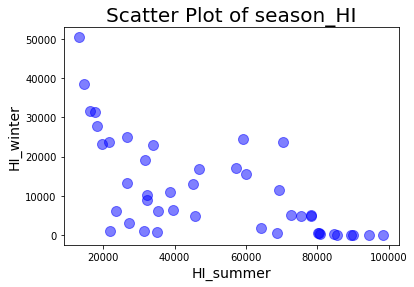

In [40]:
# 생성한 데이터프레임으로 산점도 표현
plt.plot('HI_summer',  # x
         'HI_winter',  # y
         data=season_HI,
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot of season_HI', fontsize=20)
plt.xlabel('HI_summer', fontsize=14)
plt.ylabel('HI_winter', fontsize=14)

plt.show()

<AxesSubplot:>

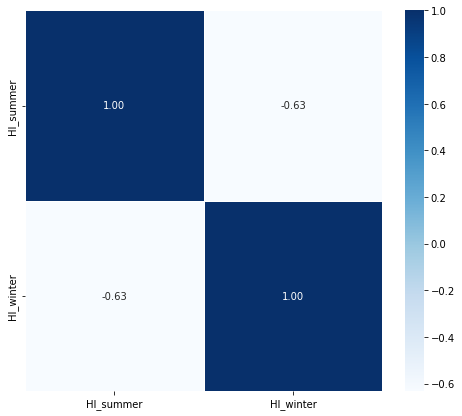

In [41]:
# 생성한 데이터프레임으로 상관계수 히트맵을 그림
plt.figure(figsize=(8,7))
sns.heatmap(data=season_HI.corr(),annot=True,fmt='.2f',linewidths=.5,cmap='Blues')

### 4. 결론
* 겨울에 한파인 시간과 여름에 폭염인 시간은 대체로 반비례하는 관계

## <hr>

## 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
>###### made by Yamadora HW

#### Period
- 2022.05.0? ~ 2022.05.!?

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 데이터 확인

2. 겨울과 여름의 데이터 비교

3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

4. 결론
</h6></details></h4>

### 0. 

In [ ]:
# 모듈 선언
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

In [ ]:
df_dens = pd.read_csv('./output/Daegu_density.csv', index_col=0)

df_dens

## <hr>

## 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

## <hr>

## 4. 바람이 북서풍일때 열지수가 높다.
>###### made by KMJ

#### Period
- 2022.05.19 ~ 2022.05.20

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 시각화 : 북서풍과 남동풍으로 범위를 제한하여 전체 열지수를 시각화

2. 시각화 : 6~9월로 범위를 제한하여 전체 열지수를 시각화

3. 시각화 : 열지수 구성비율로 플롯

4. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [16]:
import pandas as pd
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes

In [2]:
# 복사본으로 작업
EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

In [3]:
# 효목1동 기준 (대구지방기상청 소재지)
condregion = EDAset['region'] == '효목1동'
dfHM = EDAset[condregion]

In [4]:
# 2010년 6월~ 12월 6일까지의 풍향데이터가 없는 것을 확인
wd = dfHM[dfHM['wind_direction'].isna()]
wd.tail()

year  month  day  hour            datetime  temp  rainfall  \
2093474  2010     12    6     2 2010-12-06 02:00:00   7.3       0.0   
2093475  2010     12    6     3 2010-12-06 03:00:00   9.3       0.0   
2093476  2010     12    6     4 2010-12-06 04:00:00  11.7       0.0   
2093477  2010     12    6     5 2010-12-06 05:00:00  12.6       0.0   
2093478  2010     12    6     6 2010-12-06 06:00:00  12.8       0.0   

         lightning  humidity  wind_speed  wind_direction  condition region  \
2093474         -1      66.0         NaN             NaN          4   효목1동   
2093475         -1      57.0         NaN             NaN          2   효목1동   
2093476         -1      52.0         NaN             NaN          3   효목1동   
2093477         -1      48.0         NaN             NaN          3   효목1동   
2093478         -1      38.0         NaN             NaN          3   효목1동   

                HI        DI  
2093474   5.808889  47.54482  
2093475   7.773889  50.92999  
2093476  10.283333  54.36416  
2093477  11.168889  55.62952  
2093478  11.127778  56.04936

In [5]:
# 결측치가 존재하는 데이터를 삭제
noWD = wd.index
pre_wdset = dfHM.drop(index=noWD).reset_index()
pre_wdset.head()

index  year  month  day  hour            datetime  temp  rainfall  \
0  2093479  2010     12    6     7 2010-12-06 07:00:00  11.7       0.0   
1  2093480  2010     12    6     8 2010-12-06 08:00:00  10.0       0.0   
2  2093481  2010     12    6     9 2010-12-06 09:00:00   9.0       0.0   
3  2093482  2010     12    6    10 2010-12-06 10:00:00   7.2       0.0   
4  2093483  2010     12    6    11 2010-12-06 11:00:00   5.1       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0         -1      31.0         3.7           319.0          3   효목1동   
1         -1      35.0         3.1           306.0          3   효목1동   
2         -1      38.0         3.1           335.0          3   효목1동   
3         -1      36.0         3.5           320.0          4   효목1동   
4         -1      45.0         2.2           300.0          2   효목1동   

         HI        DI  
0  9.735000  54.93473  
1  7.969444  52.86000  
2  6.947778  51.54180  
3  4.915556  49.55008  
4  2.840556  46.26805

In [7]:
# 북서풍의 기준을 서북서 (292.5°) ~ 북북서 (337.5°)로 설정
cond3 = (pre_wdset['wind_direction'] <= 337.5) & (pre_wdset['wind_direction'] >= 292.5)
NWset = pre_wdset.loc[cond3,:]
NWset.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
0  2093479  2010     12    6     7 2010-12-06 07:00:00  11.7       0.0   
1  2093480  2010     12    6     8 2010-12-06 08:00:00  10.0       0.0   
2  2093481  2010     12    6     9 2010-12-06 09:00:00   9.0       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0         -1      31.0         3.7           319.0          3   효목1동   
1         -1      35.0         3.1           306.0          3   효목1동   
2         -1      38.0         3.1           335.0          3   효목1동   

         HI        DI  
0  9.735000  54.93473  
1  7.969444  52.86000  
2  6.947778  51.54180

In [8]:
# 폭염에 영향을 끼치는 6~9월로 범위 제한
cond4 = (NWset['month'] <= 9) & (NWset['month'] >= 6)
NW = NWset.loc[cond4,:]

In [9]:
# 비교군으로 남동풍 선택
# 남남동 (157.5) ~ 동남동 (112.5)
cond5 = (pre_wdset['wind_direction'] <= 157.5) & (pre_wdset['wind_direction'] >= 112.5)
SEset = pre_wdset.loc[cond5,:]

# 폭염에 영향을 끼치는 6~9월로 범위 제한
cond6 = (SEset['month'] <= 9) & (SEset['month'] >= 6)
SE = SEset.loc[cond6,:]
SE.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
4250  2097729  2011      6    1     9 2011-06-01 09:00:00  22.8       0.0   
4256  2097735  2011      6    1    15 2011-06-01 15:00:00  16.1       0.0   
4260  2097739  2011      6    1    19 2011-06-01 19:00:00  15.9       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4250          0      65.0         0.6           129.0          4   효목1동   
4256          0      95.0         1.7           121.0          3   효목1동   
4260          0      97.0         2.1           115.0          3   효목1동   

             HI        DI  
4250  22.832778  70.14480  
4256  16.246111  60.89805  
4260  16.078333  60.57677

### 1. 시각화 : 북서풍과 남동풍으로 범위를 제한하여 전체 열지수를 시각화

In [11]:
windset = pd.concat([NW, SE], ignore_index=True)
windset.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
0  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   
1  2097724  2011      6    1     4 2011-06-01 04:00:00  22.2       0.0   
2  2097773  2011      6    3     5 2011-06-03 05:00:00  27.9       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0          0      67.0         2.2           317.0          4   효목1동   
1          0      64.0         2.4           327.0          4   효목1동   
2          0      28.0         1.8           308.0          1   효목1동   

          HI        DI  
0  20.245000  66.77432  
1  22.146667  69.19592  
2  26.937085  72.62888

In [13]:
cmap = cm.autumn
cmap_reversed = cm.get_cmap('autumn_r')

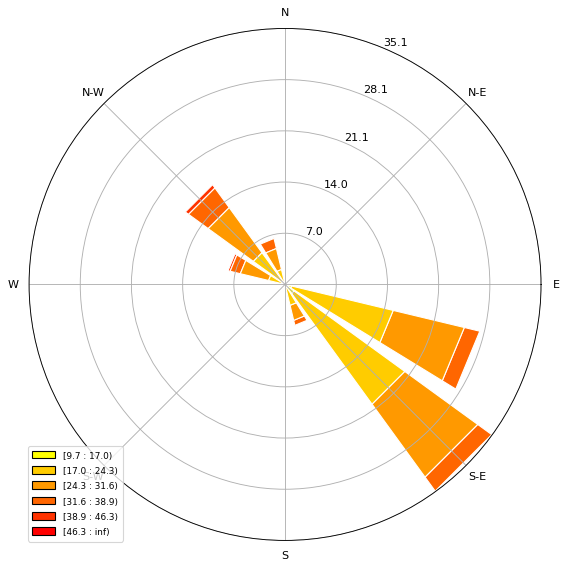

In [17]:
# 시각화
ax = WindroseAxes.from_ax()
ax.bar(windset.wind_direction, windset.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
ax.set_legend()

- 여름계절풍인 남동풍의 빈도가 현저하게 많다.
- 열지수가 높은 바람은 주로 북서풍에서 비롯된다.

### 2. 시각화 : 6~9월로 범위를 제한하여 전체 열지수를 시각화

In [18]:
# 폭염에 영향을 끼치는 6~9월로 범위 제한
mask1 = (pre_wdset['month'] <= 9) & (pre_wdset['month'] >= 6)
junsep = pre_wdset.loc[mask1,:]
junsep.head()

index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   
4244  2097723  2011      6    1     3 2011-06-01 03:00:00  20.6       0.0   
4245  2097724  2011      6    1     4 2011-06-01 04:00:00  22.2       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   
4244          0      67.0         0.4             0.0          4   효목1동   
4245          0      64.0         2.4           327.0          4   효목1동   

             HI        DI  
4241  18.615556  64.63264  
4242  20.161111  66.68496  
4243  20.245000  66.77432  
4244  20.465000  67.06898  
4245  22.146667  69.19592

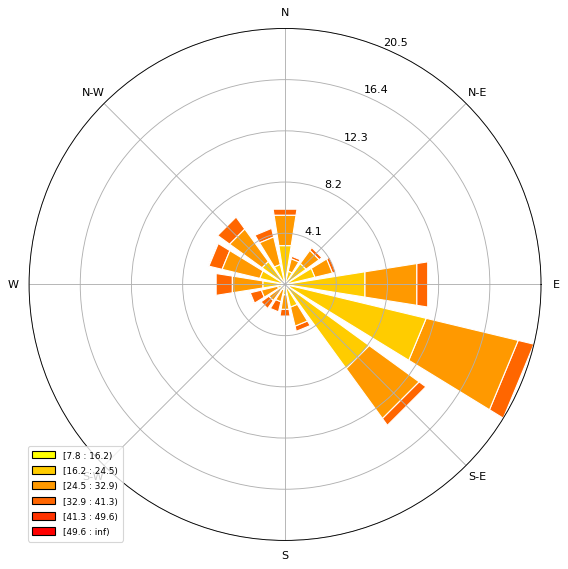

In [19]:
# 시각화
axset = WindroseAxes.from_ax()
axset.bar(junsep.wind_direction, junsep.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
axset.set_legend()

- 차이가 잘 드러나지 않는다.

### 3. 시각화 : 열지수 구성비율로 플롯

In [20]:
junsep[['wind_direction','HI']].describe()

wind_direction            HI
count    32208.000000  32208.000000
mean       164.172783     25.694933
std         97.461339      5.701477
min         -1.000000      7.818889
25%        100.000000     21.615556
50%        127.000000     24.902222
75%        262.000000     29.262852
max        360.000000     49.626872

In [21]:
### 4분위로 범위를 나눈 후 인덱스를 카운트하여 비율 구하기

# 열지수 구간 나누기
bins = list(range(7,50,4))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['HI_bin'] = pd.cut(junsep['HI'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_3036\3015767669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junsep['HI_bin'] = pd.cut(junsep['HI'], bins, right=False, labels=bins_labels[:])


index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   

             HI        DI HI_bin  
4241  18.615556  64.63264   19미만  
4242  20.161111  66.68496   23미만  
4243  20.245000  66.77432   23미만

In [22]:
# 바람방향 구간 나누기
bins = list(range(0,360,10))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_3036\1479703230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])


index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   

             HI        DI HI_bin wd_bin  
4241  18.615556  64.63264   19미만   90미만  
4242  20.161111  66.68496   23미만   70미만  
4243  20.245000  66.77432   23미만  320미만

In [24]:
# 파일로 저장
junsep.to_csv('./output/junsep.csv', encoding='cp949')

![](./img/WDHI.png)
- 가로축은 북쪽에서부터 시계방향으로 풍향을 측정한 것이며 열지수의 범위에 해당하는 값들의 비율을 시각화 한 그래프.
- 서쪽(210도~300도)에서 열지수가 가장 높았던 바람의 비율이 증가함을 알 수 있다.
- 즉, 대구의 서쪽에서 불어오는 바람일수록 열지수가 높다는 가설은 타당하다.

### 4. 결론
대구 서쪽에서 비롯된 바람은 열지수가 높은 것으로 나타남

## <hr>

## 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

## <hr>

## 6. 고도에 따른 습도와 기온의 영향
- made by 

## <hr>

## 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

## <hr>

## 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
>###### made by KMJ

#### Period
- 2022.05.09 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

2. 매년 일일 평균 강수량 + 열지수

3. 습도_기온 상관관계 그래프

4. 년도별 매달 평균 습도 + 평균 기온

5. 모든 날의 평균 강수량 + 평균 기온

6. 결론
</h6></details></h4>


### 0. 필요한 패키지 및 데이터 불러오기

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import platform

In [94]:
# 복사본으로 작업
df_final = pd.read_csv('./output/daegu_final.csv')
EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

In [56]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

### 1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

In [57]:
# 2018년, 효목1동 기준 (대구지방기상청 소재지)
condyear = EDAset['year'] == 2018
condregion = EDAset['region'] == '효목1동'
df2011_HM = EDAset[condyear & condregion]
rainfall = df2011_HM.copy()

In [58]:
# 비 온 날 카운트
count_rain = []
max_HI = []
max_hum = []
month = []

for i in range(1,13) :
    rain_temp = rainfall[rainfall['month'] == i]
    # 비 온 날 카운트 리스트
    cond = rain_temp[rain_temp['rainfall'] > 0.0]
    count_rain.append(cond.count())
    # 최고기온 리스트
    max_HI.append(round(rain_temp['HI'].max(),2))
    # 최고습도 리스트
    max_hum.append(rain_temp['humidity'].mean())
    # 데이터 있는 달 리스트
    month.append(i)

# 출력
counts_rain = [i[0] for i in count_rain]

print("측정달", month)
print("우천 발생수 (시간당)", counts_rain)
print("최고 열지수", max_HI)
print("최고 습도", max_hum)

측정달 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
우천 발생수 (시간당) [48, 23, 102, 80, 93, 84, 61, 66, 57, 40, 16, 23]
최고 열지수 [11.34, 12.83, 24.69, 29.01, 33.04, 34.63, 41.33, 40.7, 29.67, 24.82, 19.27, 15.14]
최고 습도 [51.51075268817204, 43.017857142857146, 62.89650537634409, 57.10138888888889, 66.18279569892474, 64.0513888888889, 66.24193548387096, 67.71370967741936, 70.33888888888889, 63.211021505376344, 62.458333333333336, 50.211021505376344]


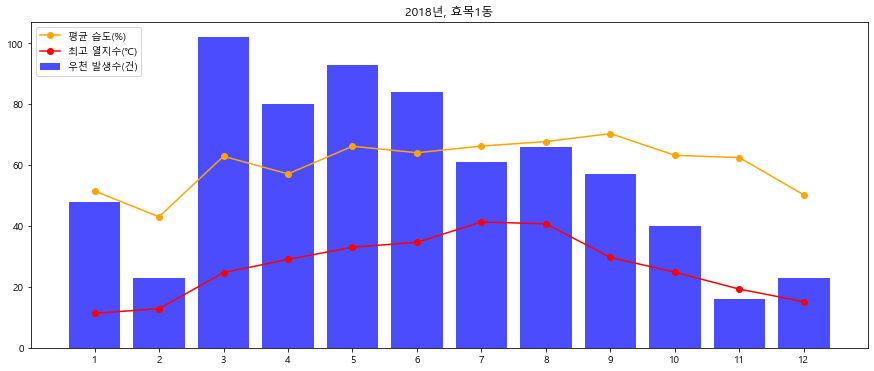

In [59]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2018년, 효목1동')

plt.plot(month, max_hum, color='orange', marker = 'o', label='평균 습도(%)', linestyle='-')
plt.bar(month, counts_rain, color='blue', label='우천 발생수(건)', alpha=0.7)
plt.plot(month, max_HI, color='red', marker = 'o', label='최고 열지수(℃)', linestyle='-')

plt.legend(loc=2)
plt.xticks(month)
plt.show()

<전체 년도 결과>
* 최고 열지수는 7, 8월경에 최고치를 기록
* 2018년 3월경 강수일이 급증하자 열지수의 증가폭 역시 다른 해에 비해 높음
* 열지수가 최고를 기록한 달 혹은 그 다음 달에 우천일 증가하는 경향
* 열지수가 최고를 기록한 달의 평균습도는 큰 변화가 없음
-> 오히려 우천 발생수에 의존

C:\Users\popcorn\AppData\Local\Temp\ipykernel_11244\311189145.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

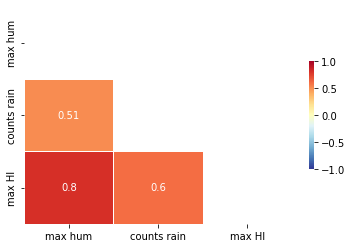

In [51]:
# 최고습도, 비가 온 날의 수, 최고HI 에 대한 값들을 새로운 DF에 저장
df_sum = pd.DataFrame(data = list(zip(max_hum, counts_rain, max_HI)), columns = ['max hum', 'counts rain', 'max HI'])

df_corr = df_sum.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 대각선 기준으로 아래쪽만 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

* 장마기간 외 비가 많이 온 2014년, 가뭄이 심각했던 2016년, 적은 강수일에 비해 강수량이 컸던 2018년, 태풍의 영향을 많이 받았던 2019년을 대상으로 히트맵을 그린 결과
* 최대 열지수와 강수일은 양의 상관관계를 크게 보임
* 2016년 히트맵도 참고하면 열지수와 습도는 관계가 모순되므로 두 변수는 관계가 없음

In [52]:
# 전체 데이터, 연도별 우천일 수
rainset = EDAset.copy()
RS = rainset.groupby('year')['rainfall'].nunique().reset_index()
RS

year  rainfall
0   2010        51
1   2011        42
2   2012        43
3   2013        48
4   2014        39
5   2015        22
6   2016       180
7   2017       161
8   2018       157
9   2019        52
10  2020       127
11  2021       116
12  2022        40

In [53]:
# 연도별 최대 열지수
setmax_HI = []
year = []

for i in range(2010,2023) :
    HI_temp = EDAset[EDAset['year'] == i]
    # 평균 최대 열지수 리스트
    setmax_HI.append(round(HI_temp['HI'].mean(),2))
    # 데이터 있는 연도 리스트
    year.append(i)

# 출력
print("측정연도", year)
print("평균 최대 열지수", setmax_HI)

측정연도 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
평균 최대 열지수 [18.68, 13.75, 13.3, 14.34, 14.08, 14.02, 14.3, 14.02, 14.1, 14.59, 14.39, 14.53, 6.37]


<AxesSubplot:ylabel='열지수 (℃)'>

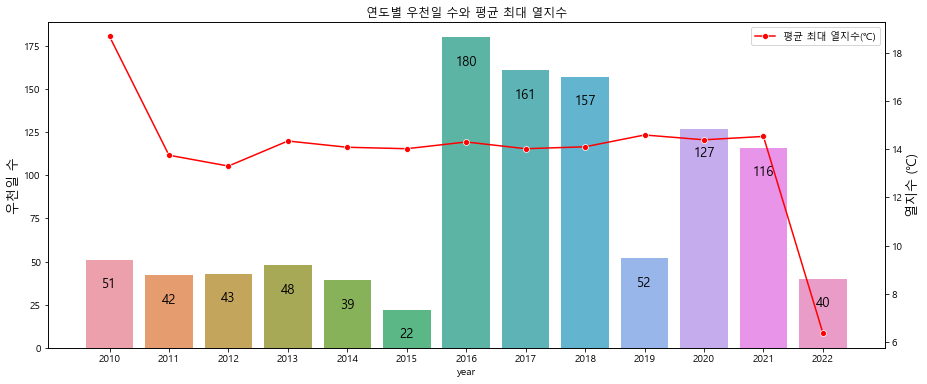

In [60]:
# 연도별 최고 HI에 대한 DF생성
maxHI = pd.DataFrame(data = list(zip(setmax_HI, year)), columns = ['max HI', 'year'])

ax1 = sns.set_style(style=None, rc=None)

# 우천 일 수 막대그래프
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("연도별 우천일 수와 평균 최대 열지수")
sns.barplot(
    data = RS,
    x = "year",
    y = "rainfall",
    alpha=0.9,
    ax=ax1)

# 막대그래프에 값 표시
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 20),
    ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
    textcoords='offset points')
ax1.set_ylabel("우천일 수", fontsize=13)

# HI 선그래프
ax2 = ax1.twinx()  # 축 일치
ax2.set_ylabel("열지수 (℃)", fontsize=13)
sns.lineplot(
    data = maxHI['max HI'],
    marker='o',
    sort = False,
    color='red',
    label='평균 최대 열지수(℃)',
    ax=ax2)

- 데이터가 충분하지 않은 2010년과 2022년은 제외함.
- 평균 최대열지수는 대체로 비슷한 경향을 보이나 그에 반해 우천일 수는 해마다 다양하며 2016~2018년이 이례적으로 급증했다.

<관련 기사>
- (대한뉴스) 2015년은 장마기간에 강수량이 적었다.
- (동아일보) 2016년은 전체적으로 가뭄이 심각한 해다.
- (중앙일보) 2019년은 기상관측 이래 태풍의 영향을 가장 많이 받은 해로, 폭염일수는 적으나 월 평균 기온이 높았다. 또한 겨울에는 눈이 적었다.

### 2. 매년 일일 평균 강수량 + 열지수

In [61]:
# 효목1동 기준
HMdong = EDAset[condregion]
rainheat = HMdong.copy()

In [62]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = rainheat[rainheat['year'] == 2010].index
cond2 = rainheat[rainheat['year'] == 2022].index

rainheat.drop(cond1, inplace=True)
rainheat.drop(cond2, inplace=True)

rainheat = rainheat.reset_index()

In [65]:
# 필요한 컬럼만 선택
RH = rainheat[['datetime','year','month','day','rainfall','HI']]
RH

datetime  year  month  day  rainfall   HI
0      2011-01-01 00:00:00  2011      1    1       0.0 -5.7
1      2011-01-01 01:00:00  2011      1    1       0.0 -4.6
2      2011-01-01 02:00:00  2011      1    1       0.0 -2.5
3      2011-01-01 03:00:00  2011      1    1       0.0 -0.8
4      2011-01-01 04:00:00  2011      1    1       0.0  0.1
...                    ...   ...    ...  ...       ...  ...
96427  2021-12-31 19:00:00  2021     12   31       0.0 -5.9
96428  2021-12-31 20:00:00  2021     12   31       0.0 -8.4
96429  2021-12-31 21:00:00  2021     12   31       0.0 -8.3
96430  2021-12-31 22:00:00  2021     12   31       0.0 -7.7
96431  2021-12-31 23:00:00  2021     12   31       0.0 -6.3

[96432 rows x 6 columns]

In [66]:
# 일별 평균 강수량과 열지수를 계산한 데이터프레임을 생성
dfRH = RH.groupby(['year','month','day']).mean()
dfRH

rainfall        HI
year month day                    
2011 1     1         0.0 -2.025000
           2         0.0 -0.602755
           3         0.0 -0.654167
           4         0.0 -0.820833
           5         0.0 -0.420833
...                  ...       ...
2021 12    27        0.0  0.016667
           28        0.0  1.455093
           29        0.0  3.362431
           30        0.0 -0.725000
           31        0.0 -3.141667

[4018 rows x 2 columns]

In [67]:
dfRH.describe()

rainfall           HI
count  4018.000000  4018.000000
mean      0.127242    14.226217
std       0.453603    10.479638
min       0.000000   -10.779167
25%       0.000000     4.702980
50%       0.000000    14.405035
75%       0.003125    22.843785
max       8.333333    39.222891

c:\git_project\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


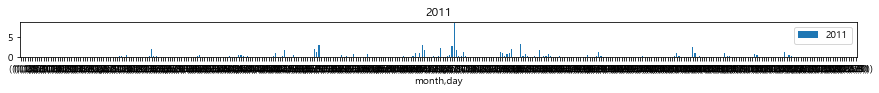

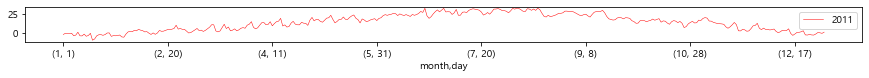

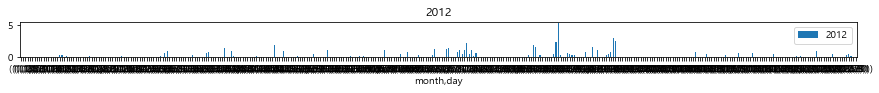

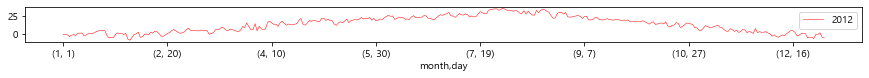

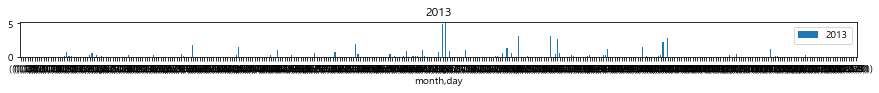

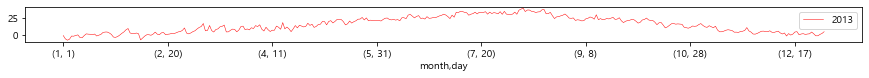

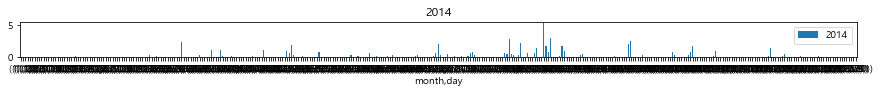

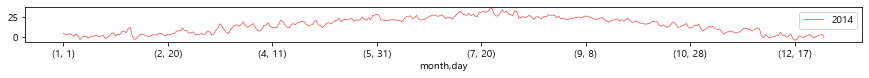

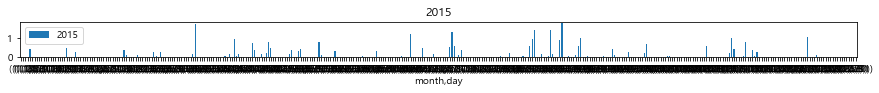

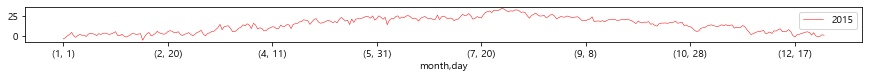

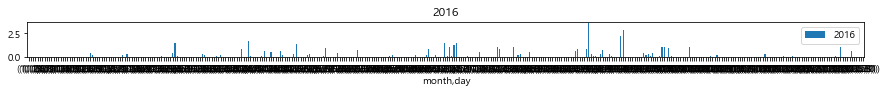

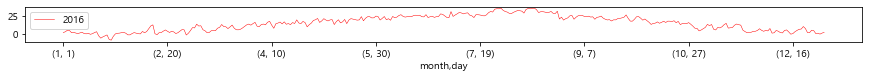

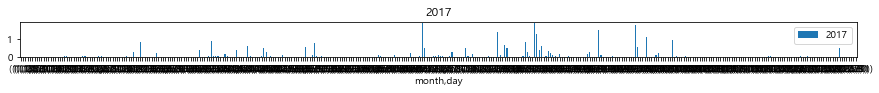

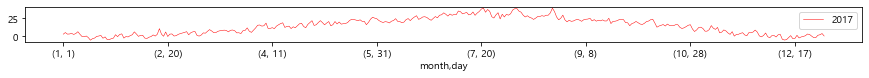

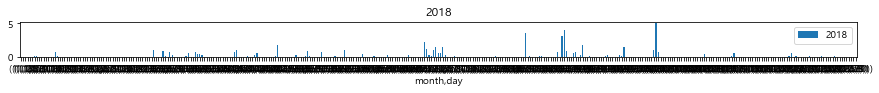

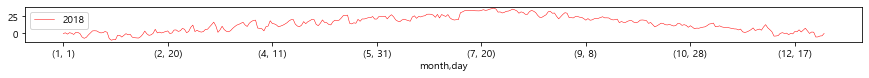

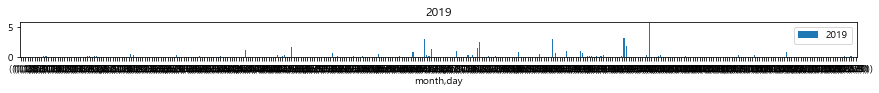

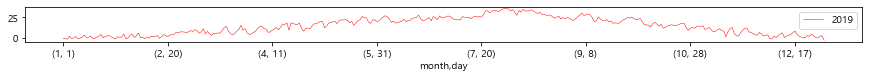

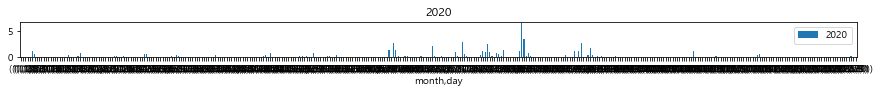

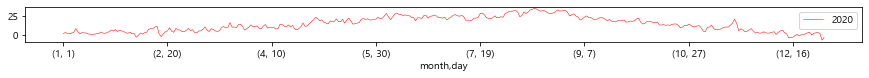

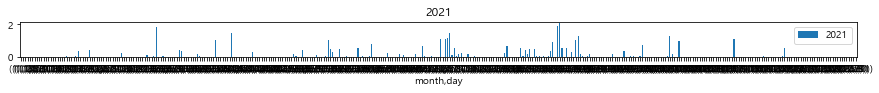

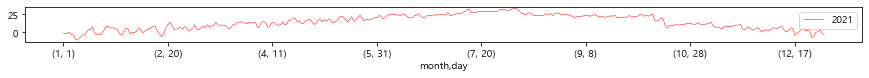

In [68]:
# 연도별 일일 평균 강수량과 평균 열지수
for i in range(2011,2022):
    temp_mean = dfRH.query('year == {0}'.format(i))

    x = temp_mean.query('day >= 1')
    y = temp_mean['rainfall']
    z = temp_mean['HI']

    # 강수량 막대 그래프
    temp_mean.unstack(level=0)['rainfall'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )

    # 열지수 꺾은선 그래프
    temp_mean.unstack(level=0)['HI'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )

- 매년 강수량과 열지수가 유사한 증감패턴을 보인다
- 열지수와 강수량은 연관이 있다

<예시>
- 2018년, 열지수가 급증하여 유지되고, 여름보다 가을에 우천일이 치우쳐 있으며 강수량이 컸다
-- 장마일과 강수일수가 적은 것에 비해 합계 강수량이 다른 해와 비교하여 평균이었으므로 강수일이 적으나 올 때마다 비가 꽤 내렸다는 분석결과와 맞음
- 2021년, 가을까지 열지수가 높았고, 여름부터 가을까지 강수량은 적었지만 거의 매일 비가 왔었다
-- 2021년은 지각장마가 왔었고, 장마철 외에도 비가 많이 왔다는 기록이 있다

### 3. 습도+기온 상관관계 그래프

In [75]:
# 효목1동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [76]:
# 사용할 데이터만 선택
humheat = humheat[['humidity','temp','HI','datetime']]

corr = humheat.corr()
print(corr)

          humidity      temp        HI
humidity  1.000000  0.138106  0.172603
temp      0.138106  1.000000  0.993401
HI        0.172603  0.993401  1.000000


C:\Users\popcorn\AppData\Local\Temp\ipykernel_11244\3424830007.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

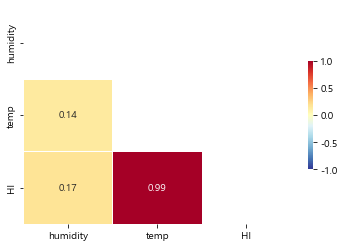

In [77]:
df_corr = humheat.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

# 상관관계 그래프를 대각선 기준 아래쪽만 표시
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

- 열지수는 습도보다 기온과 상관성이 높다.
- 습도와 기온은 관련이 적다.
- 습도가 우천발생의 지표가 되지 못하므로 열지수에 영향을 주는 요인으로 파악하기 어렵다.

In [79]:
humetemp = humheat[['humidity','temp','HI','datetime']]

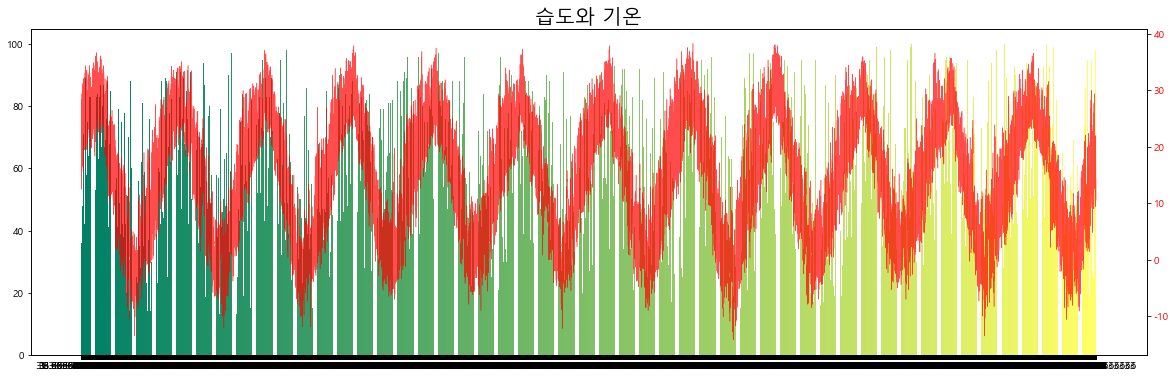

In [81]:
fig = plt.figure(figsize=(20,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(humetemp["datetime"])) ## 바 차트 색상
xtick_label_position = list(range(len(humetemp["datetime"]))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(humetemp["humidity"]) ## x축 눈금 라벨
ax1.bar(xtick_label_position, humetemp["humidity"], color=colors) ## 바차트 출력

color = 'red'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, humetemp["temp"], color=color, linestyle='-', linewidth = 0.5, alpha = 0.7) ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

plt.title('습도와 기온', fontsize=20)
plt.show()

- 전체적으로 습도의 증가 주기와 기온의 증가 주기가 일치한다.

### 4. 년도별 매달 평균 습도 + 평균 기온

In [82]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [83]:
# 데이터가 적은 2010년, 2022년은 제외
cond1 = humheat[humheat['year'] == 2010].index
cond2 = humheat[humheat['year'] == 2022].index

humheat.drop(cond1, inplace=True)
humheat.drop(cond2, inplace=True)

# 인덱스 번호 초기화
humheat = humheat.reset_index()

# 필요한 컬럼만 선택
HH = humheat[['datetime','year','month','day','humidity','temp']]

dfHH = HH.groupby(['year','month']).mean()
dfHH

day   humidity       temp
year month                            
2011 1      16.0  39.803763  -2.857661
     2      14.5  54.106399   3.730357
     3      16.0  37.360215   6.442473
     4      15.5  49.460417  13.268750
     5      16.0  60.193548  18.187500
...          ...        ...        ...
2021 8      16.0  73.571237  25.614247
     9      15.5  75.691667  22.019167
     10     16.0  72.375000  16.386694
     11     15.5  62.876389   9.431528
     12     16.0  56.891129   2.997581

[132 rows x 3 columns]

c:\git_project\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


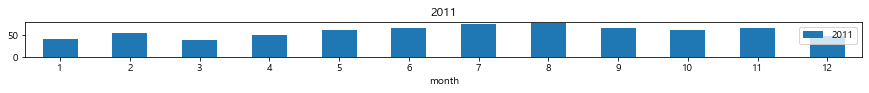

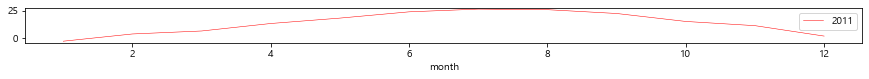

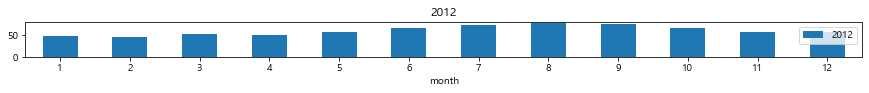

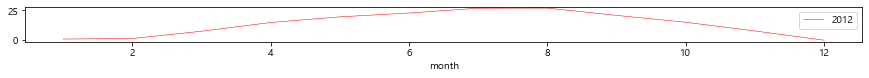

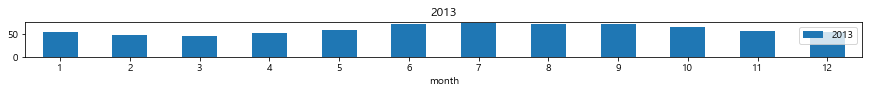

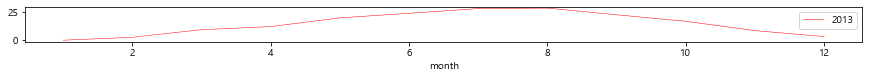

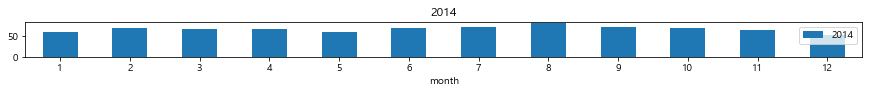

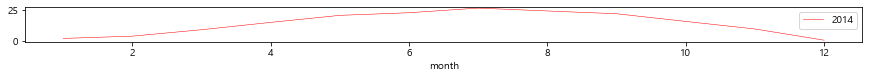

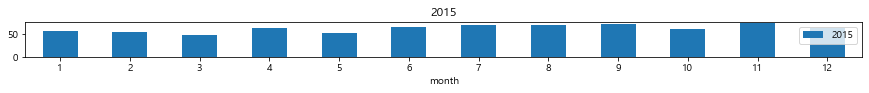

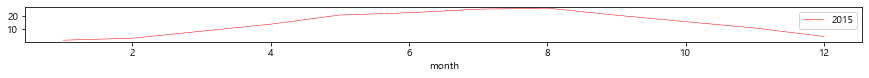

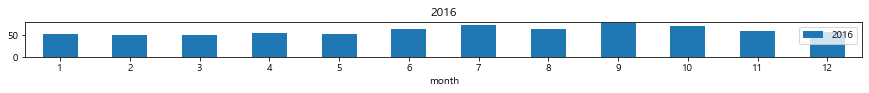

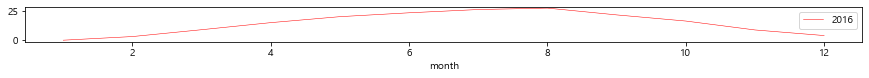

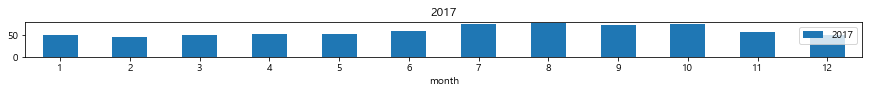

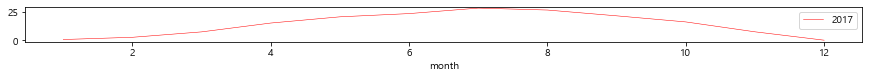

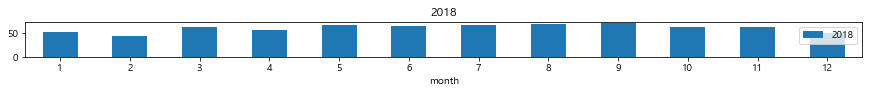

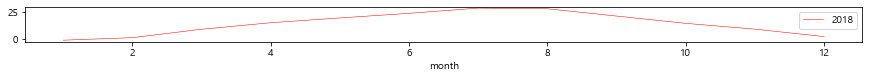

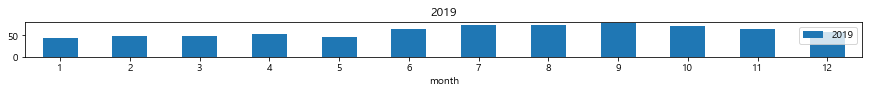

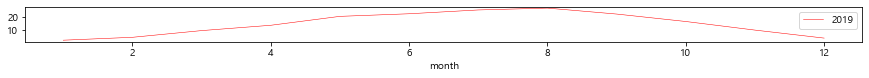

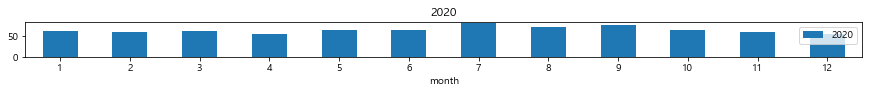

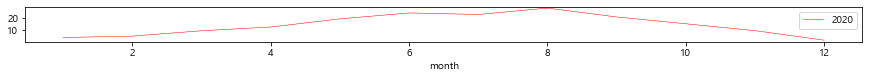

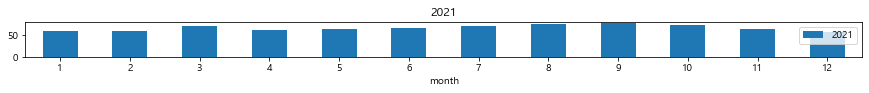

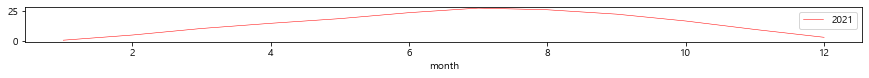

In [84]:
# 연도별 월 평균 습도와 평균 기온

for i in range(2011,2022):
    temp_mean = dfHH.query('year == {0}'.format(i))

    x = temp_mean.query('month >= 1')
    y = temp_mean['humidity']
    z = temp_mean['temp']

    # 습도 막대 그래프
    fig = temp_mean.unstack(level=0)['humidity'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
    )

    # 기온 꺽은선 그래프
    fig = temp_mean.unstack(level=0)['temp'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
    )

- 기온이 1개월 가량 우선적으로 증가한 후 습도가 증가하는 경향이 있다.

### 5. 모든 달의 평균 강수량 + 평균 기온

In [97]:
# 평균계산
temp = []
humd = []
month = []

for i in range(1,13) :
    humd_high = EDAset[EDAset['datetime'].dt.month == i]

    #최고기온 평균
    temp.append(round(humd_high['temp'].mean(),1))

    #강수량 평균
    humd.append(round(humd_high['humidity'].mean(),1))

    month.append(i)

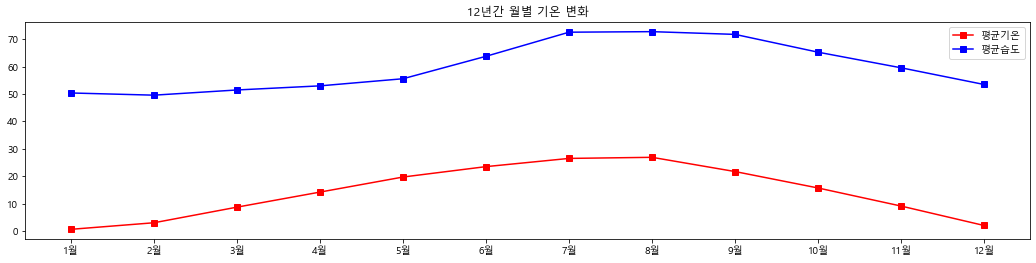

In [98]:
# 그래프 그리기
x_axis = EDAset['datetime'].dt.month.unique()

labels = []
for i in range(1,13):
    labels.append(str(i)+'월')

plt. figure(figsize=(18,4))

plt.title('12년간 월별 기온 변화')
plt.plot(month, temp, color='red', marker = 's', label='평균기온', linestyle='-')
plt.plot(month, humd, color='blue', marker = 's', label='평균습도', linestyle='-')
plt.legend(loc='best')
plt.xticks(month,labels)
plt.show()

- 대체로 평균 강수량의 증가와 평균 기온의 증가 추세가 일치한다.

### 6. 결론
- 열지수가 높으면 비가 올 확률이 매우 높은 것으로 나타남 (가설의 상관관계를 확인)

## <hr>

## 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
>###### made by KMJ

#### Period
- 2022.05.17 ~ 2022.05.20

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 전처리

2. 필요한 컬럼만 가져오기 - datetime, year, month, day, hour, temp

3. 미세먼지 데이터와 조인하기

4. 그래프 그리기

5. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform

In [2]:
# 기상 데이터 불러오기
df_final = pd.read_csv('./output/daegu_final.csv')

EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

# 미세먼지 데이터 불러오기
orig = pd.read_csv('./dataset/airpollution_daegu.csv', encoding='cp949')
orig

지점 지점명                일시  1시간평균 미세먼지농도(㎍/㎥)
0      143  대구   2010-06-01 0:00                9.5
1      143  대구   2010-06-01 1:00               12.0
2      143  대구   2010-06-01 2:00                9.0
3      143  대구   2010-06-01 3:00                8.0
4      143  대구   2010-06-01 4:00                6.0
...    ...  ..               ...                ...
99569  143  대구  2022-04-30 19:00               23.0
99570  143  대구  2022-04-30 20:00               18.0
99571  143  대구  2022-04-30 21:00               18.0
99572  143  대구  2022-04-30 22:00               15.0
99573  143  대구  2022-04-30 23:00               16.0

[99574 rows x 4 columns]

In [28]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

### 1. 전처리

In [3]:
# 분석용 데이터셋으로 정리
df_airpoll = orig.iloc[:,2:]
df_airpoll.columns = ['date','concentration']
df_airpoll

date  concentration
0       2010-06-01 0:00            9.5
1       2010-06-01 1:00           12.0
2       2010-06-01 2:00            9.0
3       2010-06-01 3:00            8.0
4       2010-06-01 4:00            6.0
...                 ...            ...
99569  2022-04-30 19:00           23.0
99570  2022-04-30 20:00           18.0
99571  2022-04-30 21:00           18.0
99572  2022-04-30 22:00           15.0
99573  2022-04-30 23:00           16.0

[99574 rows x 2 columns]

In [4]:
# date 컬럼의 자료형을 알맞게 변환
df_airpoll['date'] = df_airpoll['date'].astype(str)
df_airpoll['date'] = pd.to_datetime(df_airpoll['date'])

df_airpoll

date  concentration
0     2010-06-01 00:00:00            9.5
1     2010-06-01 01:00:00           12.0
2     2010-06-01 02:00:00            9.0
3     2010-06-01 03:00:00            8.0
4     2010-06-01 04:00:00            6.0
...                   ...            ...
99569 2022-04-30 19:00:00           23.0
99570 2022-04-30 20:00:00           18.0
99571 2022-04-30 21:00:00           18.0
99572 2022-04-30 22:00:00           15.0
99573 2022-04-30 23:00:00           16.0

[99574 rows x 2 columns]

In [5]:
# date 컬럼을 각 요소로 나누기
df_airpoll['year'] = df_airpoll['date'].dt.year
df_airpoll[ 'month'] = df_airpoll['date'].dt.month
df_airpoll['day'] = df_airpoll['date'].dt.day
df_airpoll['hour'] = df_airpoll['date'].dt.hour

df_airpoll

date  concentration  year  month  day  hour
0     2010-06-01 00:00:00            9.5  2010      6    1     0
1     2010-06-01 01:00:00           12.0  2010      6    1     1
2     2010-06-01 02:00:00            9.0  2010      6    1     2
3     2010-06-01 03:00:00            8.0  2010      6    1     3
4     2010-06-01 04:00:00            6.0  2010      6    1     4
...                   ...            ...   ...    ...  ...   ...
99569 2022-04-30 19:00:00           23.0  2022      4   30    19
99570 2022-04-30 20:00:00           18.0  2022      4   30    20
99571 2022-04-30 21:00:00           18.0  2022      4   30    21
99572 2022-04-30 22:00:00           15.0  2022      4   30    22
99573 2022-04-30 23:00:00           16.0  2022      4   30    23

[99574 rows x 6 columns]

In [6]:
# 복사본으로 작업
airpoll = df_airpoll[['date','year','month','day','hour','concentration']]
daegu_final = df_final.copy()

### 2. 필요한 컬럼만 가져오기 - date, year, month, day, hour, temp

In [11]:
# 미세먼지를 측정한 대구지방기상청의 소재지 (효목1동) 데이터만 선택
region = EDAset['region'] == '효목1동'
hmd = EDAset[region].reset_index()
hmd

index  year  month  day  hour            datetime  temp  rainfall  \
0       2088960  2010      6    1     0 2010-06-01 00:00:00  16.8       0.0   
1       2088961  2010      6    1     1 2010-06-01 01:00:00  17.9       0.0   
2       2088962  2010      6    1     2 2010-06-01 02:00:00  19.5       0.0   
3       2088963  2010      6    1     3 2010-06-01 03:00:00  20.9       0.0   
4       2088964  2010      6    1     4 2010-06-01 04:00:00  20.9       0.0   
...         ...   ...    ...  ...   ...                 ...   ...       ...   
104443  2193403  2022      4   30    19 2022-04-30 19:00:00  10.8       0.0   
104444  2193404  2022      4   30    20 2022-04-30 20:00:00  10.5       0.0   
104445  2193405  2022      4   30    21 2022-04-30 21:00:00  12.0       0.0   
104446  2193406  2022      4   30    22 2022-04-30 22:00:00  13.1       0.0   
104447  2193407  2022      4   30    23 2022-04-30 23:00:00  14.4       0.0   

        lightning  humidity  wind_speed  wind_direction  condition region  \
0              -1      53.0         NaN             NaN          1   효목1동   
1              -1      50.0         NaN             NaN          1   효목1동   
2              -1      47.0         NaN             NaN          1   효목1동   
3              -1      40.0         NaN             NaN          1   효목1동   
4              -1      41.0         NaN             NaN          2   효목1동   
...           ...       ...         ...             ...        ...    ...   
104443         -1      63.0         2.0           313.0         -1   효목1동   
104444         -1      66.0         1.5           337.0         -1   효목1동   
104445         -1      60.0         1.4           302.0         -1   효목1동   
104446         -1      50.0         2.3           286.0         -1   효목1동   
104447         -1      46.0         1.9           319.0         -1   효목1동   

               HI        DI  
0       15.919444  61.14396  
1       17.051111  62.50950  
2       18.732778  64.44735  
3       20.090000  65.78540  
4       20.116111  65.84931  
...           ...       ...  
104443   9.580556  52.77496  
104444   9.328889  52.22770  
104445  10.822222  54.56800  
104446  11.771111  56.24550  
104447  13.096667  57.94376  

[104448 rows x 16 columns]

In [13]:
airset = hmd[['datetime','year','month','day','hour','temp']]

### 3. 미세먼지 데이터와 조인하기

In [14]:
# 조인을 위해 date 컬럼 생성
airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])
airset

C:\Users\popcorn\AppData\Local\Temp\ipykernel_9984\552878553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])


datetime  year  month  day  hour  temp                date
0      2010-06-01 00:00:00  2010      6    1     0  16.8 2010-06-01 00:00:00
1      2010-06-01 01:00:00  2010      6    1     1  17.9 2010-06-01 01:00:00
2      2010-06-01 02:00:00  2010      6    1     2  19.5 2010-06-01 02:00:00
3      2010-06-01 03:00:00  2010      6    1     3  20.9 2010-06-01 03:00:00
4      2010-06-01 04:00:00  2010      6    1     4  20.9 2010-06-01 04:00:00
...                    ...   ...    ...  ...   ...   ...                 ...
104443 2022-04-30 19:00:00  2022      4   30    19  10.8 2022-04-30 19:00:00
104444 2022-04-30 20:00:00  2022      4   30    20  10.5 2022-04-30 20:00:00
104445 2022-04-30 21:00:00  2022      4   30    21  12.0 2022-04-30 21:00:00
104446 2022-04-30 22:00:00  2022      4   30    22  13.1 2022-04-30 22:00:00
104447 2022-04-30 23:00:00  2022      4   30    23  14.4 2022-04-30 23:00:00

[104448 rows x 7 columns]

In [15]:
# date 컬럼을 기준으로 조인하기
pollset = pd.merge(airset, airpoll, left_on=['year','month','day','hour','date'], right_on = ['year','month','day','hour','date'], how='outer')
pollset

datetime  year  month  day  hour  temp                date  \
0      2010-06-01 00:00:00  2010      6    1     0  16.8 2010-06-01 00:00:00   
1      2010-06-01 01:00:00  2010      6    1     1  17.9 2010-06-01 01:00:00   
2      2010-06-01 02:00:00  2010      6    1     2  19.5 2010-06-01 02:00:00   
3      2010-06-01 03:00:00  2010      6    1     3  20.9 2010-06-01 03:00:00   
4      2010-06-01 04:00:00  2010      6    1     4  20.9 2010-06-01 04:00:00   
...                    ...   ...    ...  ...   ...   ...                 ...   
104443 2022-04-30 19:00:00  2022      4   30    19  10.8 2022-04-30 19:00:00   
104444 2022-04-30 20:00:00  2022      4   30    20  10.5 2022-04-30 20:00:00   
104445 2022-04-30 21:00:00  2022      4   30    21  12.0 2022-04-30 21:00:00   
104446 2022-04-30 22:00:00  2022      4   30    22  13.1 2022-04-30 22:00:00   
104447 2022-04-30 23:00:00  2022      4   30    23  14.4 2022-04-30 23:00:00   

        concentration  
0                 9.5  
1                12.0  
2                 9.0  
3                 8.0  
4                 6.0  
...               ...  
104443           23.0  
104444           18.0  
104445           18.0  
104446           15.0  
104447           16.0  

[104448 rows x 8 columns]

In [16]:
# 이미 결측치가 처리된 미세먼지 데이터에 반해 airset 데이터는 결측치 처리가 되지 않음
pollset['concentration'].isna().sum()

4874

In [17]:
# 결측치를 3차다항식으로 보간해줌
interpoll = pollset.copy()
interpoll['concentration'] = interpoll['concentration'].interpolate(method='polynomial', limit_direction='both', order=3, limit=10)

In [18]:
interpoll['concentration'].isna().sum()

758

In [19]:
# 특정연도만 선택
test = interpoll[interpoll['year']==2014]

In [20]:
test.reset_index()

index            datetime  year  month  day  hour  temp  \
0     31440 2014-01-01 00:00:00  2014      1    1     0   3.7   
1     31441 2014-01-01 01:00:00  2014      1    1     1   5.7   
2     31442 2014-01-01 02:00:00  2014      1    1     2   7.9   
3     31443 2014-01-01 03:00:00  2014      1    1     3   8.7   
4     31444 2014-01-01 04:00:00  2014      1    1     4   9.9   
...     ...                 ...   ...    ...  ...   ...   ...   
8755  40195 2014-12-31 19:00:00  2014     12   31    19  -5.2   
8756  40196 2014-12-31 20:00:00  2014     12   31    20  -5.6   
8757  40197 2014-12-31 21:00:00  2014     12   31    21  -2.4   
8758  40198 2014-12-31 22:00:00  2014     12   31    22  -3.3   
8759  40199 2014-12-31 23:00:00  2014     12   31    23  -3.7   

                    date  concentration  
0    2014-01-01 00:00:00           82.0  
1    2014-01-01 01:00:00           84.0  
2    2014-01-01 02:00:00           84.0  
3    2014-01-01 03:00:00           93.0  
4    2014-01-01 04:00:00          104.0  
...                  ...            ...  
8755 2014-12-31 19:00:00           16.0  
8756 2014-12-31 20:00:00           13.0  
8757 2014-12-31 21:00:00           14.0  
8758 2014-12-31 22:00:00           19.0  
8759 2014-12-31 23:00:00           18.0  

[8760 rows x 9 columns]

In [21]:
# 연도별 최대 열지수
concen_mean = []
month_mean = []
HI_mean = []

for i in range(1,13) :
    AP_temp = test[test['month'] == i]
    # 평균 미세먼지 농도 리스트
    concen_mean.append(round(AP_temp['concentration'].mean(),2))
    # 최고 기온 리스트
    HI_mean.append(round(AP_temp['temp'].max(),2))
    # 데이터 있는 달 리스트
    month_mean.append(i)

# 출력
print("측정 월", month_mean)
print("평균 미세먼지 농도", concen_mean)
print("최고 기온", HI_mean)

측정 월 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
평균 미세먼지 농도 [50.53, 40.6, 39.78, 42.49, 52.16, 33.14, 29.6, 22.78, 25.8, 29.29, 37.6, 36.91]
최고 기온 [13.7, 19.8, 25.8, 28.1, 36.9, 33.3, 37.5, 33.5, 31.9, 25.1, 20.1, 11.2]


### 4. 그래프 그리기

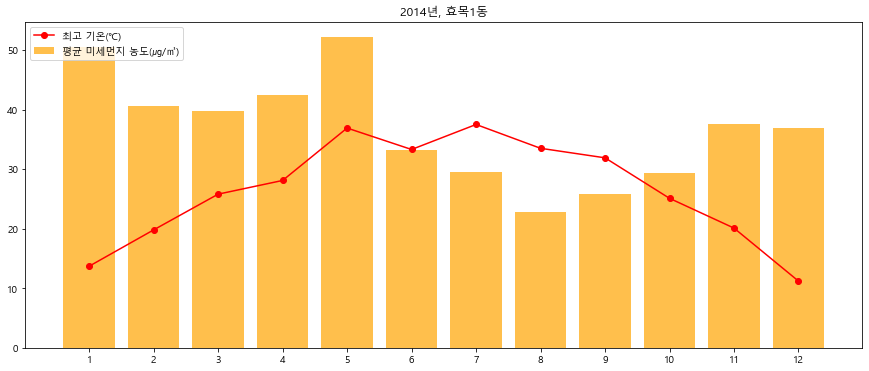

In [29]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2014년, 효목1동')

plt.bar(month_mean, concen_mean, color='orange', label='평균 미세먼지 농도(㎍/㎥)', alpha=0.7)
plt.plot(month_mean, HI_mean, color='red', marker = 'o', label='최고 기온(℃)', linestyle='-')

plt.legend(loc=2)
month = range(1,13)
plt.xticks(month)
plt.show()

- 그래프 상, 미세먼지와 기온은 반비례 관계로 나타난다.
- 여름에 폭우 영향으로 미세먼지의 농도가 낮아지는 필연적인 현상으로 해석된다.

### 5. 결론
온도가 높으면 강수현상이 발생하므로 미세먼지의 농도가 낮아짐 (가설은 거짓)

## <hr>

## 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
>###### made by LEH

#### Period
- Period : 2022-05-06

#### Index

In [91]:
# df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
# df_region

In [92]:
# index_None = df_region[df_region['1단계'].isna()].index
# df_region.drop(index_None, inplace=True)
# df_region.drop('1단계', axis=1, inplace=True)
# df_region.columns = ['region2','region']

In [93]:
# df_region

In [94]:
# df_pre

In [95]:
# df_10 = df_pre.merge(df_region, on='region')

In [96]:
# df_10